# A. Data Understanding
Pada bagian ini, kita akan menyelidiki jumlah data serta tipe datanya juga bagaimana pemusatan dan persebarannya untuk masing-masing feature. Kemudian dilakukan pencarian missing values dan data duplikat yang kemudian akan di handle pada step Data Preprocessing.

In [ ]:
# Install Library tambahan
!pip install catboost
!pip install optuna

# Library untuk manipulasi data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("ggplot")

# Library untuk data preprocessing
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler, FunctionTransformer, OrdinalEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV, RepeatedStratifiedKFold
from sklearn.feature_selection import chi2, SelectKBest
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import SMOTE
from sklearn.metrics import precision_recall_curve, fbeta_score
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway

# Library untuk modeling dan evaluation
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, make_scorer, mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.preprocessing import PolynomialFeatures
from sklearn.manifold import TSNE
from catboost import Pool, cv, CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import roc_curve

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 7.5 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.6/390.6 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 24.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 8.7 MB/s eta 0:00:00


In [ ]:
# Load dataset
train = pd.read_csv("/content/train_features.csv")
labels = pd.read_csv("/content/train_label.csv")
test = pd.read_csv("/content/test_feature.csv")
sub = pd.read_csv("/content/submission_format.csv")

In [ ]:
# Melihat lima baris pertama
train.head()

facilities                        rating      location
0  RestaurantBARSwimmingPools  7.8 Very GoodFrom 10 reviews        Stokol
1        intrnetRestaurantgym        5.6 GoodFrom 4 reviews  Machlessvile
2        restaurantgympoolBar  7.2 Very GoodFrom 38 reviews    Wanderland
3               BARRestaurant   7.3 Very GoodFrom 6 reviews    Uberlandia
4          InternetRestaurant  7.2 Very GoodFrom 30 reviews        Stokol

In [ ]:
# Melihat jumlah baris dan kolom
train.shape

(3066, 3)

In [ ]:
# Melakukan pengecekan tipe data features
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3066 entries, 0 to 3065
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   facilities  2765 non-null   object
 1   rating      2429 non-null   object
 2   location    3066 non-null   object
dtypes: object(3)
memory usage: 72.0+ KB


In [ ]:
# Melakukan pengecekan testing set
test.head()

ID                             facilities                        rating  \
0   0  GymrestaurantbarInternetSwimmingPools   8.0 ExcellentFrom 1 reviews   
1   1           Poolrestaurantgyminternetbar  7.4 Very GoodFrom 22 reviews   
2   2            BARSwimmingPoolsInternetgym        0.0 FairFrom 4 reviews   
3   3   gymSwimmingPoolsBARintrnetRestaurant  6.8 Very GoodFrom 13 reviews   
4   4            gymRestaurantpoolbarintrnet        0.0 FairFrom 9 reviews   

    location  
0     Stokol  
1  Hallerson  
2  Hallerson  
3    Andeman  
4  Hallerson

In [ ]:
# Melakukan pengecekan jumlah baris dan kolom
test.shape

(767, 4)

In [ ]:
# Melakukan pengecekan tipe data features
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          767 non-null    int64 
 1   facilities  767 non-null    object
 2   rating      767 non-null    object
 3   location    767 non-null    object
dtypes: int64(1), object(3)
memory usage: 24.1+ KB


In [ ]:
# Melihat labels
labels.head()

Price
0  13,500avg/night
1  13,000avg/night
2  19,000avg/night
3   6,000avg/night
4  20,000avg/night

In [ ]:
# Melihat jumlah baris dan kolom labels
labels.shape

(3066, 1)

In [ ]:
# Melakukan merge train dan labels
train = pd.concat([train, labels], axis = 1)
train.head()

facilities                        rating      location  \
0  RestaurantBARSwimmingPools  7.8 Very GoodFrom 10 reviews        Stokol   
1        intrnetRestaurantgym        5.6 GoodFrom 4 reviews  Machlessvile   
2        restaurantgympoolBar  7.2 Very GoodFrom 38 reviews    Wanderland   
3               BARRestaurant   7.3 Very GoodFrom 6 reviews    Uberlandia   
4          InternetRestaurant  7.2 Very GoodFrom 30 reviews        Stokol   

             Price  
0  13,500avg/night  
1  13,000avg/night  
2  19,000avg/night  
3   6,000avg/night  
4  20,000avg/night

In [ ]:
train.shape

(3066, 4)

In [ ]:
# Membuat indikator asal data dan menggabungkan train dan test set dan drop ID
# Kemudian fill missing values pada is_train dengan 0
train["is_train"] = 1
train = pd.concat([train, test], axis = 0).reset_index(drop = True)
train.drop("ID", axis = 1, inplace = True)
train["is_train"] = train["is_train"].fillna(0)

In [ ]:
train

facilities                        rating  \
0               RestaurantBARSwimmingPools  7.8 Very GoodFrom 10 reviews   
1                     intrnetRestaurantgym        5.6 GoodFrom 4 reviews   
2                     restaurantgympoolBar  7.2 Very GoodFrom 38 reviews   
3                            BARRestaurant   7.3 Very GoodFrom 6 reviews   
4                       InternetRestaurant  7.2 Very GoodFrom 30 reviews   
...                                    ...                           ...   
3828                  BARPoolRestaurantGym   8.1 ExcellentFrom 9 reviews   
3829           intrnetGympoolrestaurantBar   8.0 ExcellentFrom 4 reviews   
3830  RestaurantgymintrnetBARswimmingpools  7.4 Very GoodFrom 19 reviews   
3831          gymInternetBarpoolRestaurant  9.0 ExcellentFrom 17 reviews   
3832          RestaurantGyminternetpoolBAR  6.9 Very GoodFrom 21 reviews   

          location            Price  is_train  
0           Stokol  13,500avg/night       1.0  
1     Machlessvile  13,000avg/night       1.0  
2       Wanderland  19,000avg/night       1.0  
3       Uberlandia   6,000avg/night       1.0  
4           Stokol  20,000avg/night       1.0  
...            ...              ...       ...  
3828       Andeman              NaN       0.0  
3829    Wanderland              NaN       0.0  
3830       Andeman              NaN       0.0  
3831     Hallerson              NaN       0.0  
3832    Uberlandia              NaN       0.0  

[3833 rows x 5 columns]

In [ ]:
# Melakukan pengecekan baris awal
sub.head()

ID   Price
0   0  33,000
1   1  33,000
2   2  33,000
3   3  33,000
4   4  33,000

In [ ]:
# Melakukan pengecekan jumlah baris dan kolom
sub.shape

(767, 2)

In [ ]:
train["facilities"]

0                 RestaurantBARSwimmingPools
1                       intrnetRestaurantgym
2                       restaurantgympoolBar
3                              BARRestaurant
4                         InternetRestaurant
                        ...                 
3828                    BARPoolRestaurantGym
3829             intrnetGympoolrestaurantBar
3830    RestaurantgymintrnetBARswimmingpools
3831            gymInternetBarpoolRestaurant
3832            RestaurantGyminternetpoolBAR
Name: facilities, Length: 3833, dtype: object

In [ ]:
# Mendecode kolom fasilitas dengan membuat feature indikator apakah fasilitas
# tertentu berada pada dataset
train["facilities"] = train["facilities"].str.lower()
train["internet"] = train['facilities'].str.contains('int')
train["restaurant"] = train["facilities"].str.contains("res")
train["gym"] = train["facilities"].str.contains("gym")
train["bar"] = train["facilities"].str.contains("bar")
train["pool"] = train["facilities"].str.contains("poo")
train.drop("facilities", axis = 1, inplace = True)

In [ ]:
train

rating      location            Price  is_train  \
0     7.8 Very GoodFrom 10 reviews        Stokol  13,500avg/night       1.0   
1           5.6 GoodFrom 4 reviews  Machlessvile  13,000avg/night       1.0   
2     7.2 Very GoodFrom 38 reviews    Wanderland  19,000avg/night       1.0   
3      7.3 Very GoodFrom 6 reviews    Uberlandia   6,000avg/night       1.0   
4     7.2 Very GoodFrom 30 reviews        Stokol  20,000avg/night       1.0   
...                            ...           ...              ...       ...   
3828   8.1 ExcellentFrom 9 reviews       Andeman              NaN       0.0   
3829   8.0 ExcellentFrom 4 reviews    Wanderland              NaN       0.0   
3830  7.4 Very GoodFrom 19 reviews       Andeman              NaN       0.0   
3831  9.0 ExcellentFrom 17 reviews     Hallerson              NaN       0.0   
3832  6.9 Very GoodFrom 21 reviews    Uberlandia              NaN       0.0   

     internet restaurant    gym    bar   pool  
0       False       True  False   True   True  
1        True       True   True  False  False  
2       False       True   True   True   True  
3       False       True  False   True  False  
4        True       True  False  False  False  
...       ...        ...    ...    ...    ...  
3828    False       True   True   True   True  
3829     True       True   True   True   True  
3830     True       True   True   True   True  
3831     True       True   True   True   True  
3832     True       True   True   True   True  

[3833 rows x 9 columns]

In [ ]:
# Mendecode kolom rating dengan membuat feature indikator apakah kelas rating
# tertentu berada pada dataset
train["rating"] = train["rating"].str.lower()
train["very"] = train["rating"].str.contains("very")
train["good"] = train["rating"].str.contains("good")
train["fair"] = train["rating"].str.contains("fair")
train["excellent"] = train["rating"].str.contains("excellent")

In [ ]:
train

rating      location            Price  is_train  \
0     7.8 very goodfrom 10 reviews        Stokol  13,500avg/night       1.0   
1           5.6 goodfrom 4 reviews  Machlessvile  13,000avg/night       1.0   
2     7.2 very goodfrom 38 reviews    Wanderland  19,000avg/night       1.0   
3      7.3 very goodfrom 6 reviews    Uberlandia   6,000avg/night       1.0   
4     7.2 very goodfrom 30 reviews        Stokol  20,000avg/night       1.0   
...                            ...           ...              ...       ...   
3828   8.1 excellentfrom 9 reviews       Andeman              NaN       0.0   
3829   8.0 excellentfrom 4 reviews    Wanderland              NaN       0.0   
3830  7.4 very goodfrom 19 reviews       Andeman              NaN       0.0   
3831  9.0 excellentfrom 17 reviews     Hallerson              NaN       0.0   
3832  6.9 very goodfrom 21 reviews    Uberlandia              NaN       0.0   

     internet restaurant    gym    bar   pool   very   good   fair excellent  
0       False       True  False   True   True   True   True  False     False  
1        True       True   True  False  False  False   True  False     False  
2       False       True   True   True   True   True   True  False     False  
3       False       True  False   True  False   True   True  False     False  
4        True       True  False  False  False   True   True  False     False  
...       ...        ...    ...    ...    ...    ...    ...    ...       ...  
3828    False       True   True   True   True  False  False  False      True  
3829     True       True   True   True   True  False  False  False      True  
3830     True       True   True   True   True   True   True  False     False  
3831     True       True   True   True   True  False  False  False      True  
3832     True       True   True   True   True   True   True  False     False  

[3833 rows x 13 columns]

In [ ]:
# Mengambil rating numerik dari feature rating
train[["ratings", "temp"]] = train["rating"].str.split(" ", n = 1, expand = True)
train.drop("temp", axis = 1, inplace = True)

# Mengambil reviews numerik dari feature rating
train[["temp", "reviews"]] = train["rating"].str.split("from", expand = True)
train.drop("temp", axis = 1, inplace = True)
train["reviews"] = train["reviews"].str.split(" ", expand = True)[1]

# Mengambil price numerik dari feature Price
train[["price", "temp"]] = train["Price"].str.split("a", expand = True)
train.drop("temp", axis = 1, inplace = True)

# Melakukan drop features rating dan Price
train.drop(["rating", "Price"], axis = 1, inplace = True)

In [ ]:
train

location  is_train internet restaurant    gym    bar   pool   very  \
0           Stokol       1.0    False       True  False   True   True   True   
1     Machlessvile       1.0     True       True   True  False  False  False   
2       Wanderland       1.0    False       True   True   True   True   True   
3       Uberlandia       1.0    False       True  False   True  False   True   
4           Stokol       1.0     True       True  False  False  False   True   
...            ...       ...      ...        ...    ...    ...    ...    ...   
3828       Andeman       0.0    False       True   True   True   True  False   
3829    Wanderland       0.0     True       True   True   True   True  False   
3830       Andeman       0.0     True       True   True   True   True   True   
3831     Hallerson       0.0     True       True   True   True   True  False   
3832    Uberlandia       0.0     True       True   True   True   True   True   

       good   fair excellent ratings reviews   price  
0      True  False     False     7.8      10  13,500  
1      True  False     False     5.6       4  13,000  
2      True  False     False     7.2      38  19,000  
3      True  False     False     7.3       6   6,000  
4      True  False     False     7.2      30  20,000  
...     ...    ...       ...     ...     ...     ...  
3828  False  False      True     8.1       9     NaN  
3829  False  False      True     8.0       4     NaN  
3830   True  False     False     7.4      19     NaN  
3831  False  False      True     9.0      17     NaN  
3832   True  False     False     6.9      21     NaN  

[3833 rows x 14 columns]

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3833 entries, 0 to 766
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   facilities  3532 non-null   object
 1   rating      3196 non-null   object
 2   location    3833 non-null   object
 3   Price       3066 non-null   object
 4   internet    3532 non-null   object
 5   restaurant  3532 non-null   object
 6   gym         3532 non-null   object
 7   bar         3532 non-null   object
 8   pool        3532 non-null   object
 9   very        3196 non-null   object
 10  good        3196 non-null   object
 11  fair        3196 non-null   object
 12  excellent   3196 non-null   object
 13  ratings     3196 non-null   object
 14  reviews     3196 non-null   object
 15  price       3066 non-null   object
dtypes: object(16)
memory usage: 509.1+ KB


In [ ]:
train.isnull().sum()

facilities    301
rating        637
location        0
Price         767
internet      301
restaurant    301
gym           301
bar           301
pool          301
very          637
good          637
fair          637
excellent     637
ratings       637
reviews       637
price         767
dtype: int64

In [ ]:
train["price"] = train[train["is_train"] == True]["price"].str.replace(",", "").astype("int")
train["facilities_isna"] = train["facilities"].isna()
train.drop(["facilities", "rating", "Price"], axis = 1, inplace = True)

In [ ]:
# Mengubah tipe data feature binary menjadi numerik binary
for i in ['internet', 'restaurant', 'gym', 'bar', 'pool', 'very', 'good', 'fair', 'excellent']:
  train[i] = train[i].map({True:1, False:0})

# Mengubah tipe data feature menjadi float dan int
train.replace("from", np.nan, inplace = True)
train["ratings"] = train["ratings"].astype("float")
train["reviews"] = train["reviews"].astype("float")
train["price"] = train[train["is_train"] == True]["price"].str.replace(",", "").astype("int")

In [ ]:
train

location  is_train  internet  restaurant  gym  bar  pool  very  \
0           Stokol       1.0       0.0         1.0  0.0  1.0   1.0   1.0   
1     Machlessvile       1.0       1.0         1.0  1.0  0.0   0.0   0.0   
2       Wanderland       1.0       0.0         1.0  1.0  1.0   1.0   1.0   
3       Uberlandia       1.0       0.0         1.0  0.0  1.0   0.0   1.0   
4           Stokol       1.0       1.0         1.0  0.0  0.0   0.0   1.0   
...            ...       ...       ...         ...  ...  ...   ...   ...   
3828       Andeman       0.0       0.0         1.0  1.0  1.0   1.0   0.0   
3829    Wanderland       0.0       1.0         1.0  1.0  1.0   1.0   0.0   
3830       Andeman       0.0       1.0         1.0  1.0  1.0   1.0   1.0   
3831     Hallerson       0.0       1.0         1.0  1.0  1.0   1.0   0.0   
3832    Uberlandia       0.0       1.0         1.0  1.0  1.0   1.0   1.0   

      good  fair  excellent  ratings  reviews    price  
0      1.0   0.0        0.0      7.8     10.0  13500.0  
1      1.0   0.0        0.0      5.6      4.0  13000.0  
2      1.0   0.0        0.0      7.2     38.0  19000.0  
3      1.0   0.0        0.0      7.3      6.0   6000.0  
4      1.0   0.0        0.0      7.2     30.0  20000.0  
...    ...   ...        ...      ...      ...      ...  
3828   0.0   0.0        1.0      8.1      9.0      NaN  
3829   0.0   0.0        1.0      8.0      4.0      NaN  
3830   1.0   0.0        0.0      7.4     19.0      NaN  
3831   0.0   0.0        1.0      9.0     17.0      NaN  
3832   1.0   0.0        0.0      6.9     21.0      NaN  

[3833 rows x 14 columns]

In [ ]:
train.isnull().sum()

location        0
is_train        0
internet      301
restaurant    301
gym           301
bar           301
pool          301
very          637
good          637
fair          637
excellent     637
ratings       660
reviews       637
price         767
dtype: int64

In [ ]:
# Melihat jumlah missing values dan persentasenya serta mengurutkannya
missing = pd.DataFrame(train.isnull().sum())
missing["percentage"] = (missing[0]/train.shape[0]) * 100
missing.rename(columns = {0:"counts"}, inplace = True)
missing.sort_values(by = "percentage", ascending = False)

counts  percentage
price          767   20.010436
ratings        660   17.218889
very           637   16.618836
good           637   16.618836
fair           637   16.618836
excellent      637   16.618836
reviews        637   16.618836
internet       301    7.852857
restaurant     301    7.852857
gym            301    7.852857
bar            301    7.852857
pool           301    7.852857
location         0    0.000000
is_train         0    0.000000

In [ ]:
train.columns

Index(['location', 'is_train', 'internet', 'restaurant', 'gym', 'bar', 'pool',
       'very', 'good', 'fair', 'excellent', 'ratings', 'reviews', 'price'],
      dtype='object')

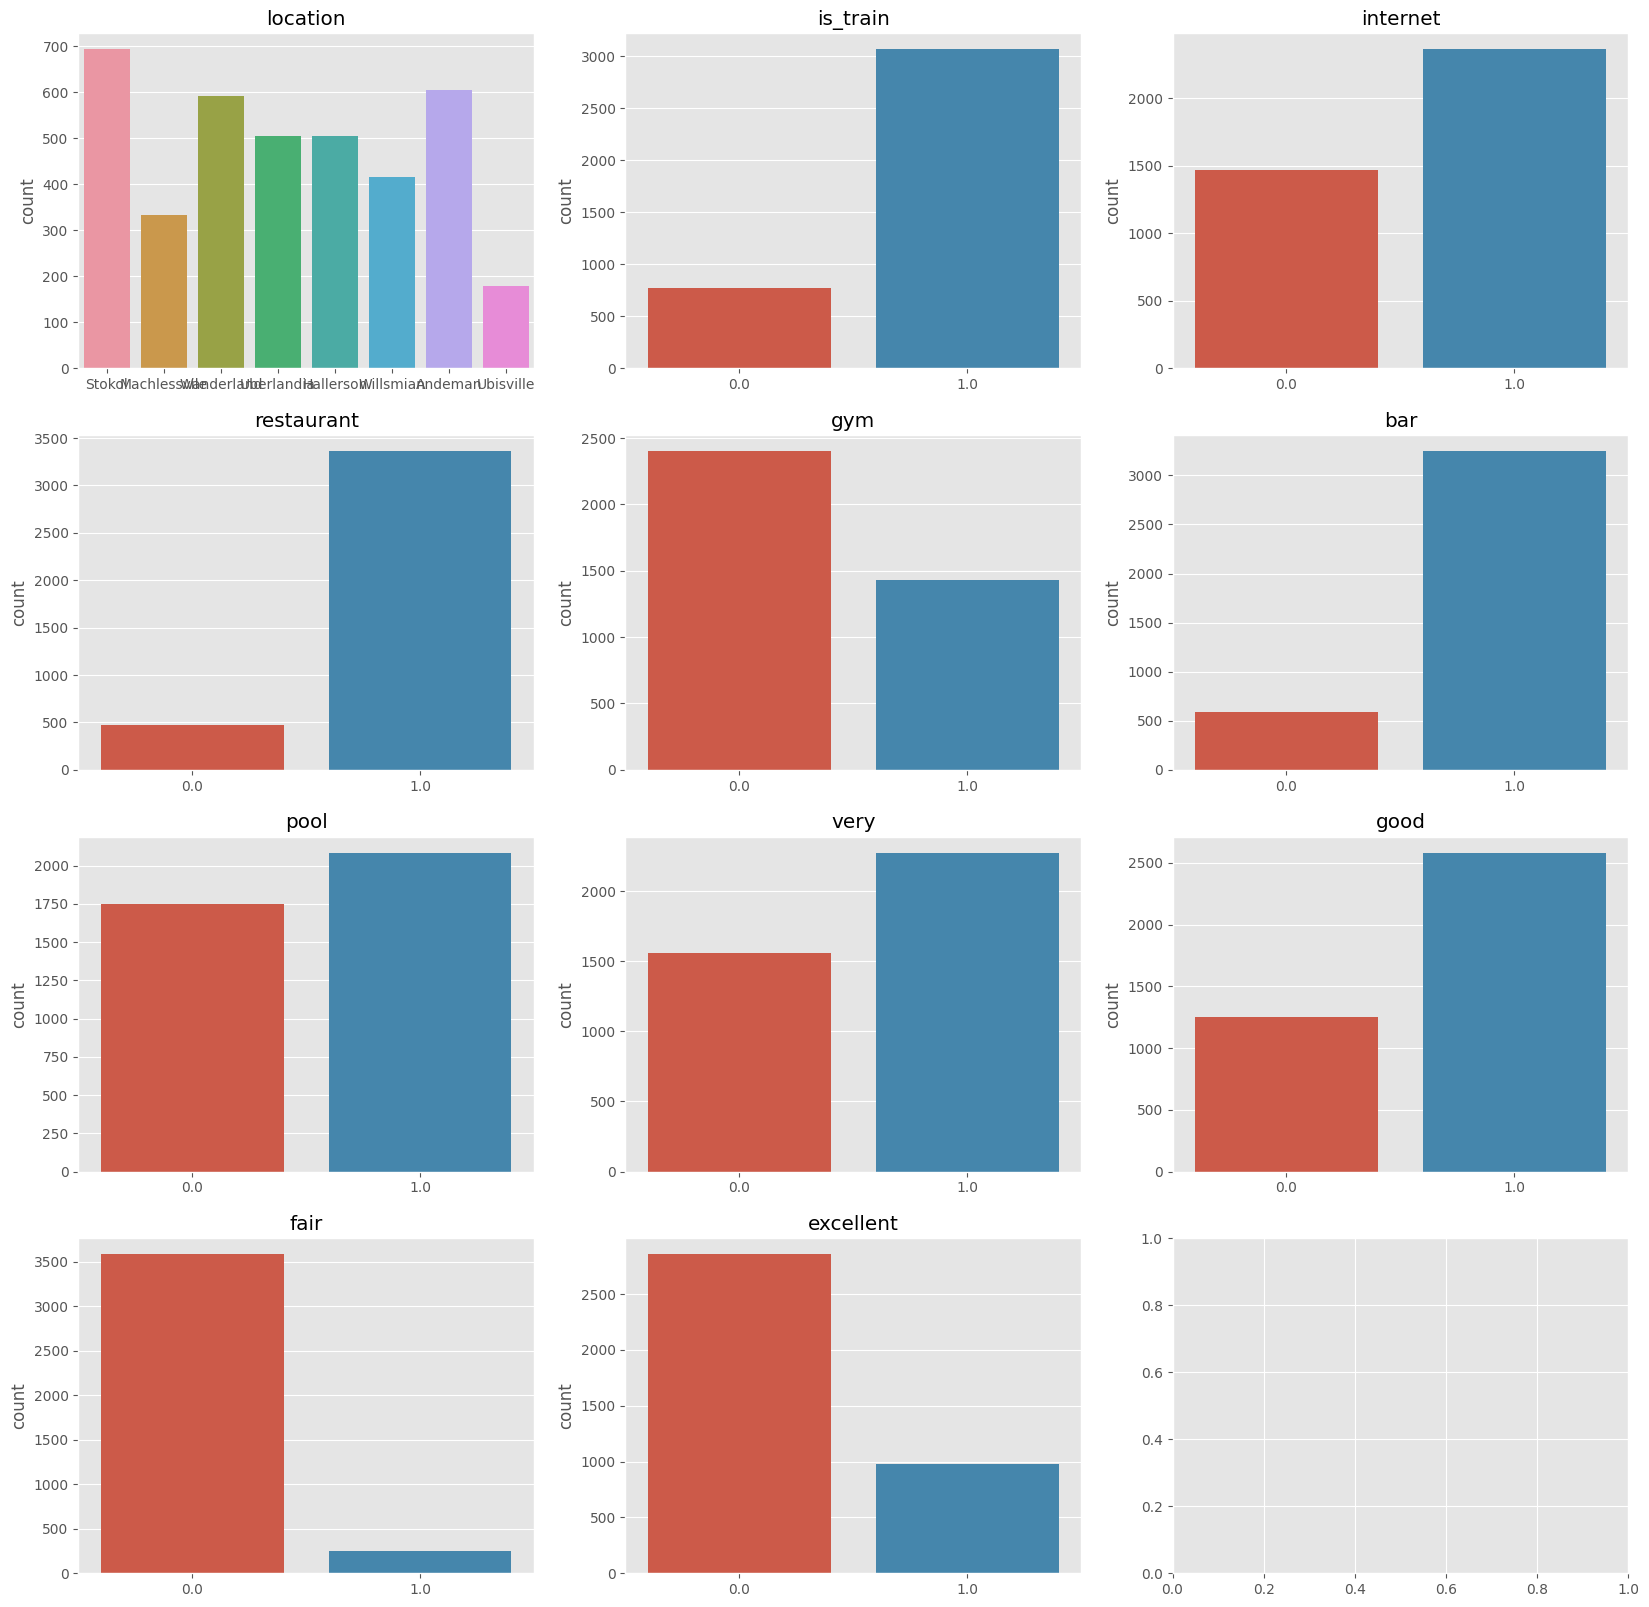

In [ ]:
# Melakukan visualisasi feature binary
binary = ['location', 'is_train', 'internet', 'restaurant', 'gym', 'bar',
          'pool','very', 'good', 'fair', 'excellent']
fig, ax = plt.subplots(4, 3, figsize = (20, 20))
ax = ax.flatten()
for i, j in enumerate(binary):
  g = sns.countplot(x = train[j], ax = ax[i])
  g.set_title(j)
  g.set_xlabel("");

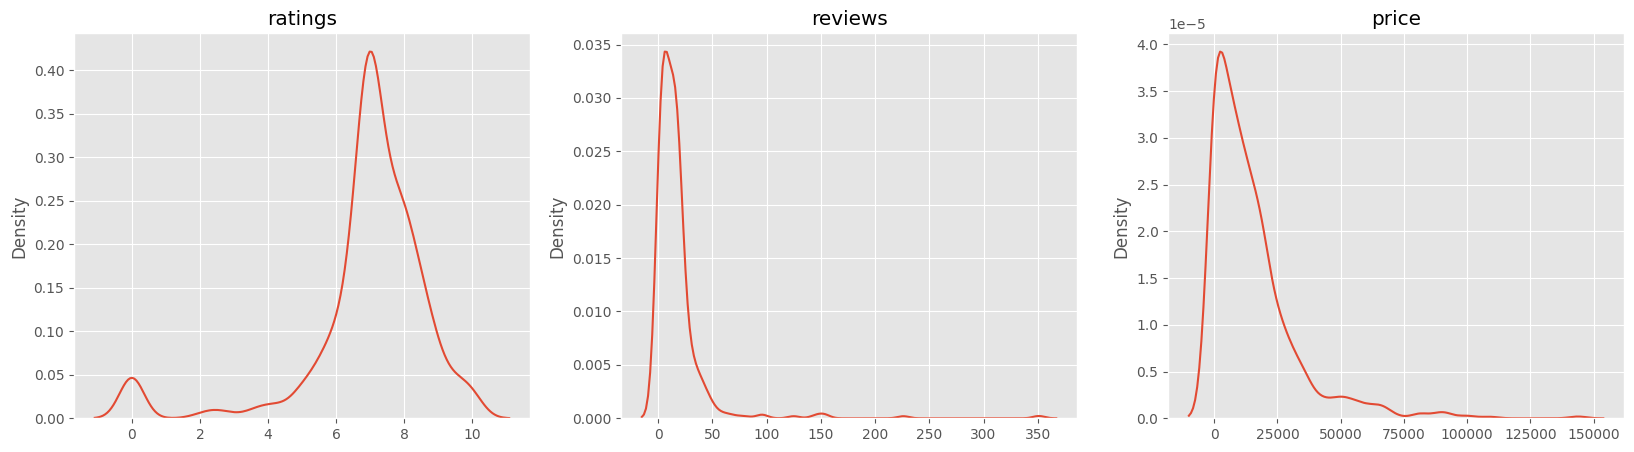

In [ ]:
# Melakukan visualisasi feature numerik
numerical = ["ratings", "reviews", "price"]
fig, ax = plt.subplots(1, 3, figsize = (20, 5))
ax = ax.flatten()
for i, j in enumerate(numerical):
  g = sns.kdeplot(x = train[j], ax = ax[i])
  g.set_title(j)
  g.set_xlabel("");

In [ ]:
train.columns

Index(['location', 'is_train', 'internet', 'restaurant', 'gym', 'bar', 'pool',
       'very', 'good', 'fair', 'excellent', 'ratings', 'reviews', 'price'],
      dtype='object')

In [ ]:
imputer = SimpleImputer()


In [ ]:
# Mengisi missing values binary dengan nilai modus
binary = ['location', 'is_train', 'internet', 'restaurant', 'gym', 'bar',
          'pool','very', 'good', 'fair', 'excellent']
for i in binary:
  train[i] = train[i].fillna(train[i].mode())

# Mengisi missing values numerik dengan nilai mean
train["price"] = train["price"].fillna(0)
train["ratings"] = train["ratings"].fillna(train["ratings"].mean())
train["reviews"] = train["reviews"].fillna(train["reviews"].mean())

In [ ]:
train.fillna(0).isna().sum()

location      0
is_train      0
internet      0
restaurant    0
gym           0
bar           0
pool          0
very          0
good          0
fair          0
excellent     0
ratings       0
reviews       0
price         0
dtype: int64

In [ ]:
train["internet"].fillna(train["internet"].mode())

0       0.0
1       1.0
2       0.0
3       0.0
4       1.0
       ... 
3828    0.0
3829    1.0
3830    1.0
3831    1.0
3832    1.0
Name: internet, Length: 3833, dtype: float64

In [ ]:
train

location is_train internet restaurant  gym  bar pool very good fair  \
0           Stokol      1.0      0.0        1.0  0.0  1.0  1.0  1.0  1.0  0.0   
1     Machlessvile      1.0      1.0        1.0  1.0  0.0  0.0  0.0  1.0  0.0   
2       Wanderland      1.0      0.0        1.0  1.0  1.0  1.0  1.0  1.0  0.0   
3       Uberlandia      1.0      0.0        1.0  0.0  1.0  0.0  1.0  1.0  0.0   
4           Stokol      1.0      1.0        1.0  0.0  0.0  0.0  1.0  1.0  0.0   
...            ...      ...      ...        ...  ...  ...  ...  ...  ...  ...   
3828       Andeman      0.0      0.0        1.0  1.0  1.0  1.0  0.0  0.0  0.0   
3829    Wanderland      0.0      1.0        1.0  1.0  1.0  1.0  0.0  0.0  0.0   
3830       Andeman      0.0      1.0        1.0  1.0  1.0  1.0  1.0  1.0  0.0   
3831     Hallerson      0.0      1.0        1.0  1.0  1.0  1.0  0.0  0.0  0.0   
3832    Uberlandia      0.0      1.0        1.0  1.0  1.0  1.0  1.0  1.0  0.0   

     excellent ratings reviews    price  
0          0.0     7.8    10.0  13500.0  
1          0.0     5.6     4.0  13000.0  
2          0.0     7.2    38.0  19000.0  
3          0.0     7.3     6.0   6000.0  
4          0.0     7.2    30.0  20000.0  
...        ...     ...     ...      ...  
3828       1.0     8.1     9.0      0.0  
3829       1.0     8.0     4.0      0.0  
3830       0.0     7.4    19.0      0.0  
3831       1.0     9.0    17.0      0.0  
3832       0.0     6.9    21.0      0.0  

[3833 rows x 14 columns]

In [ ]:
# Melakukan imputasi tergantung tipe data feature
binary = ['location', 'is_train', 'internet', 'restaurant', 'gym', 'bar',
          'pool','very', 'good', 'fair', 'excellent']
ct = make_column_transformer((SimpleImputer(strategy = "most_frequent"), binary),
                             (SimpleImputer(strategy = "constant", fill_value = 0), ["ratings"]),
                             (SimpleImputer(strategy = "mean"), ["reviews"]),
                             (SimpleImputer(strategy = "constant", fill_value = 0), ["price"]), remainder = "passthrough")
train = pd.DataFrame(ct.fit_transform(train), columns = train.columns)

In [ ]:
train

location is_train internet restaurant  gym  bar pool very good fair  \
0           Stokol      1.0      0.0        1.0  0.0  1.0  1.0  1.0  1.0  0.0   
1     Machlessvile      1.0      1.0        1.0  1.0  0.0  0.0  0.0  1.0  0.0   
2       Wanderland      1.0      0.0        1.0  1.0  1.0  1.0  1.0  1.0  0.0   
3       Uberlandia      1.0      0.0        1.0  0.0  1.0  0.0  1.0  1.0  0.0   
4           Stokol      1.0      1.0        1.0  0.0  0.0  0.0  1.0  1.0  0.0   
...            ...      ...      ...        ...  ...  ...  ...  ...  ...  ...   
3828       Andeman      0.0      0.0        1.0  1.0  1.0  1.0  0.0  0.0  0.0   
3829    Wanderland      0.0      1.0        1.0  1.0  1.0  1.0  0.0  0.0  0.0   
3830       Andeman      0.0      1.0        1.0  1.0  1.0  1.0  1.0  1.0  0.0   
3831     Hallerson      0.0      1.0        1.0  1.0  1.0  1.0  0.0  0.0  0.0   
3832    Uberlandia      0.0      1.0        1.0  1.0  1.0  1.0  1.0  1.0  0.0   

     excellent ratings reviews    price  
0          0.0     7.8    10.0  13500.0  
1          0.0     5.6     4.0  13000.0  
2          0.0     7.2    38.0  19000.0  
3          0.0     7.3     6.0   6000.0  
4          0.0     7.2    30.0  20000.0  
...        ...     ...     ...      ...  
3828       1.0     8.1     9.0      0.0  
3829       1.0     8.0     4.0      0.0  
3830       0.0     7.4    19.0      0.0  
3831       1.0     9.0    17.0      0.0  
3832       0.0     6.9    21.0      0.0  

[3833 rows x 14 columns]

<Axes: xlabel='price'>

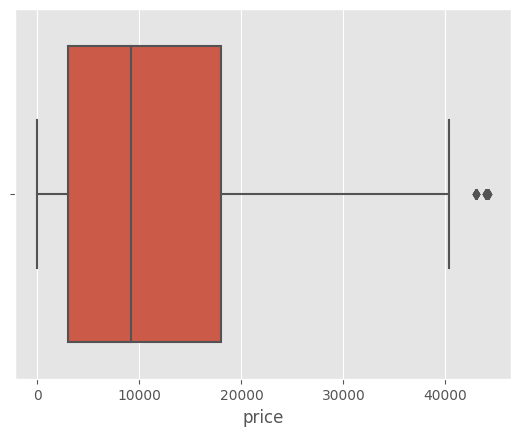

In [ ]:
# Melakukan visualisasi boxplot feature price
sns.boxplot(x = train["price"])

In [ ]:
# Mengambil data bukan outlier dengan price < 45000
train = train[train["price"] < 45000].reset_index(drop = True)

In [ ]:
# Membuat feature indikator outlier
train["is_outlier"] = (train["price"] > 45000)

In [ ]:
# Melakukan one hot encoding pada feature location kemudian didrop
train = pd.concat([train, pd.get_dummies(train["location"], drop_first = True)], axis = 1)
train.drop("location", axis = 1, inplace = True)

In [ ]:
train = train.astype("float")

In [ ]:
# Mengambil feature yang paling berkorelasi dengan target
train[train["is_train"] == 1].corr().loc["price"].sort_values(ascending = False)

price           1.000000
ratings         0.389509
gym             0.372288
excellent       0.314072
pool            0.306640
reviews         0.198455
internet        0.179390
Hallerson       0.028663
Uberlandia      0.023055
Ubisville       0.008082
Machlessvile    0.002031
Wanderland     -0.004795
Stokol         -0.017840
Willsmian      -0.038175
bar            -0.068650
restaurant     -0.079508
fair           -0.106224
very           -0.207725
good           -0.273595
is_train             NaN
is_outlier           NaN
Name: price, dtype: float64

In [ ]:
train["location"].unique()

array(['Stokol', 'Machlessvile', 'Wanderland', 'Uberlandia', 'Hallerson',
       'Willsmian', 'Andeman', 'Ubisville'], dtype=object)

In [ ]:
train[train["location"] == "Willsmian"]

In [ ]:
# Mengambil distribusi price pada masing-masing location dan melakukan one way anova test
stokol = train[(train["is_train"] == 1) & (train["location"] == "Stokol")]["price"]
mach = train[(train["is_train"] == 1) & (train["location"] == "Machlessvile")]["price"]
wander = train[(train["is_train"] == 1) & (train["location"] == "Wanderland")]["price"]
uber = train[(train["is_train"] == 1) & (train["location"] == "Uberlandia")]["price"]
hall = train[(train["is_train"] == 1) & (train["location"] == "Hallerson")]["price"]
will = train[(train["is_train"] == 1) & (train["location"] == "Willsmian")]["price"]
ande = train[(train["is_train"] == 1) & (train["location"] == "Andeman")]["price"]
ubis = train[(train["is_train"] == 1) & (train["location"] == "Ubisville")]["price"]

nilai_f, p_value = f_oneway(stokol, mach, wander, uber, hall, will, ande, ubis)
alpha = 0.05
print("p-value adalah " + str(p_value))
if p_value <= alpha:
  print('terdapat perbedaan harga antar lokasi')
else:
  print('tidak terdapat perbedaan harga antar lokasi')

p-value adalah 0.3344868698431052
tidak terdapat perbedaan harga antar lokasi


Text(0.5, 1.0, 'Harga Hotel berdasarkan Lokasi')

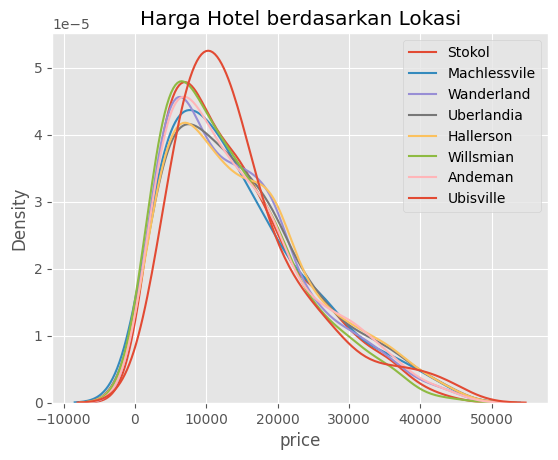

In [ ]:
sns.kdeplot(stokol, label = "Stokol")
sns.kdeplot(mach, label = "Machlessvile")
sns.kdeplot(wander, label = "Wanderland")
sns.kdeplot(uber, label = "Uberlandia")
sns.kdeplot(hall, label = "Hallerson")
sns.kdeplot(will, label = "Willsmian")
sns.kdeplot(ande, label = "Andeman")
sns.kdeplot(ubis, label = "Ubisville")
plt.legend()
plt.title("Harga Hotel berdasarkan Lokasi")

In [ ]:
will

Series([], Name: price, dtype: object)

In [ ]:
train[train["excellent"] == 1]["gym"].value_counts()

0.0    531
1.0    373
Name: gym, dtype: int64

<Axes: >

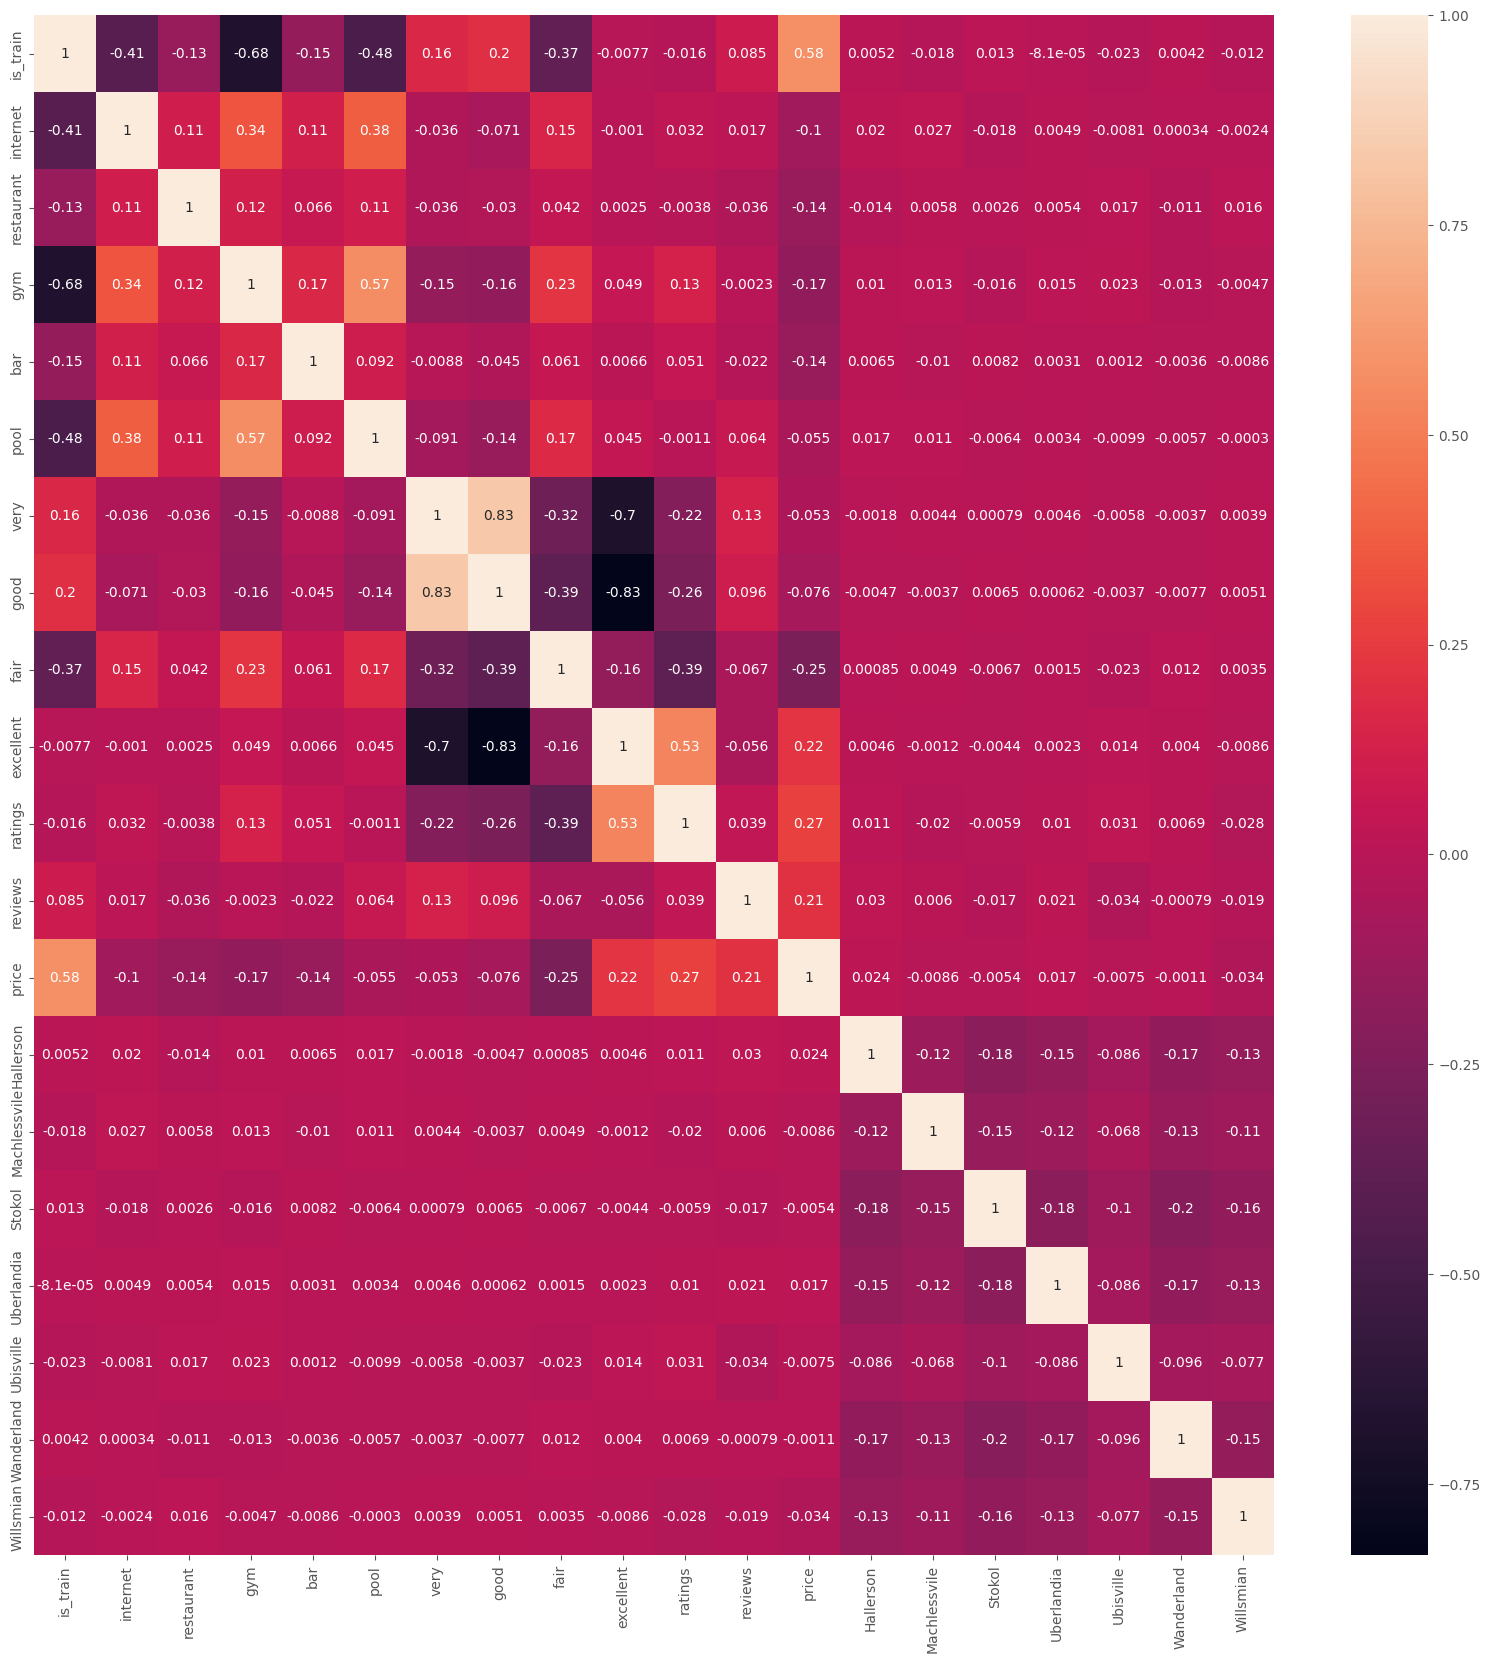

In [ ]:
fig, ax = plt.subplots(figsize = (20, 20))
sns.heatmap(train.corr(), annot = True, ax = ax)

In [ ]:
train.columns

Index(['is_train', 'internet', 'restaurant', 'gym', 'bar', 'pool', 'very',
       'good', 'fair', 'excellent', 'ratings', 'reviews', 'price',
       'is_outlier', 'Hallerson', 'Machlessvile', 'Stokol', 'Uberlandia',
       'Ubisville', 'Wanderland', 'Willsmian'],
      dtype='object')

In [ ]:
# Melakukan One Way Anova untuk menguji perbedaan mean kelas pada feature race dengan feature opinions
for i in ["Hallerson", "Machlessvile", "Stokol", "Uberlandia", "Ubisville", "Wanderland", "Willsmian"]:
  loc = np.array(train[i]]["price"].dropna())

nilai_f, p_value = f_oneway(train[], b, h, o)
alpha = 0.05
print(str(i))
print("p-value adalah " + str(p))
if p <= alpha:
  print('terdapat perbedaan antar kelas')
else:
  print('tidak terdapat perbedaan antar kelas')
print("======================================")

<Axes: xlabel='price', ylabel='Density'>

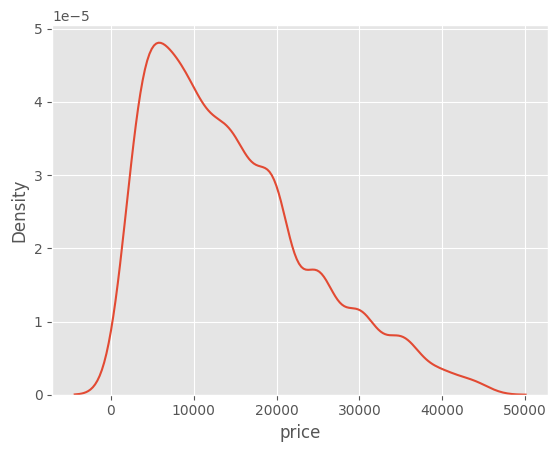

In [ ]:
sns.kdeplot(train[train["is_train"] == 1]["price"])

In [ ]:
trains.columns

Index(['is_train', 'internet', 'restaurant', 'gym', 'bar', 'pool', 'very',
       'good', 'fair', 'excellent', 'ratings', 'reviews', 'price',
       'is_outlier', 'Hallerson', 'Machlessvile', 'Stokol', 'Uberlandia',
       'Ubisville', 'Wanderland', 'Willsmian'],
      dtype='object')

Text(0.5, 1.0, 'Harga Hotel berdasarkan Lokasi')

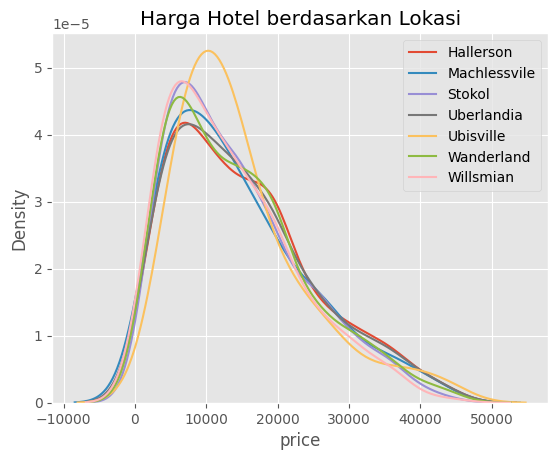

In [ ]:
sns.kdeplot(trains[trains["Hallerson"] == 1]["price"], label = "Hallerson")
sns.kdeplot(trains[trains["Machlessvile"] == 1]["price"], label = "Machlessvile")
sns.kdeplot(trains[trains["Stokol"] == 1]["price"], label = "Stokol")
sns.kdeplot(trains[trains["Uberlandia"] == 1]["price"], label = "Uberlandia")
sns.kdeplot(trains[trains["Ubisville"] == 1]["price"], label = "Ubisville")
sns.kdeplot(trains[trains["Wanderland"] == 1]["price"], label = "Wanderland")
sns.kdeplot(trains[trains["Willsmian"] == 1]["price"], label = "Willsmian")
plt.legend()
plt.title("Harga Hotel berdasarkan Lokasi")

In [ ]:
# Melakukan pemisahan menjadi train dan test
trains = train[train["is_train"] == 1].reset_index(drop = True)
test = train[train["is_train"] == 0].reset_index(drop = True)

In [ ]:
train.isnull().sum()

is_train                 0
internet                 0
restaurant               0
gym                      0
bar                      0
pool                     0
very                     0
good                     0
fair                     0
excellent                0
ratings                  0
reviews                  0
price                    0
location_Hallerson       0
location_Machlessvile    0
location_Stokol          0
location_Uberlandia      0
location_Ubisville       0
location_Wanderland      0
location_Willsmian       0
dtype: int64

In [ ]:
train = pd.concat([train, pd.get_dummies(train[["location"]], drop_first = True)], axis = 1).drop("location", axis = 1)

In [ ]:
train["is_good"] = (train["very"] + train["good"]) == 1
train["good"] = train["is_good"]
train.drop("is_good", axis = 1, inplace = True)

In [ ]:
train["ratings_zero"] = (train["ratings"] == 0.0)
train["ratings_zero"] = train["ratings_zero"].map({True:1, False:0})

In [ ]:
train

is_train internet restaurant  gym  bar pool very good fair excellent  \
0         1.0      0.0        1.0  0.0  1.0  1.0  1.0  1.0  0.0       0.0   
1         1.0      1.0        1.0  1.0  0.0  0.0  0.0  1.0  0.0       0.0   
2         1.0      0.0        1.0  1.0  1.0  1.0  1.0  1.0  0.0       0.0   
3         1.0      0.0        1.0  0.0  1.0  0.0  1.0  1.0  0.0       0.0   
4         1.0      1.0        1.0  0.0  0.0  0.0  1.0  1.0  0.0       0.0   
...       ...      ...        ...  ...  ...  ...  ...  ...  ...       ...   
3586      0.0      0.0        1.0  1.0  1.0  1.0  0.0  0.0  0.0       1.0   
3587      0.0      1.0        1.0  1.0  1.0  1.0  0.0  0.0  0.0       1.0   
3588      0.0      1.0        1.0  1.0  1.0  1.0  1.0  1.0  0.0       0.0   
3589      0.0      1.0        1.0  1.0  1.0  1.0  0.0  0.0  0.0       1.0   
3590      0.0      1.0        1.0  1.0  1.0  1.0  1.0  1.0  0.0       0.0   

     ratings reviews    price  location_Hallerson  location_Machlessvile  \
0        7.8    10.0  13500.0                   0                      0   
1        5.6     4.0  13000.0                   0                      1   
2        7.2    38.0  19000.0                   0                      0   
3        7.3     6.0   6000.0                   0                      0   
4        7.2    30.0  20000.0                   0                      0   
...      ...     ...      ...                 ...                    ...   
3586     8.1     9.0      0.0                   0                      0   
3587     8.0     4.0      0.0                   0                      0   
3588     7.4    19.0      0.0                   0                      0   
3589     9.0    17.0      0.0                   1                      0   
3590     6.9    21.0      0.0                   0                      0   

      location_Stokol  location_Uberlandia  location_Ubisville  \
0                   1                    0                   0   
1                   0                    0                   0   
2                   0                    0                   0   
3                   0                    1                   0   
4                   1                    0                   0   
...               ...                  ...                 ...   
3586                0                    0                   0   
3587                0                    0                   0   
3588                0                    0                   0   
3589                0                    0                   0   
3590                0                    1                   0   

      location_Wanderland  location_Willsmian  
0                       0                   0  
1                       0                   0  
2                       1                   0  
3                       0                   0  
4                       0                   0  
...                   ...                 ...  
3586                    0                   0  
3587                    1                   0  
3588                    0                   0  
3589                    0                   0  
3590                    0                   0  

[3591 rows x 20 columns]

In [ ]:
train["reviews"] = train["reviews"].astype("float")

In [ ]:
for i in ['internet', 'restaurant', 'gym', 'bar', 'pool', 'very', 'good', 'fair', 'excellent']:
  train[i] = train[i].map({True:1, False:0})

In [ ]:
train["facilities_counts"] = train["gym"] + train["internet"] + train["pool"]

In [ ]:
train["ratings/review"] = train["ratings"] / train["reviews"]

In [ ]:
trains = train[train["is_train"] == 1]
trains

location  is_train  internet  restaurant  gym  bar  pool  very  \
0           Stokol       1.0       0.0         1.0  0.0  1.0   1.0   1.0   
1     Machlessvile       1.0       1.0         1.0  1.0  0.0   0.0   0.0   
2       Wanderland       1.0       0.0         1.0  1.0  1.0   1.0   1.0   
3       Uberlandia       1.0       0.0         1.0  0.0  1.0   0.0   1.0   
4           Stokol       1.0       1.0         1.0  0.0  0.0   0.0   1.0   
...            ...       ...       ...         ...  ...  ...   ...   ...   
3061       Andeman       1.0       1.0         0.0  0.0  1.0   0.0   NaN   
3062    Uberlandia       1.0       1.0         1.0  0.0  1.0   0.0   0.0   
3063     Willsmian       1.0       0.0         1.0  0.0  1.0   1.0   1.0   
3064     Hallerson       1.0       0.0         1.0  0.0  0.0   0.0   NaN   
3065       Andeman       1.0       0.0         0.0  0.0  1.0   1.0   1.0   

      good  fair  excellent  ratings  reviews  price  facilities_isna  \
0        0   0.0        0.0      7.8     10.0  13500            False   
1        1   0.0        0.0      5.6      4.0  13000            False   
2        0   0.0        0.0      7.2     38.0  19000            False   
3        0   0.0        0.0      7.3      6.0   6000            False   
4        0   0.0        0.0      7.2     30.0  20000            False   
...    ...   ...        ...      ...      ...    ...              ...   
3061     0   NaN        NaN      NaN      NaN  31625            False   
3062     0   0.0        1.0      8.1      4.0  30500            False   
3063     0   0.0        0.0      6.7     10.0  14000            False   
3064     0   NaN        NaN      NaN      NaN   8500            False   
3065     0   0.0        0.0      7.8     26.0  19000            False   

      ratings_zero  facilities_counts  ratings/review  
0                0                1.0        0.780000  
1                0                2.0        1.400000  
2                0                2.0        0.189474  
3                0                0.0        1.216667  
4                0                1.0        0.240000  
...            ...                ...             ...  
3061             0                1.0             NaN  
3062             0                1.0        2.025000  
3063             0                1.0        0.670000  
3064             0                0.0             NaN  
3065             0                1.0        0.300000  

[3066 rows x 18 columns]

In [ ]:
trains = trains[trains["price"] < 40000]

In [ ]:
trains.corr()

<ipython-input-57-63437c220904>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  trains.corr()


is_train  internet  restaurant       gym       bar  \
is_train                NaN       NaN         NaN       NaN       NaN   
internet                NaN  1.000000    0.005688  0.150395  0.008024   
restaurant              NaN  0.005688    1.000000  0.056404  0.032678   
gym                     NaN  0.150395    0.056404  1.000000  0.112387   
bar                     NaN  0.008024    0.032678  0.112387  1.000000   
pool                    NaN  0.120858   -0.007666  0.496820 -0.054825   
very                    NaN  0.060445   -0.013718 -0.009999  0.047594   
good                    NaN -0.015803    0.021320  0.027631 -0.062966   
fair                    NaN -0.019117    0.036422 -0.082078  0.070134   
excellent               NaN -0.019971   -0.015869  0.024457 -0.021590   
ratings                 NaN  0.057091   -0.068902  0.094111  0.037775   
reviews                 NaN  0.058131   -0.039879  0.028123 -0.024708   
price                   NaN  0.252786   -0.092162  0.363895 -0.052400   
facilities_isna         NaN       NaN         NaN       NaN       NaN   
ratings_zero            NaN       NaN         NaN       NaN       NaN   
facilities_counts       NaN  0.630608    0.022988  0.739751  0.024931   
ratings/review          NaN -0.156277    0.013535 -0.040441  0.029410   

                       pool      very      good      fair  excellent  \
is_train                NaN       NaN       NaN       NaN        NaN   
internet           0.120858  0.060445 -0.015803 -0.019117  -0.019971   
restaurant        -0.007666 -0.013718  0.021320  0.036422  -0.015869   
gym                0.496820 -0.009999  0.027631 -0.082078   0.024457   
bar               -0.054825  0.047594 -0.062966  0.070134  -0.021590   
pool               1.000000 -0.037351 -0.062380 -0.050053   0.100373   
very              -0.037351  1.000000 -0.387106 -0.172200  -0.728195   
good              -0.062380 -0.387106  1.000000 -0.057072  -0.241345   
fair              -0.050053 -0.172200 -0.057072  1.000000  -0.107360   
excellent          0.100373 -0.728195 -0.241345 -0.107360   1.000000   
ratings            0.160453 -0.157910 -0.516048 -0.511333   0.695205   
reviews            0.131985  0.203129 -0.088255 -0.073635  -0.121914   
price              0.472309 -0.094519 -0.093551 -0.151550   0.268100   
facilities_isna         NaN -0.041307 -0.048404  0.108758  -0.001380   
ratings_zero            NaN       NaN       NaN       NaN        NaN   
facilities_counts  0.756422  0.007998 -0.026635 -0.069503   0.049482   
ratings/review    -0.024244 -0.306563 -0.021017 -0.014062   0.347661   

                    ratings   reviews     price  facilities_isna  \
is_train                NaN       NaN       NaN              NaN   
internet           0.057091  0.058131  0.252786              NaN   
restaurant        -0.068902 -0.039879 -0.092162              NaN   
gym                0.094111  0.028123  0.363895              NaN   
bar                0.037775 -0.024708 -0.052400              NaN   
pool               0.160453  0.131985  0.472309              NaN   
very              -0.157910  0.203129 -0.094519        -0.041307   
good              -0.516048 -0.088255 -0.093551        -0.048404   
fair              -0.511333 -0.073635 -0.151550         0.108758   
excellent          0.695205 -0.121914  0.268100        -0.001380   
ratings            1.000000  0.019768  0.354866        -0.095118   
reviews            0.019768  1.000000  0.178503        -0.046036   
price              0.354866  0.178503  1.000000        -0.184231   
facilities_isna   -0.095118 -0.046036 -0.184231         1.000000   
ratings_zero            NaN       NaN       NaN              NaN   
facilities_counts  0.147500  0.105988  0.511343              NaN   
ratings/review     0.314779 -0.332593 -0.082601         0.170297   

                   ratings_zero  facilities_counts  ratings/review  
is_train                    NaN                NaN             NaN  
internet                    NaN           0.

Text(0.5, 1.0, 'Harga Hotel berdasarkan Lokasi')

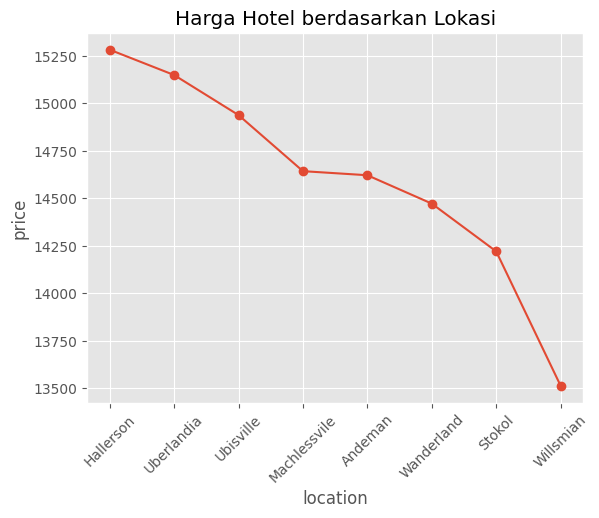

In [ ]:
# Melakukan visualisasi harga hotel berdasarkan lokasi
trains.groupby("location")["price"].mean().sort_values(ascending = False).plot(kind = "line", marker = "o")
plt.xticks(rotation = 45)
plt.ylabel("price")
plt.title("Harga Hotel berdasarkan Lokasi")

<Axes: xlabel='facilities_counts', ylabel='price'>

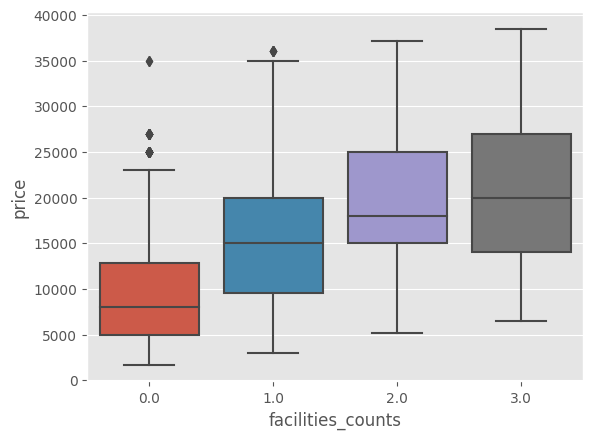

In [ ]:
sns.boxplot(x = trains["facilities_counts"], y = trains["price"])

In [ ]:
from scipy.stats import ks_2samp

In [ ]:
ks = []
pvalues = []
for i in sub.columns:
  a, b = ks_2samp(sub[i], base[i])
  ks.append(a)
  pvalues.append(b)
results = pd.DataFrame({"ks_statistic":ks, "p_value":pvalues}, index = sub.columns)
results

In [ ]:
# Melakukan uji KS pada feature fasilitas
ks = []
pvalues = []
for i in ["restaurant", "bar", "internet", "gym", "pool"]:
  a, b = ks_2samp(trains[trains[i] == 1]["price"], trains[trains[i] == 0]["price"])
  ks.append(a)
  pvalues.append(b)
results = pd.DataFrame({"ks_statistic":ks, "p_value":pvalues},
                       index = ["restaurant", "bar", "internet", "gym", "pool"])
results

ks_statistic       p_value
restaurant      0.181978  6.845699e-11
bar             0.186568  1.868812e-13
internet        0.217970  7.135493e-30
gym             0.379095  8.552276e-59
pool            0.313305  8.662949e-60

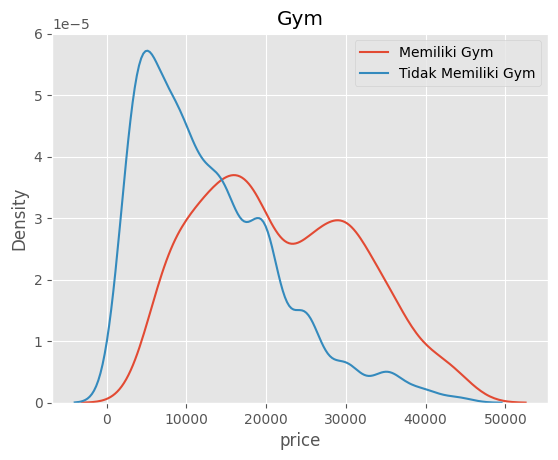

In [ ]:
# Melakukan visualisasi gym terhadap price
sns.kdeplot(trains[trains["gym"] == 1]["price"], label = "Memiliki Gym")
sns.kdeplot(trains[trains["gym"] == 0]["price"], label = "Tidak Memiliki Gym")
plt.title("Gym")
plt.legend()

In [ ]:
trains[trains["gym"] == 1]["price"].mean()/trains[trains["gym"] == 0]["price"].mean()

1.6949672699076332

In [ ]:
trains[trains["gym"] == 1]["price"].mean()

21678.771126760563

In [ ]:
trains[trains["gym"] == 0]["price"].mean()

12790.08244680851

In [ ]:
(trains[trains["gym"] == 1]["price"].mean() - trains[trains["gym"] == 0]["price"].mean())/trains[trains["gym"] == 1]["price"].mean()

0.4100181060991846

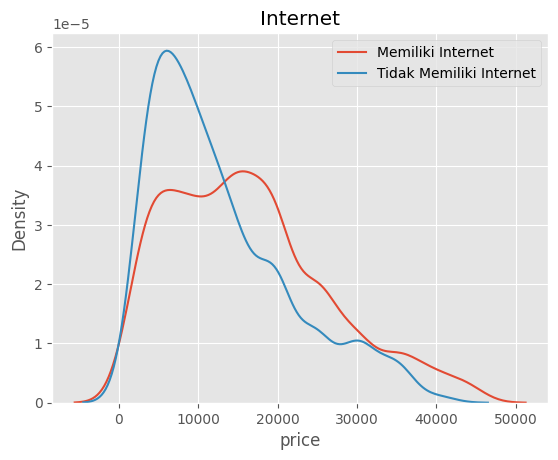

In [ ]:
sns.kdeplot(trains[trains["internet"] == 1]["price"], label = "Memiliki Internet")
sns.kdeplot(trains[trains["internet"] == 0]["price"], label = "Tidak Memiliki Internet")
plt.title("Internet")
plt.legend()

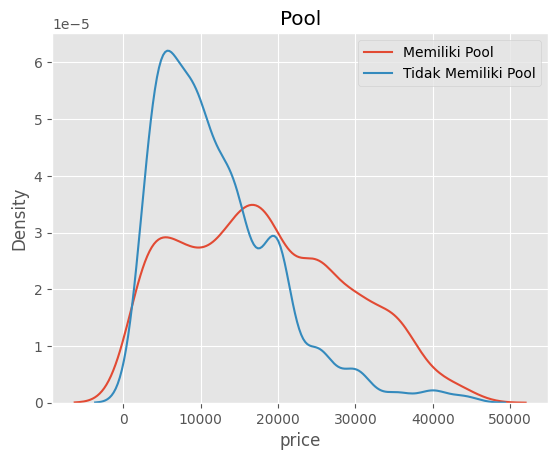

In [ ]:
sns.kdeplot(trains[trains["pool"] == 1]["price"], label = "Memiliki Pool")
sns.kdeplot(trains[trains["pool"] == 0]["price"], label = "Tidak Memiliki Pool")
plt.title("Pool")
plt.legend()

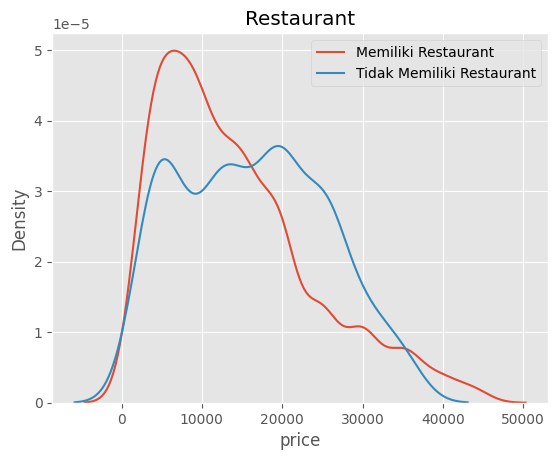

In [ ]:
sns.kdeplot(trains[trains["restaurant"] == 1]["price"], label = "Memiliki Restaurant")
sns.kdeplot(trains[trains["restaurant"] == 0]["price"], label = "Tidak Memiliki Restaurant")
plt.title("Restaurant")
plt.legend();

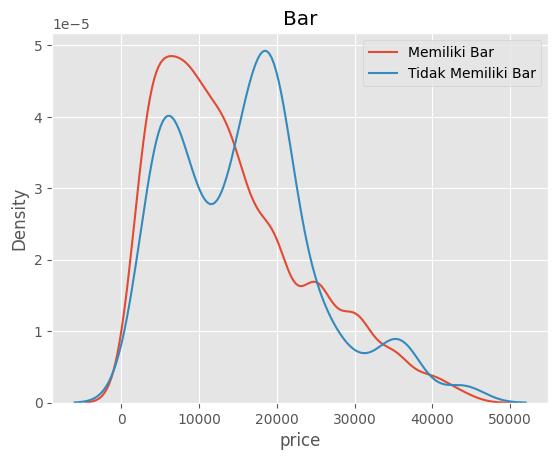

In [ ]:
sns.kdeplot(trains[trains["bar"] == 1]["price"], label = "Memiliki Bar")
sns.kdeplot(trains[trains["bar"] == 0]["price"], label = "Tidak Memiliki Bar")
plt.title("Bar")
plt.legend();

In [ ]:
# Melakukan uji KS pada feature ratings dan reviews
ks = []
pvalues = []
for i in ["ratings", "reviews"]:
  a, b = ks_2samp(trains[i], test[i])
  ks.append(a)
  pvalues.append(b)
results = pd.DataFrame({"ks_statistic":ks, "p_value":pvalues},
                       index = ["ratings", "reviews"])
results

ks_statistic       p_value
ratings      0.048554  1.119709e-01
reviews      0.166076  5.300476e-15

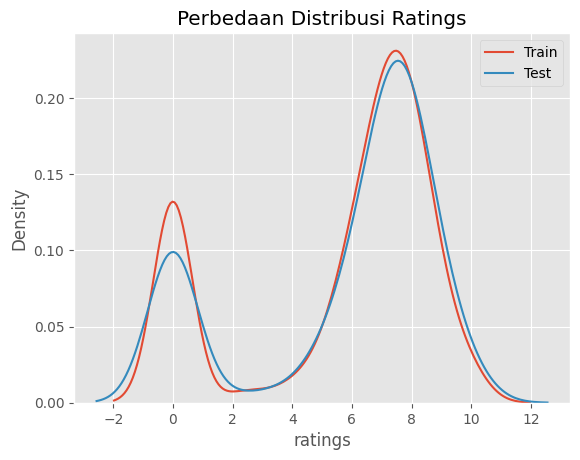

In [ ]:
sns.kdeplot(trains["ratings"], label = "Train")
sns.kdeplot(test["ratings"], label = "Test")
plt.title("Perbedaan Distribusi Ratings")
plt.legend();

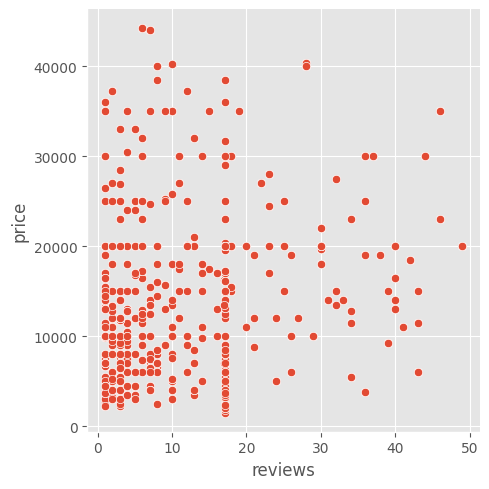

In [ ]:
sns.relplot(x = "reviews", y = "price", data = trains[trains["reviews"] < 50])

Text(0.5, 1.0, 'Average Ratings/Review per Location')

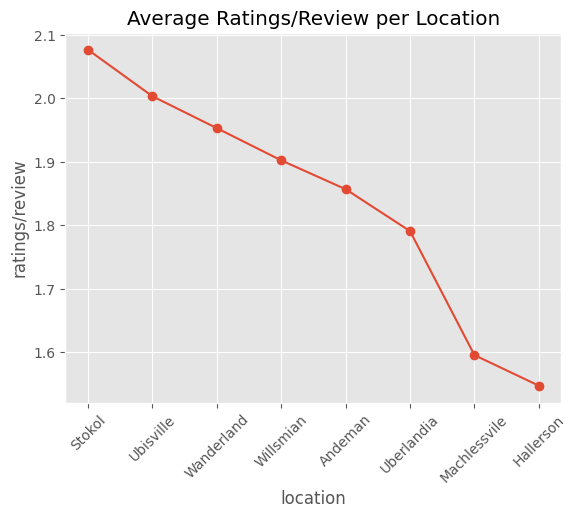

In [ ]:
trains.groupby("location")["ratings/review"].mean().sort_values(ascending = False).plot(kind = "line", marker = "o")
plt.xticks(rotation = 45)
plt.ylabel("ratings/review")
plt.title("Average Ratings/Review per Location")

In [ ]:
# Membuat fungsi plot proporsi
def plot_prop(col, target, data, ax = None):
  counts = data[[col, target]].groupby([col, target]).size().unstack()
  column_counts = counts.sum(axis = "columns")
  props = counts.div(column_counts, axis = "index")
  props.plot(kind = "barh", stacked = True, ax = ax)
  ax.set_title(col)
  ax.set_ylabel("")
  ax.invert_yaxis()
  ax.legend().remove()

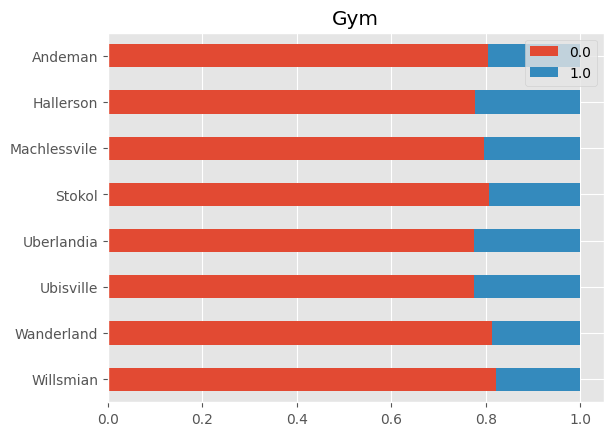

In [ ]:
fig, ax = plt.subplots(1, 1)
plot_prop("location", "gym", trains, ax = ax)
plt.title("Gym")
plt.legend();

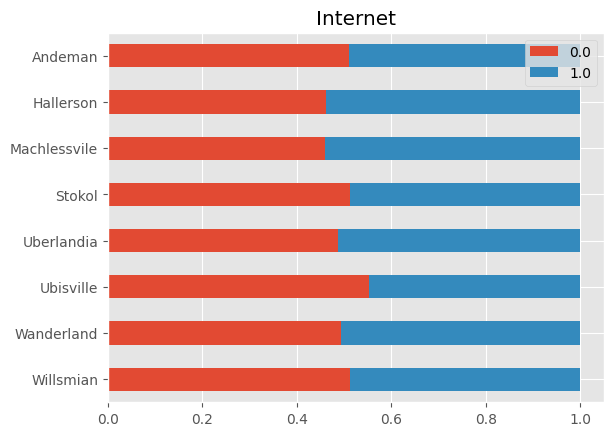

In [ ]:
fig, ax = plt.subplots(1, 1)
plot_prop("location", "internet", trains, ax = ax)
plt.title("Internet")
plt.legend();

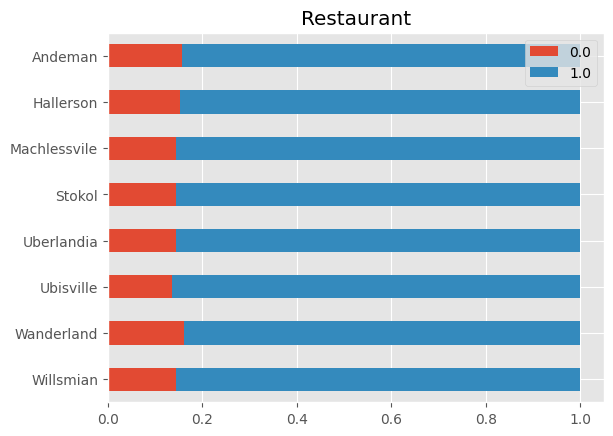

In [ ]:
fig, ax = plt.subplots(1, 1)
plot_prop("location", "restaurant", trains, ax = ax)
plt.title("Restaurant")
plt.legend();

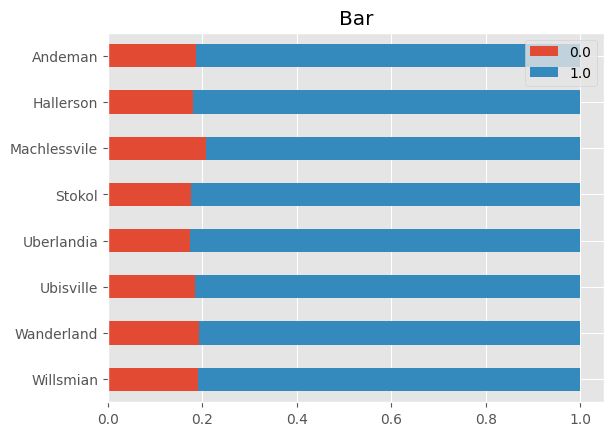

In [ ]:
fig, ax = plt.subplots(1, 1)
plot_prop("location", "bar", trains, ax = ax)
plt.title("Bar")
plt.legend();

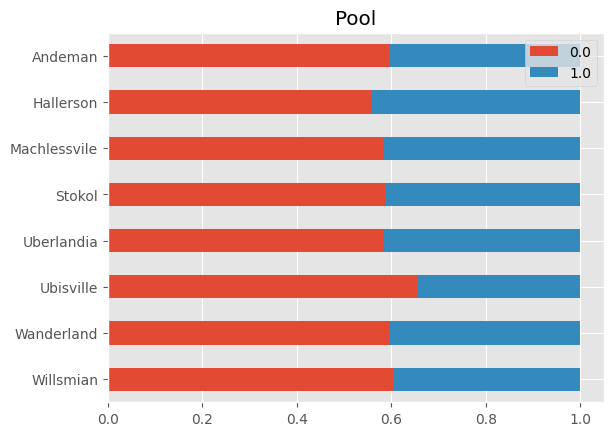

In [ ]:
fig, ax = plt.subplots(1, 1)
plot_prop("location", "pool", trains, ax = ax)
plt.title("Pool")
plt.legend();

In [ ]:
train.drop("is_outlier", axis = 1, inplace = True)

In [ ]:
train["price"].fillna(0, inplace = True)

In [ ]:
train["is_train"].fillna(0, inplace = True)

In [ ]:
train = train[train["price"] < 40000]

In [ ]:
train.corr()

<ipython-input-33-0bc27f030cd9>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train.corr()


is_train     price  facilities_isna
is_train         1.000000  0.005916         0.150375
price            0.005916  1.000000        -0.162463
facilities_isna  0.150375 -0.162463         1.000000

In [ ]:
train

location  is_train  internet  restaurant  gym  bar  pool  very  good  \
0         3.0       1.0       0.0         1.0  0.0  1.0   1.0   1.0   1.0   
1         2.0       1.0       1.0         1.0  1.0  0.0   0.0   0.0   1.0   
2         6.0       1.0       0.0         1.0  1.0  1.0   1.0   1.0   1.0   
3         4.0       1.0       0.0         1.0  0.0  1.0   0.0   1.0   1.0   
4         3.0       1.0       1.0         1.0  0.0  0.0   0.0   1.0   1.0   
..        ...       ...       ...         ...  ...  ...   ...   ...   ...   
760       6.0       0.0       1.0         1.0  1.0  1.0   1.0   1.0   1.0   
761       2.0       0.0       1.0         1.0  1.0  1.0   1.0   1.0   1.0   
762       3.0       0.0       0.0         1.0  1.0  1.0   1.0   0.0   0.0   
763       3.0       0.0       1.0         1.0  1.0  1.0   1.0   0.0   0.0   
765       4.0       0.0       1.0         1.0  1.0  1.0   1.0   0.0   0.0   

     fair  excellent ratings reviews  price  facilities_isna  \
0     0.0        0.0     7.8      10  13500            False   
1     0.0        0.0     5.6       4  13000            False   
2     0.0        0.0     7.2      38  19000            False   
3     0.0        0.0     7.3       6   6000            False   
4     0.0        0.0     7.2      30  20000            False   
..    ...        ...     ...     ...    ...              ...   
760   0.0        0.0     7.6       2   3500            False   
761   0.0        0.0     6.0      15   8000            False   
762   0.0        1.0     8.1       9   9000            False   
763   0.0        1.0     8.0       4  25000            False   
765   0.0        1.0     9.0      17   3500            False   

     facilities_counts  
0                  3.0  
1                  3.0  
2                  4.0  
3                  2.0  
4                  2.0  
..                 ...  
760                5.0  
761                5.0  
762                4.0  
763                5.0  
765                5.0  

[3468 rows x 16 columns]

In [ ]:
train[train["facilities_counts"] == 5]

location  is_train  internet  restaurant  gym  bar  pool  very  good  \
10        7.0       1.0       1.0         1.0  1.0  1.0   1.0   1.0   1.0   
23        3.0       1.0       1.0         1.0  1.0  1.0   1.0   1.0   1.0   
37        7.0       1.0       1.0         1.0  1.0  1.0   1.0   1.0   1.0   
38        3.0       1.0       1.0         1.0  1.0  1.0   1.0   1.0   1.0   
68        3.0       1.0       1.0         1.0  1.0  1.0   1.0   1.0   1.0   
..        ...       ...       ...         ...  ...  ...   ...   ...   ...   
758       2.0       0.0       1.0         1.0  1.0  1.0   1.0   1.0   1.0   
760       6.0       0.0       1.0         1.0  1.0  1.0   1.0   1.0   1.0   
761       2.0       0.0       1.0         1.0  1.0  1.0   1.0   1.0   1.0   
763       3.0       0.0       1.0         1.0  1.0  1.0   1.0   0.0   0.0   
765       4.0       0.0       1.0         1.0  1.0  1.0   1.0   0.0   0.0   

     fair  excellent ratings reviews  price  facilities_isna  \
10    0.0        0.0     6.9      23  17000            False   
23    0.0        0.0     7.2      16  17000            False   
37    0.0        0.0     7.2      16  17000            False   
38    0.0        0.0     7.7      46  23000            False   
68    0.0        0.0     7.8      14  30000            False   
..    ...        ...     ...     ...    ...              ...   
758   0.0        0.0     7.3       1  25000            False   
760   0.0        0.0     7.6       2   3500            False   
761   0.0        0.0     6.0      15   8000            False   
763   0.0        1.0     8.0       4  25000            False   
765   0.0        1.0     9.0      17   3500            False   

     facilities_counts  
10                 5.0  
23                 5.0  
37                 5.0  
38                 5.0  
68                 5.0  
..                 ...  
758                5.0  
760                5.0  
761                5.0  
763                5.0  
765                5.0  

[804 rows x 16 columns]

In [ ]:
train["ratings/review"] = train["ratings"] / train["reviews"]

In [ ]:
X = train.dropna().copy().reset_index(drop = True)
y = X.pop("price")
y_ = X.pop("is_train")

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components = 2)
X_new = pd.concat([pd.DataFrame(pca.fit_transform(X)), y_], axis = 1)
train = pd.concat([X_new, y], axis = 1)
train

0         1  is_train    price
0     -7.394954 -0.930338       1.0  13500.0
1    -13.405214  1.285357       1.0  13000.0
2     20.603439 -0.033824       1.0  19000.0
3    -11.398031 -0.672755       1.0   6000.0
4     12.601661 -0.472731       1.0  20000.0
...         ...       ...       ...      ...
3060  -8.397892 -1.107149       0.0      0.0
3061 -13.397048 -0.815882       0.0      0.0
3062   1.605423 -0.075655       0.0      0.0
3063  -0.393627 -1.747583       0.0      0.0
3064   3.604028  0.413530       0.0      0.0

[3065 rows x 4 columns]

<Axes: xlabel='0', ylabel='1'>

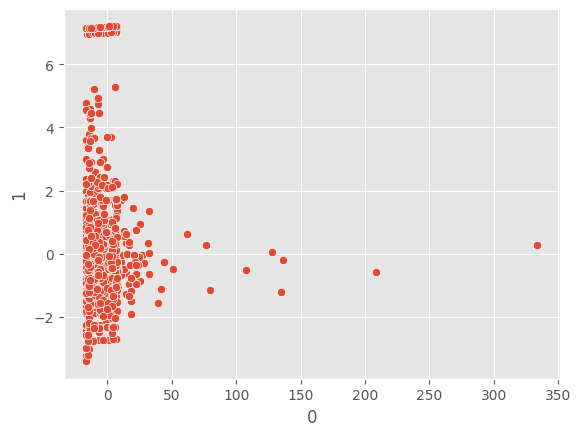

In [ ]:
sns.scatterplot(x = train[0], y = train[1])

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

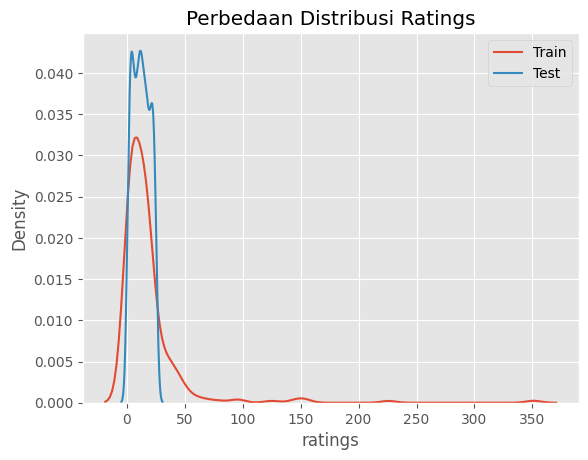

In [ ]:
sns.kdeplot(trains["ratings"], label = "Train")
sns.kdeplot(test["ratings"], label = "Test")
plt.title("Perbedaan Distribusi Ratings")
plt.legend();

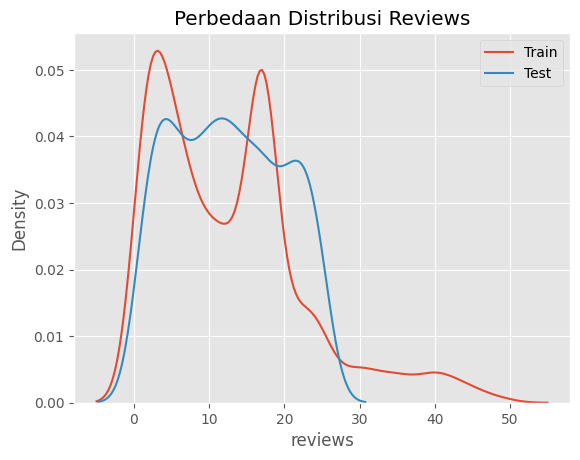

In [ ]:
sns.kdeplot(train[train["reviews"] < 50]["reviews"], label = "Train")
sns.kdeplot(test["reviews"], label = "Test")
plt.title("Perbedaan Distribusi Reviews")
plt.legend();

In [ ]:
trains[trains["excellent"] == 1]["internet"].value_counts()

1.0    354
0.0    352
Name: internet, dtype: int64

<Axes: xlabel='reviews', ylabel='Density'>

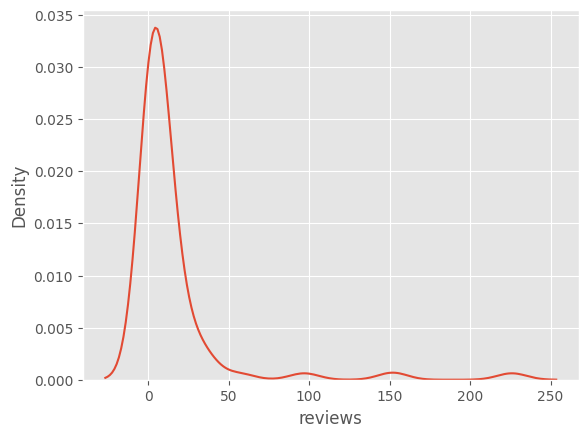

In [ ]:
sns.kdeplot(trains[trains["excellent"] == 1]["reviews"])

In [ ]:
train["quadrat"] = train["ratings"] ** 2
train["cube"] = train["ratings"] ** 3
train["quartic"] = train["ratings"] ** 4

In [ ]:
train["price"].fillna(0, inplace = True)

In [ ]:
from sklearn.preprocessing import PowerTransformer

In [ ]:
power = PowerTransformer()
trains = pd.DataFrame(power.fit_transform(train), columns = train.columns)
trains

is_train  internet  restaurant       gym       bar      pool  \
0     7.450581e-09 -1.185746    0.391303 -0.824806  0.445085  0.989859   
1     7.450581e-09  0.843351    0.391303  1.212407 -2.246763 -1.010245   
2     7.450581e-09 -1.185746    0.391303  1.212407  0.445085  0.989859   
3     7.450581e-09 -1.185746    0.391303 -0.824806  0.445085 -1.010245   
4     7.450581e-09  0.843351    0.391303 -0.824806 -2.246763 -1.010245   
...            ...       ...         ...       ...       ...       ...   
3828           NaN -1.185746    0.391303  1.212407  0.445085  0.989859   
3829           NaN  0.843351    0.391303  1.212407  0.445085  0.989859   
3830           NaN  0.843351    0.391303  1.212407  0.445085  0.989859   
3831           NaN  0.843351    0.391303  1.212407  0.445085  0.989859   
3832           NaN  0.843351    0.391303  1.212407  0.445085  0.989859   

          very      good      fair  excellent  ...  location_Machlessvile  \
0     0.975274  0.801990 -0.291309  -0.664031  ...              -0.308959   
1    -1.025353  0.801990 -0.291309  -0.664031  ...               3.236672   
2     0.975274  0.801990 -0.291309  -0.664031  ...              -0.308959   
3     0.975274  0.801990 -0.291309  -0.664031  ...              -0.308959   
4     0.975274  0.801990 -0.291309  -0.664031  ...              -0.308959   
...        ...       ...       ...        ...  ...                    ...   
3828 -1.025353 -1.246899 -0.291309   1.505953  ...              -0.308959   
3829 -1.025353 -1.246899 -0.291309   1.505953  ...              -0.308959   
3830  0.975274  0.801990 -0.291309  -0.664031  ...              -0.308959   
3831 -1.025353 -1.246899 -0.291309   1.505953  ...              -0.308959   
3832  0.975274  0.801990 -0.291309  -0.664031  ...              -0.308959   

      location_Stokol  location_Uberlandia  location_Ubisville  \
0            2.126747            -0.389986           -0.220682   
1           -0.470202            -0.389986           -0.220682   
2           -0.470202            -0.389986           -0.220682   
3           -0.470202             2.564196           -0.220682   
4            2.126747            -0.389986           -0.220682   
...               ...                  ...                 ...   
3828        -0.470202            -0.389986           -0.220682   
3829        -0.470202            -0.389986           -0.220682   
3830        -0.470202            -0.389986           -0.220682   
3831        -0.470202            -0.389986           -0.220682   
3832        -0.470202             2.564196           -0.220682   

      location_Wanderland  location_Willsmian   is_good  facilities_counts  \
0               -0.427814           -0.348919 -0.295072          -0.096394   
1               -0.427814           -0.348919  3.389003          -0.096394   
2                2.337465           -0.348919 -0.295072           0.609769   
3               -0.427814           -0.348919 -0.295072          -0.852187   
4               -0.427814           -0.348919 -0.295072          -0.852187   
...                   ...                 ...       ...                ...   
3828            -0.427814           -0.348919 -0.295072           0.609769   
3829             2.337465           -0.348919 -0.295072           1.278745   
3830            -0.427814           -0.348919 -0.295072           1.278745   
3831            -0.427814           -0.348919 -0.295072           1.278745   
3832            -0.427814           -0.348919 -0.295072           1.278745   

      ratings_iszero  reviews_iszero  
0          -0.513175             0.0  
1          -0.513175             0.0  
2          -0.513175             0.0  
3          -0.513175             0.0  
4          -0.513175             0.0  
...              ...             ...  
3828       -0.513175             0.0  
3829       -0.513175             0.0  
3830       -0.513175             0.0  
3831       -0.513175             0.0  
3832       -0.513175             0.0 

In [ ]:
train["ratings_f"] = trains["ratings"]
train["reviews_f"] = trains["reviews"]

In [ ]:
train["ratingsxreviews"]  = train["ratings"] * train["reviews"]

In [ ]:
train["ratings_iszero"] = (train["ratings"] == 0.0)
train["reviews_iszero"] = (train["reviews"] == 0.0)

In [ ]:
train.columns

Index(['is_train', 'internet', 'restaurant', 'gym', 'bar', 'pool', 'very',
       'good', 'fair', 'excellent', 'ratings', 'price', 'reviews',
       'facilities_isna', 'location_Hallerson', 'location_Machlessvile',
       'location_Stokol', 'location_Uberlandia', 'location_Ubisville',
       'location_Wanderland', 'location_Willsmian', 'is_good',
       'facilities_counts'],
      dtype='object')

In [ ]:
train["is_train"].fillna(0, inplace = True)

In [ ]:
train

location  is_train  internet  restaurant  gym  bar  pool  very  good  \
0          Stokol       1.0       0.0         1.0  0.0  1.0   1.0   1.0   1.0   
1    Machlessvile       1.0       1.0         1.0  1.0  0.0   0.0   0.0   1.0   
2      Wanderland       1.0       0.0         1.0  1.0  1.0   1.0   1.0   1.0   
3      Uberlandia       1.0       0.0         1.0  0.0  1.0   0.0   1.0   1.0   
4          Stokol       1.0       1.0         1.0  0.0  0.0   0.0   1.0   1.0   
..            ...       ...       ...         ...  ...  ...   ...   ...   ...   
760     Ubisville       0.0       1.0         1.0  1.0  1.0   1.0   1.0   1.0   
761     Hallerson       0.0       1.0         1.0  1.0  1.0   1.0   1.0   1.0   
762       Andeman       0.0       0.0         1.0  1.0  1.0   1.0   0.0   0.0   
763    Wanderland       0.0       1.0         1.0  1.0  1.0   1.0   0.0   0.0   
765     Hallerson       0.0       1.0         1.0  1.0  1.0   1.0   0.0   0.0   

     fair  excellent ratings reviews  price  facilities_isna  
0     0.0        0.0     7.8      10  13500            False  
1     0.0        0.0     5.6       4  13000            False  
2     0.0        0.0     7.2      38  19000            False  
3     0.0        0.0     7.3       6   6000            False  
4     0.0        0.0     7.2      30  20000            False  
..    ...        ...     ...     ...    ...              ...  
760   0.0        0.0     7.6       2   3500            False  
761   0.0        0.0     6.0      15   8000            False  
762   0.0        1.0     8.1       9   9000            False  
763   0.0        1.0     8.0       4  25000            False  
765   0.0        1.0     9.0      17   3500            False  

[3468 rows x 15 columns]

In [ ]:
train = train.astype("float")

In [ ]:
# Mengambil feature hasil feature selection
X_ = train[['is_train', 'gym', 'price']].copy()

# Mengambil data train dan test dengan bantuan fitur is_train
# Kemudian drop feature is_train
X = X_[X_["is_train"] == 1].copy().reset_index(drop = True)
y = X.pop("price")
test_ = X_[X_["is_train"] == 0].copy().reset_index(drop = True)
X.drop("is_train", axis = 1, inplace = True)
test_.drop("is_train", axis = 1, inplace = True)

# Melakukan cross validation dengan evaluation metric MAE
model = XGBRegressor()
scores = -1 * cross_val_score(model, X, y, cv = 10, scoring = "neg_mean_absolute_error", n_jobs = -1)
print("Mean: ", scores.mean())
print("Std: ", scores.std())

Mean:  7249.189875298674
Std:  285.0425069348535


In [ ]:
XGBRegressor()

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [ ]:
X.corr()

gym
gym  1.0

In [ ]:
model = HuberRegressor()
scores = -1 * cross_val_score(model, X, y, cv = 10, scoring = "neg_mean_absolute_error", n_jobs = -1)
print("Mean: ", scores.mean())
print("Std: ", scores.std())

In [ ]:
import optuna
from xgboost import XGBRegressor

In [ ]:
model = XGBRegressor()
scores = -1 * cross_val_score(model, X, y, cv = 10, scoring = "neg_mean_absolute_error", n_jobs = -1)
print("Mean: ", scores.mean())
print("Std: ", scores.std())

Mean:  7249.189875298674
Std:  285.0425069348535


In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
model = RandomForestRegressor()
scores = -1 * cross_val_score(model, X, y, cv = 10, scoring = "neg_mean_absolute_error", n_jobs = -1)
print("Mean: ", scores.mean())
print("Std: ", scores.std())

Mean:  1429.6158435768407
Std:  181.6404379418751


In [ ]:
from lightgbm import LGBMRegressor

In [ ]:
model = LGBMRegressor()
scores = -1 * cross_val_score(model, X, y, cv = 10, scoring = "neg_mean_absolute_error", n_jobs = -1)
print("Mean: ", scores.mean())
print("Std: ", scores.std())

Mean:  2895.080970954874
Std:  169.22873891143703


In [ ]:
from catboost import CatBoostRegressor

In [ ]:
model = CatBoostRegressor()
scores = -1 * cross_val_score(model, X, y, cv = 10, scoring = "neg_mean_absolute_error", n_jobs = -1)
print("Mean: ", scores.mean())
print("Std: ", scores.std())

Mean:  3789.8788606388284
Std:  419.66235794065756


In [ ]:
test_.drop("price", axis = 1, inplace = True)

In [ ]:
# Melakukan training ke keseluruhan train set
model = XGBRegressor()
model.fit(X, y)
preds = model.predict(test_)

In [ ]:
# Memasukkan hasil prediksi ke feature price submisi
# Lalu export dataframe dalam bentuk file csv
sub["Price"] = preds
sub.to_csv("test4_xgb.csv", index = False)

In [ ]:
sub

ID         Price
0      0  19167.136719
1      1  16532.238281
2      2   9055.977539
3      3  15083.333984
4      4   9055.977539
..   ...           ...
762  762  15574.469727
763  763  19167.136719
764  764  16532.238281
765  765   2702.137939
766  766  14798.814453

[767 rows x 2 columns]

In [ ]:
# Are both train and ori sets have the same distribution?
# Almost all features have same distribution except free sulfur dioxide and total sulfur dioxide
from scipy.stats import ks_2samp
ks = []
pvalues = []
for i in sub.columns:
  a, b = ks_2samp(sub[i], base[i])
  ks.append(a)
  pvalues.append(b)
results = pd.DataFrame({"ks_statistic":ks, "p_value":pvalues}, index = sub.columns)
results

ks_statistic       p_value
ID         0.000000  1.000000e+00
Price      0.222947  4.122408e-17

In [ ]:
base = pd.read_csv("/content/dropna_xgb.csv")

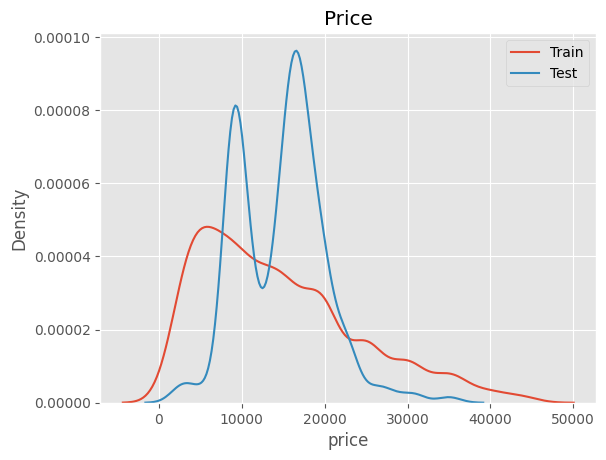

In [ ]:
# Melakukan perbandingan hasil prediksi testing set dengan harga training set
sns.kdeplot(train[train["is_train"] == 1]["price"], label = "Train")
sns.kdeplot(preds, label = "Test")
plt.title("Price")
plt.legend()

In [ ]:
sub

ID         Price
0      0  16118.648438
1      1  14349.414062
2      2   9055.960938
3      3  15083.024414
4      4   9055.960938
..   ...           ...
762  762  15574.263672
763  763  16118.648438
764  764  14349.414062
765  765   2702.162842
766  766  14798.800781

[767 rows x 2 columns]

In [ ]:
train = train[train["price"] < 50000]

<Axes: xlabel='price'>

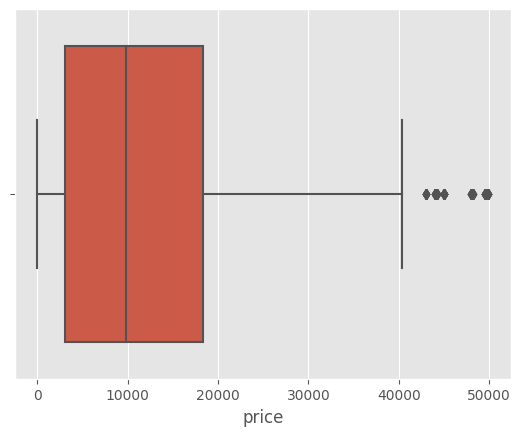

In [ ]:
sns.boxplot(x = train["price"])

In [ ]:
sub

ID         Price
0      0  19167.949219
1      1  16533.248047
2      2   4416.770508
3      3  15083.975586
4      4   4416.770508
..   ...           ...
762  762  34814.417969
763  763  19167.949219
764  764  16533.248047
765  765   2717.181152
766  766  14800.276367

[767 rows x 2 columns]

*   Feature ratings sendiri adalah feature yang penting
*   Fascilities counts tidak terlalu penting
*   Bagaimana deal with missing values ratings?





In [ ]:
train

is_train internet restaurant    gym    bar   pool   very   good   fair  \
0          1.0    False       True  False   True   True   True   True  False   
1          1.0     True       True   True  False  False  False   True  False   
2          1.0    False       True   True   True   True   True   True  False   
3          1.0    False       True  False   True  False   True   True  False   
4          1.0     True       True  False  False  False   True   True  False   
...        ...      ...        ...    ...    ...    ...    ...    ...    ...   
3828       NaN    False       True   True   True   True  False  False  False   
3829       NaN     True       True   True   True   True  False  False  False   
3830       NaN     True       True   True   True   True   True   True  False   
3831       NaN     True       True   True   True   True  False  False  False   
3832       NaN     True       True   True   True   True   True   True  False   

     excellent  ...  facilities_isna  location_Hallerson  \
0        False  ...            False                   0   
1        False  ...            False                   0   
2        False  ...            False                   0   
3        False  ...            False                   0   
4        False  ...            False                   0   
...        ...  ...              ...                 ...   
3828      True  ...            False                   0   
3829      True  ...            False                   0   
3830     False  ...            False                   0   
3831      True  ...            False                   1   
3832     False  ...            False                   0   

      location_Machlessvile  location_Stokol  location_Uberlandia  \
0                         0                1                    0   
1                         1                0                    0   
2                         0                0                    0   
3                         0                0                    1   
4                         0                1                    0   
...                     ...              ...                  ...   
3828                      0                0                    0   
3829                      0                0                    0   
3830                      0                0                    0   
3831                      0                0                    0   
3832                      0                0                    1   

      location_Ubisville  location_Wanderland  location_Willsmian  is_good  \
0                      0                    0                   0    False   
1                      0                    0                   0     True   
2                      0                    1                   0    False   
3                      0                    0                   0    False   
4                      0                    0                   0    False   
...                  ...                  ...                 ...      ...   
3828                   0                    0                   0    False   
3829                   0                    1                   0    False   
3830                   0                    0                   0    False   
3831                   0                    0                   0    False   
3832                   0                    0                   0    False   

      facilities_counts  
0                     3  
1                     3  
2                     4  
3                     2  
4                     2  
...                 ...  
3828                  4  
3829                  5  
3830                  5  
3831                  5  
3832                  5  

[3833 rows x 23 columns]

In [ ]:
train[train["reviews"].isnull()]

is_train internet restaurant    gym    bar   pool very good fair  \
8          1.0     True       True  False   True  False  NaN  NaN  NaN   
13         1.0     True       True  False  False  False  NaN  NaN  NaN   
16         1.0      NaN        NaN    NaN    NaN    NaN  NaN  NaN  NaN   
17         1.0    False      False  False   True  False  NaN  NaN  NaN   
25         1.0    False      False  False   True  False  NaN  NaN  NaN   
...        ...      ...        ...    ...    ...    ...  ...  ...  ...   
3045       1.0     True       True   True   True   True  NaN  NaN  NaN   
3046       1.0     True       True  False   True  False  NaN  NaN  NaN   
3051       1.0    False       True  False  False   True  NaN  NaN  NaN   
3061       1.0     True      False  False   True  False  NaN  NaN  NaN   
3064       1.0    False       True  False  False  False  NaN  NaN  NaN   

     excellent  ...  facilities_isna  location_Hallerson  \
8          NaN  ...            False                   0   
13         NaN  ...            False                   0   
16         NaN  ...             True                   0   
17         NaN  ...            False                   0   
25         NaN  ...            False                   0   
...        ...  ...              ...                 ...   
3045       NaN  ...            False                   0   
3046       NaN  ...            False                   0   
3051       NaN  ...            False                   0   
3061       NaN  ...            False                   0   
3064       NaN  ...            False                   1   

      location_Machlessvile  location_Stokol  location_Uberlandia  \
8                         0                0                    0   
13                        0                1                    0   
16                        1                0                    0   
17                        0                1                    0   
25                        0                0                    0   
...                     ...              ...                  ...   
3045                      0                0                    0   
3046                      0                1                    0   
3051                      0                0                    0   
3061                      0                0                    0   
3064                      0                0                    0   

      location_Ubisville  location_Wanderland  location_Willsmian  is_good  \
8                      0                    0                   0    False   
13                     0                    0                   0    False   
16                     0                    0                   0    False   
17                     0                    0                   0    False   
25                     0                    1                   0    False   
...                  ...                  ...                 ...      ...   
3045                   0                    0                   1    False   
3046                   0                    0                   0    False   
3051                   0                    1                   0    False   
3061                   0                    0                   0    False   
3064                   0                    0                   0    False   

      facilities_counts  
8                     3  
13                    2  
16                  NaN  
17                    1  
25                    1  
...                 ...  
3045                  5  
3046                  3  
3051                  2  
3061                  2  
3064                  1  

[637 rows x 23 columns]

In [ ]:
train[train["facilities_isna"] == True]

is_train internet restaurant  gym  bar pool   very   good   fair  \
16         1.0      NaN        NaN  NaN  NaN  NaN    NaN    NaN    NaN   
29         1.0      NaN        NaN  NaN  NaN  NaN   True   True  False   
44         1.0      NaN        NaN  NaN  NaN  NaN    NaN    NaN    NaN   
58         1.0      NaN        NaN  NaN  NaN  NaN    NaN    NaN    NaN   
60         1.0      NaN        NaN  NaN  NaN  NaN  False  False  False   
...        ...      ...        ...  ...  ...  ...    ...    ...    ...   
2998       1.0      NaN        NaN  NaN  NaN  NaN    NaN    NaN    NaN   
3015       1.0      NaN        NaN  NaN  NaN  NaN    NaN    NaN    NaN   
3021       1.0      NaN        NaN  NaN  NaN  NaN    NaN    NaN    NaN   
3030       1.0      NaN        NaN  NaN  NaN  NaN    NaN    NaN    NaN   
3037       1.0      NaN        NaN  NaN  NaN  NaN    NaN    NaN    NaN   

     excellent  ...  reviews  facilities_isna  location_Hallerson  \
16         NaN  ...      NaN             True                   0   
29       False  ...     43.0             True                   0   
44         NaN  ...      NaN             True                   0   
58         NaN  ...      NaN             True                   0   
60        True  ...      1.0             True                   0   
...        ...  ...      ...              ...                 ...   
2998       NaN  ...      NaN             True                   0   
3015       NaN  ...      NaN             True                   0   
3021       NaN  ...      NaN             True                   0   
3030       NaN  ...      NaN             True                   0   
3037       NaN  ...      NaN             True                   0   

      location_Machlessvile  location_Stokol  location_Uberlandia  \
16                        1                0                    0   
29                        0                0                    0   
44                        0                0                    1   
58                        0                1                    0   
60                        0                0                    0   
...                     ...              ...                  ...   
2998                      1                0                    0   
3015                      0                1                    0   
3021                      0                0                    1   
3030                      0                0                    0   
3037                      0                0                    0   

      location_Ubisville  location_Wanderland  location_Willsmian  is_good  
16                     0                    0                   0    False  
29                     0                    1                   0    False  
44                     0                    0                   0    False  
58                     0                    0                   0    False  
60                     0                    1                   0    False  
...                  ...                  ...                 ...      ...  
2998                   0                    0                   0    False  
3015                   0                    0                   0    False  
3021                   0                    0                   0    False  
3030                   0                    0                   1    False  
3037                   0                    1                   0    False  

[301 rows x 22 columns]

In [ ]:
train.isnull().sum()

is_train                 767
internet                 301
restaurant               301
gym                      301
bar                      301
pool                     301
very                     637
good                     637
fair                     637
excellent                637
ratings                   23
price                    767
reviews                  637
facilities_isna            0
location_Hallerson         0
location_Machlessvile      0
location_Stokol            0
location_Uberlandia        0
location_Ubisville         0
location_Wanderland        0
location_Willsmian         0
is_good                    0
facilities_counts        301
dtype: int64

In [ ]:
train.to_csv("train_clean_v4.csv", index = False)

<Axes: xlabel='facilities_counts', ylabel='price'>

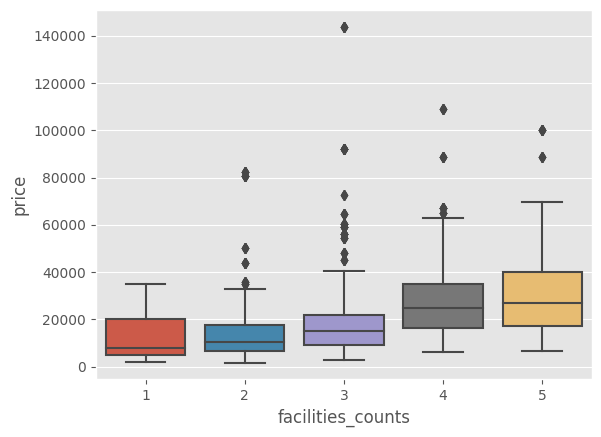

In [ ]:
sns.boxplot(x = "facilities_counts", y = "price", data = train)

<ipython-input-294-1d6069294b3a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train[train["is_train"] == 1].corr(), annot = True)


<Axes: >

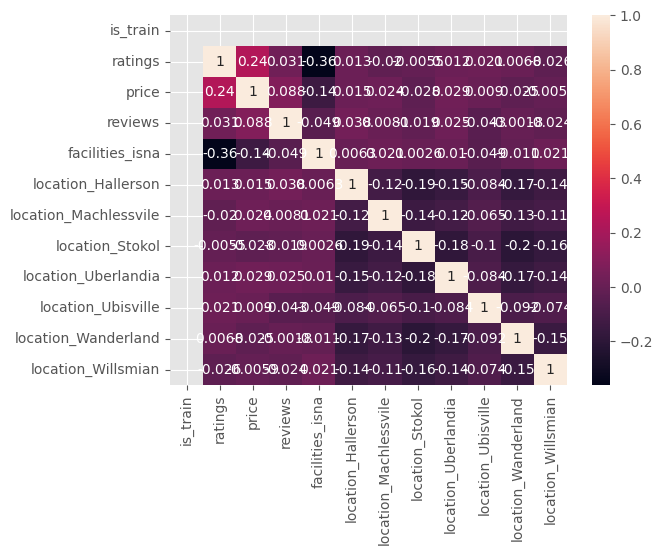

In [ ]:
sns.heatmap(train[train["is_train"] == 1].corr(), annot = True)

<Axes: xlabel='ratings', ylabel='price'>

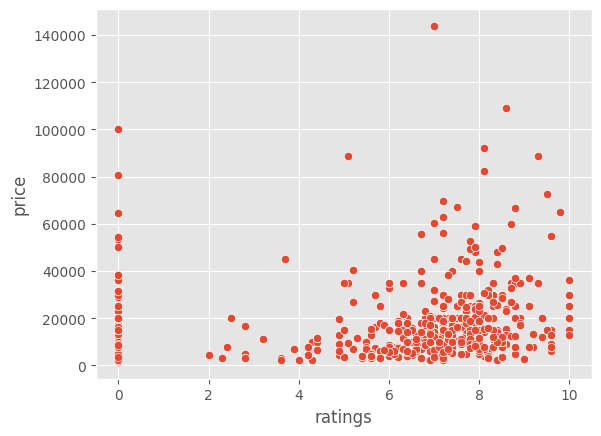

In [ ]:
sns.scatterplot(x = "ratings", y = "price", data = train)

Text(0.5, 1.0, 'Average Ratings per Location')

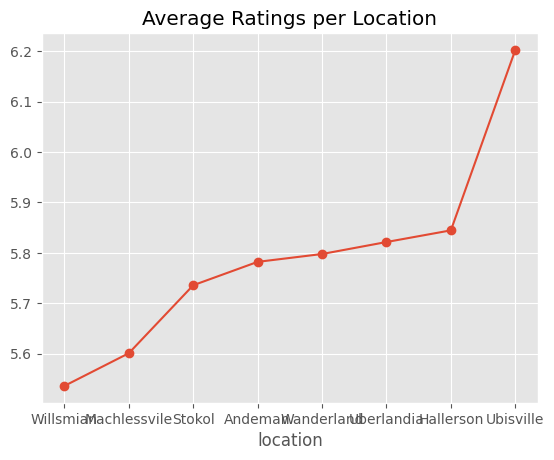

In [ ]:
train.groupby("location")["ratings"].mean().sort_values(ascending = True).plot(kind = "line", marker = "o")
plt.title("Average Ratings per Location")

Text(0.5, 1.0, 'Average Price per Location')

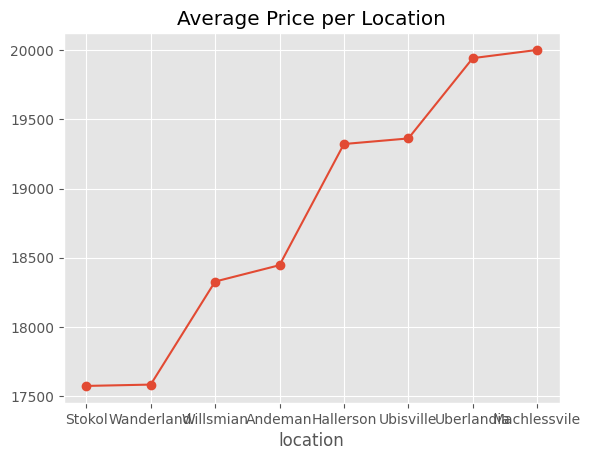

In [ ]:
train.groupby("location")["price"].mean().sort_values(ascending = True).plot(kind = "line", marker = "o")
plt.title("Average Price per Location")

In [ ]:
train.to_csv("train_clean_v1.csv", index = False)

In [ ]:
matches = fuzzywuzzy.process.extract("bar", .untrain["facilities"]ique().sort(), limit = 10, scorer = fuzzywuzzy.fuzz.token_sort_ratio)
matches

In [ ]:
train.isnull().sum()

facilities    301
rating        637
location        0
Price         767
is_train      767
dtype: int64

In [ ]:
# Melihat jumlah features dan tipe data
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3066 entries, 0 to 3065
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   facilities  2765 non-null   object
 1   rating      2429 non-null   object
 2   location    3066 non-null   object
 3   Price       3066 non-null   object
dtypes: object(4)
memory usage: 95.9+ KB


In [ ]:
# Melihat pemusatan data features numerik
train.describe(exclude = "object")

In [ ]:
# Melihat pemusatan data features kategorik
train.describe(include = "object")

age_group         education   race     sex             income_poverty  \
count       26707             25300  26707   26707                      22284   
unique          5                 4      4       2                          3   
top     65+ Years  College Graduate  White  Female  <= $75,000, Above Poverty   
freq         6843             10097  21222   15858                      12777   

       marital_status rent_or_own employment_status hhs_geo_region  \
count           25299       24665             25244          26707   
unique              2           2                 3             10   
top           Married         Own          Employed       lzgpxyit   
freq            13555       18736             13560           4297   

                      census_msa employment_industry employment_occupation  
count                      26707               13377                 13237  
unique                         3                  21                    23  
top     MSA, Not Principle  City            fcxhlnwr              xtkaffoo  
freq                       11645                2468                  1778

In [ ]:
# Melihat jumlah missing values dan persentasenya serta mengurutkannya
missing = pd.DataFrame(train.isnull().sum())
missing["percentage"] = (missing[0]/train.shape[0]) * 100
missing.rename(columns = {0:"counts"}, inplace = True)
missing.sort_values(by = "percentage", ascending = False)

counts  percentage
employment_occupation         13470   50.436215
employment_industry           13330   49.912008
health_insurance              12274   45.957989
income_poverty                 4423   16.561201
doctor_recc_h1n1               2160    8.087767
doctor_recc_seasonal           2160    8.087767
rent_or_own                    2042    7.645936
employment_status              1463    5.477965
marital_status                 1408    5.272026
education                      1407    5.268282
chronic_med_condition           971    3.635751
child_under_6_months            820    3.070356
health_worker                   804    3.010447
opinion_seas_sick_from_vacc     537    2.010709
opinion_seas_risk               514    1.924589
opinion_seas_vacc_effective     462    1.729884
opinion_h1n1_sick_from_vacc     395    1.479013
opinion_h1n1_vacc_effective     391    1.464036
opinion_h1n1_risk               388    1.452803
household_adults                249    0.932340
household_children              249    0.932340
behavioral_avoidance            208    0.778822
behavioral_touch_face           128    0.479275
h1n1_knowledge                  116    0.434343
h1n1_concern                     92    0.344479
behavioral_large_gatherings      87    0.325757
behavioral_outside_home          82    0.307036
behavioral_antiviral_meds        71    0.265848
behavioral_wash_hands            42    0.157262
behavioral_face_mask             19    0.071142
h1n1_vaccine                      0    0.000000
respondent_id                     0    0.000000
census_msa                        0    0.000000
hhs_geo_region                    0    0.000000
sex                               0    0.000000
race                              0    0.000000
age_group                         0    0.000000
seasonal_vaccine                  0    0.000000

In [ ]:
# Drop feature respondent_id
train.drop("respondent_id", axis = 1, inplace = True)

In [ ]:
# Melakukan pengecekan data duplikat
train.duplicated().sum()

0

# B. Data Visualization
Pada bagian ini, dilakukan visualisasi untuk membantu univariate analysis, bivariate analysis, serta multivariate analysis. Kemudian akan diselidiki hubungan antara features terutama dengan feature target yaitu h1n1_vaccine dan seasonal_vaccine.

## 1. Univariate Analysis
Pada univariate analysis ini kita melakukan analisis terhadap distribusi feature baik yang numerik maupun yang katergorik untuk mengetahui pemusatan dan persebarannya.

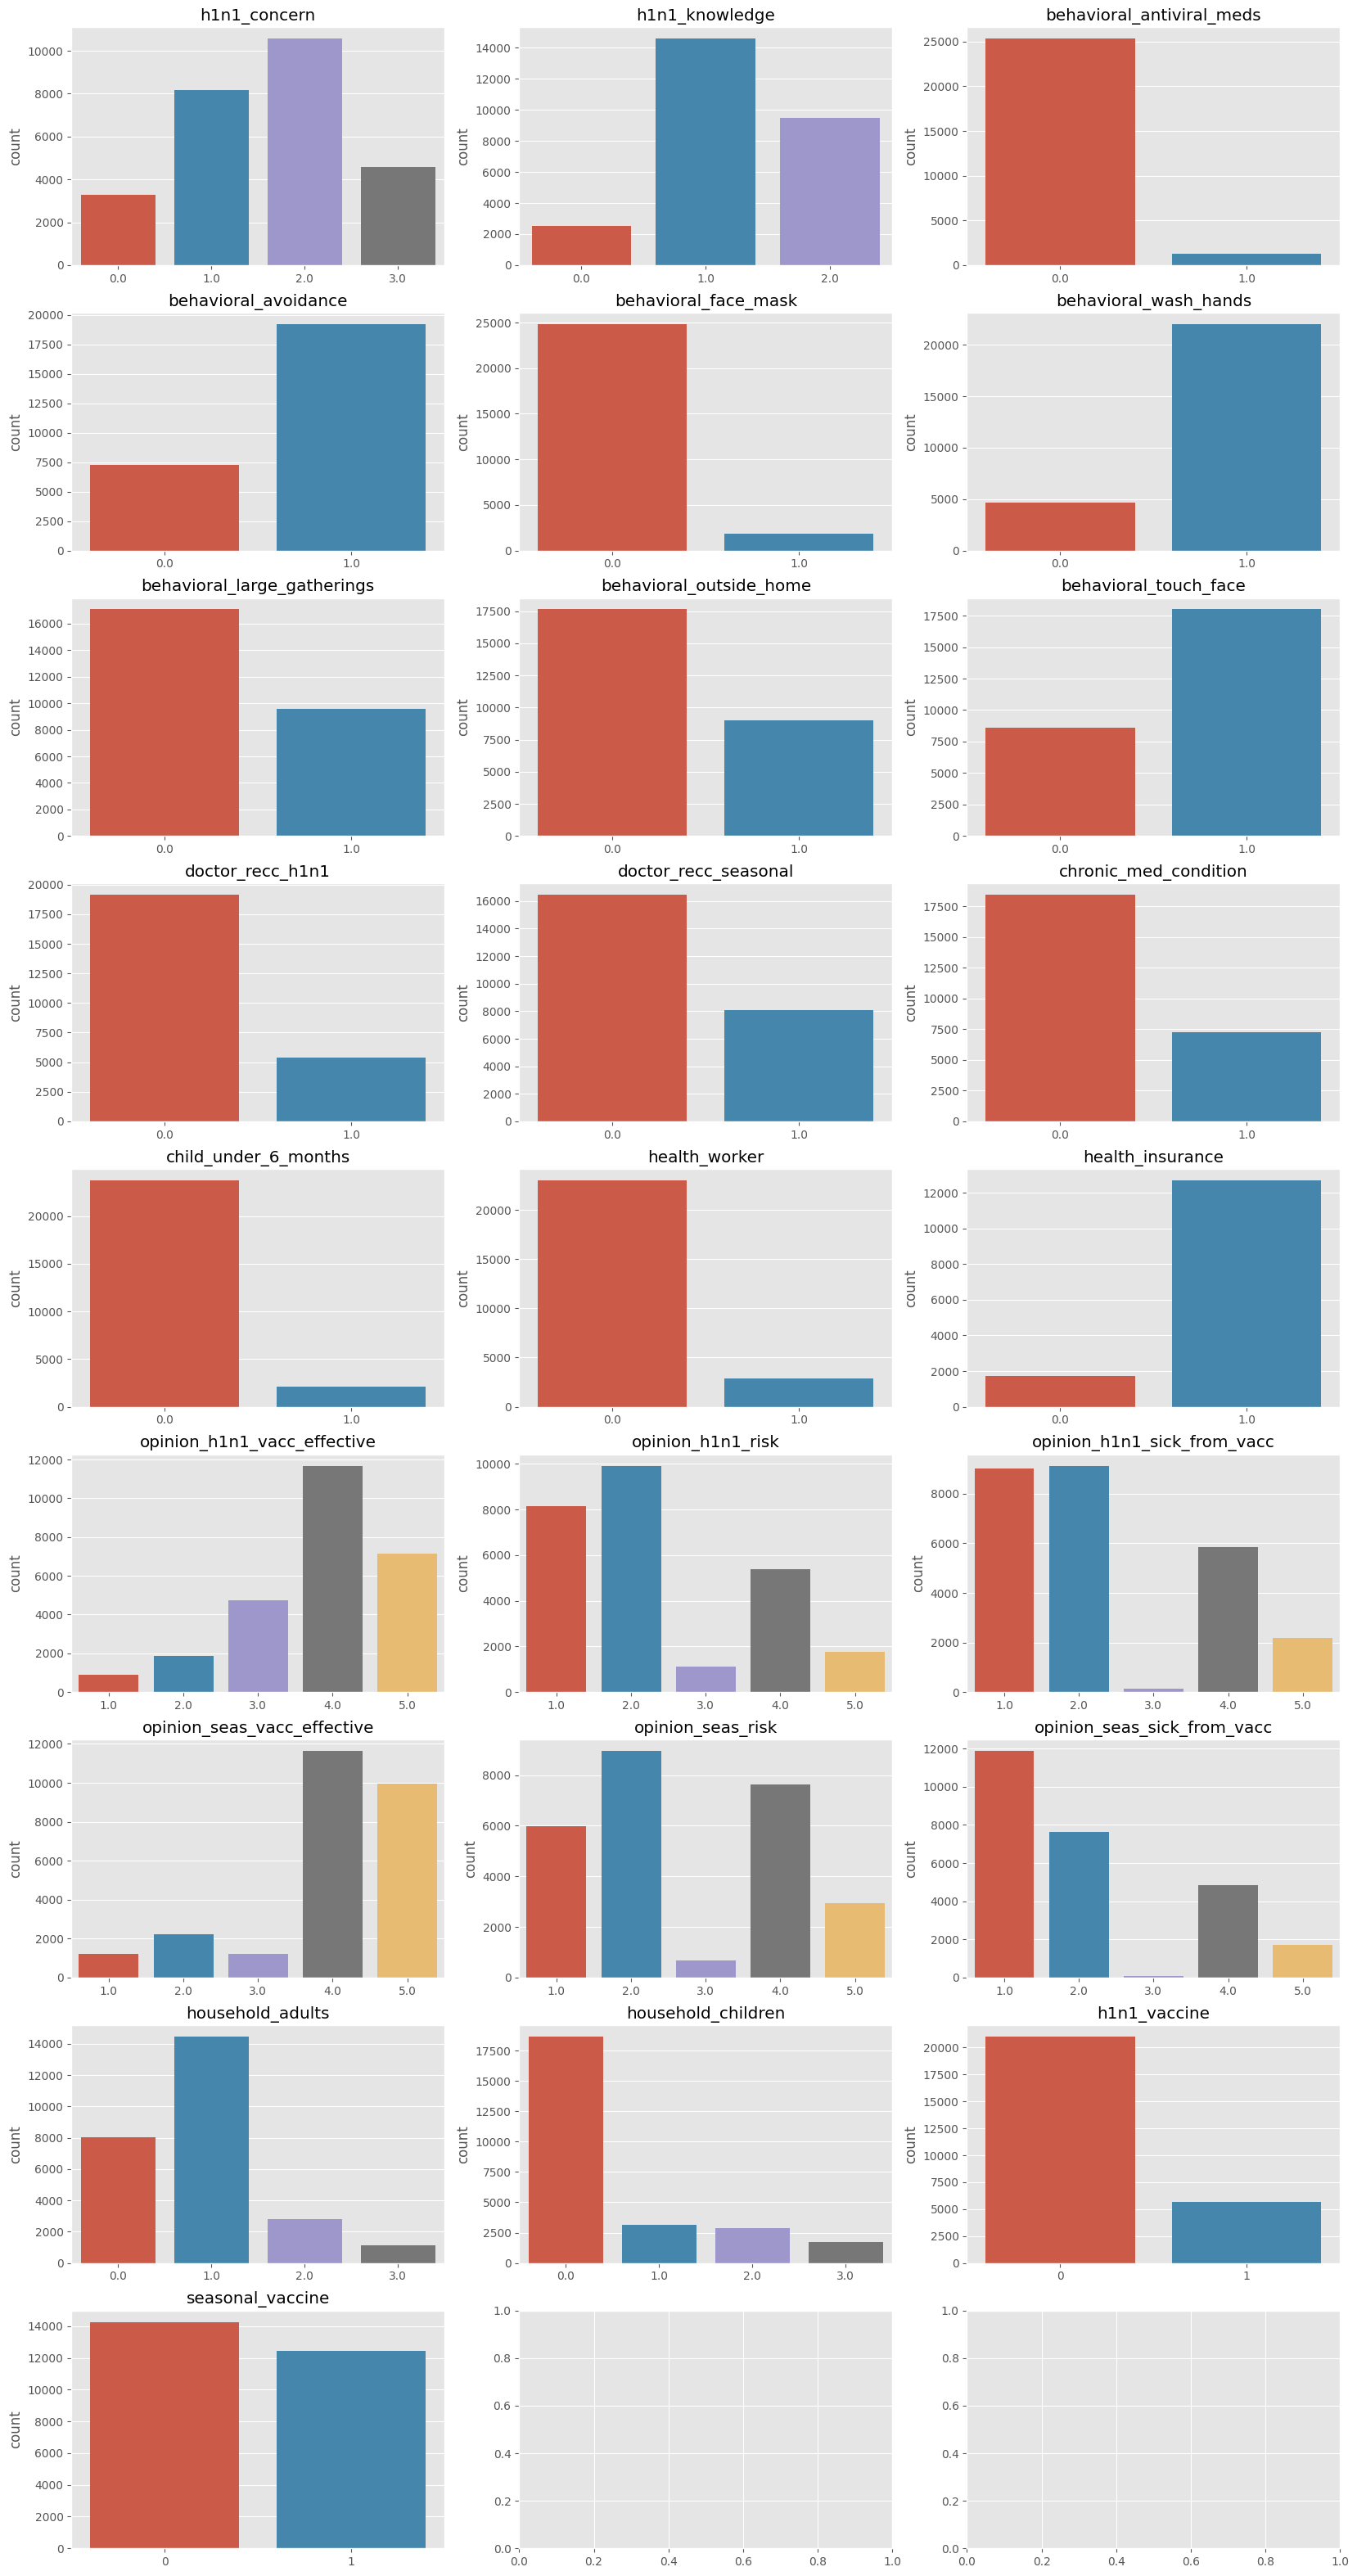

In [ ]:
# Visualisasi features numeric
numerical = list(train.select_dtypes(exclude = "object").columns)
fig, ax = plt.subplots(9, 3, figsize = (20, 40))
ax = ax.flatten()
for i, j in enumerate(numerical):
  g = sns.countplot(x = train[j], ax = ax[i])
  g.set_title(j)
  g.set_xlabel("");
numerical.pop(24);
numerical.pop(23);

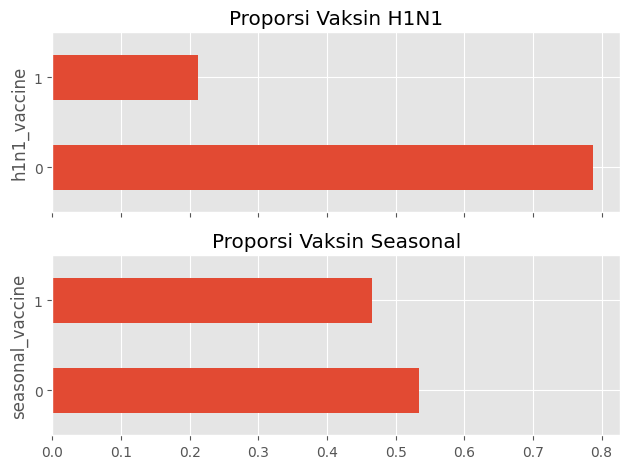

In [ ]:
# Membuat plot proporsi perbandingan label h1n1_vaccine dan seasonal_vaccine
fig, ax = plt.subplots(2, 1, sharex = True)
n_obs = train.shape[0]
(train['h1n1_vaccine']
    .value_counts()
    .div(n_obs)
    .plot.barh(title = "Proporsi Vaksin H1N1", ax = ax[0])
)
ax[0].set_ylabel("h1n1_vaccine")
(train['seasonal_vaccine']
    .value_counts()
    .div(n_obs)
    .plot.barh(title = "Proporsi Vaksin Seasonal", ax=ax[1])
)
ax[1].set_ylabel("seasonal_vaccine")
fig.tight_layout()

Setelah dilakukan univariate analysis pada feature numerik didapatkan bahwa,
- Mayoritas responden tidak khawatir dan sedikit khawatir terhadap virus H1N1.
- Mayoritas responden sudah tahu atau memiliki pengetahuan sedikit tentang virus H1N1.
- Mayoritas responden tidak mengambil antiviral medications.
- Mayoritas responden masih bepergian keluar dan masih sering datang ke kerumunan tanpa masker tetapi melakukan jaga jarak dan tidak memegang muka.
- Mayoritas responden memiliki asuransi kesehatan.
- Mayoritas responden tidak memiliki penyakit kronis.
- Mayoritas responden adalah bukan berprofesi sebagai tenaga kesehatan.
- Mayoritas responden memiliki respon bahwa vaksin baik H1N1 ataupun Seasonal adalah efektif.
- Mayoritas responden adalah tidak peduli dan peduli tentang virus H1N1 maupun seasonal.
- Mayoritas responden tidak mendapat rekomendasi dokter untuk vaksin baik H1N1 ataupun Seasonal.
- Mayoritas responden adalah pasangan dan sendiri.
- Mayoritas responden tidak memiliki anak.
- Mayoritas responden tidak melakukan kontak dengan anak berumur dibawah enam bulan.
- Dari 50% lebih responden yang vaksin seasonal hanya 20% yang vaksin H1N1.

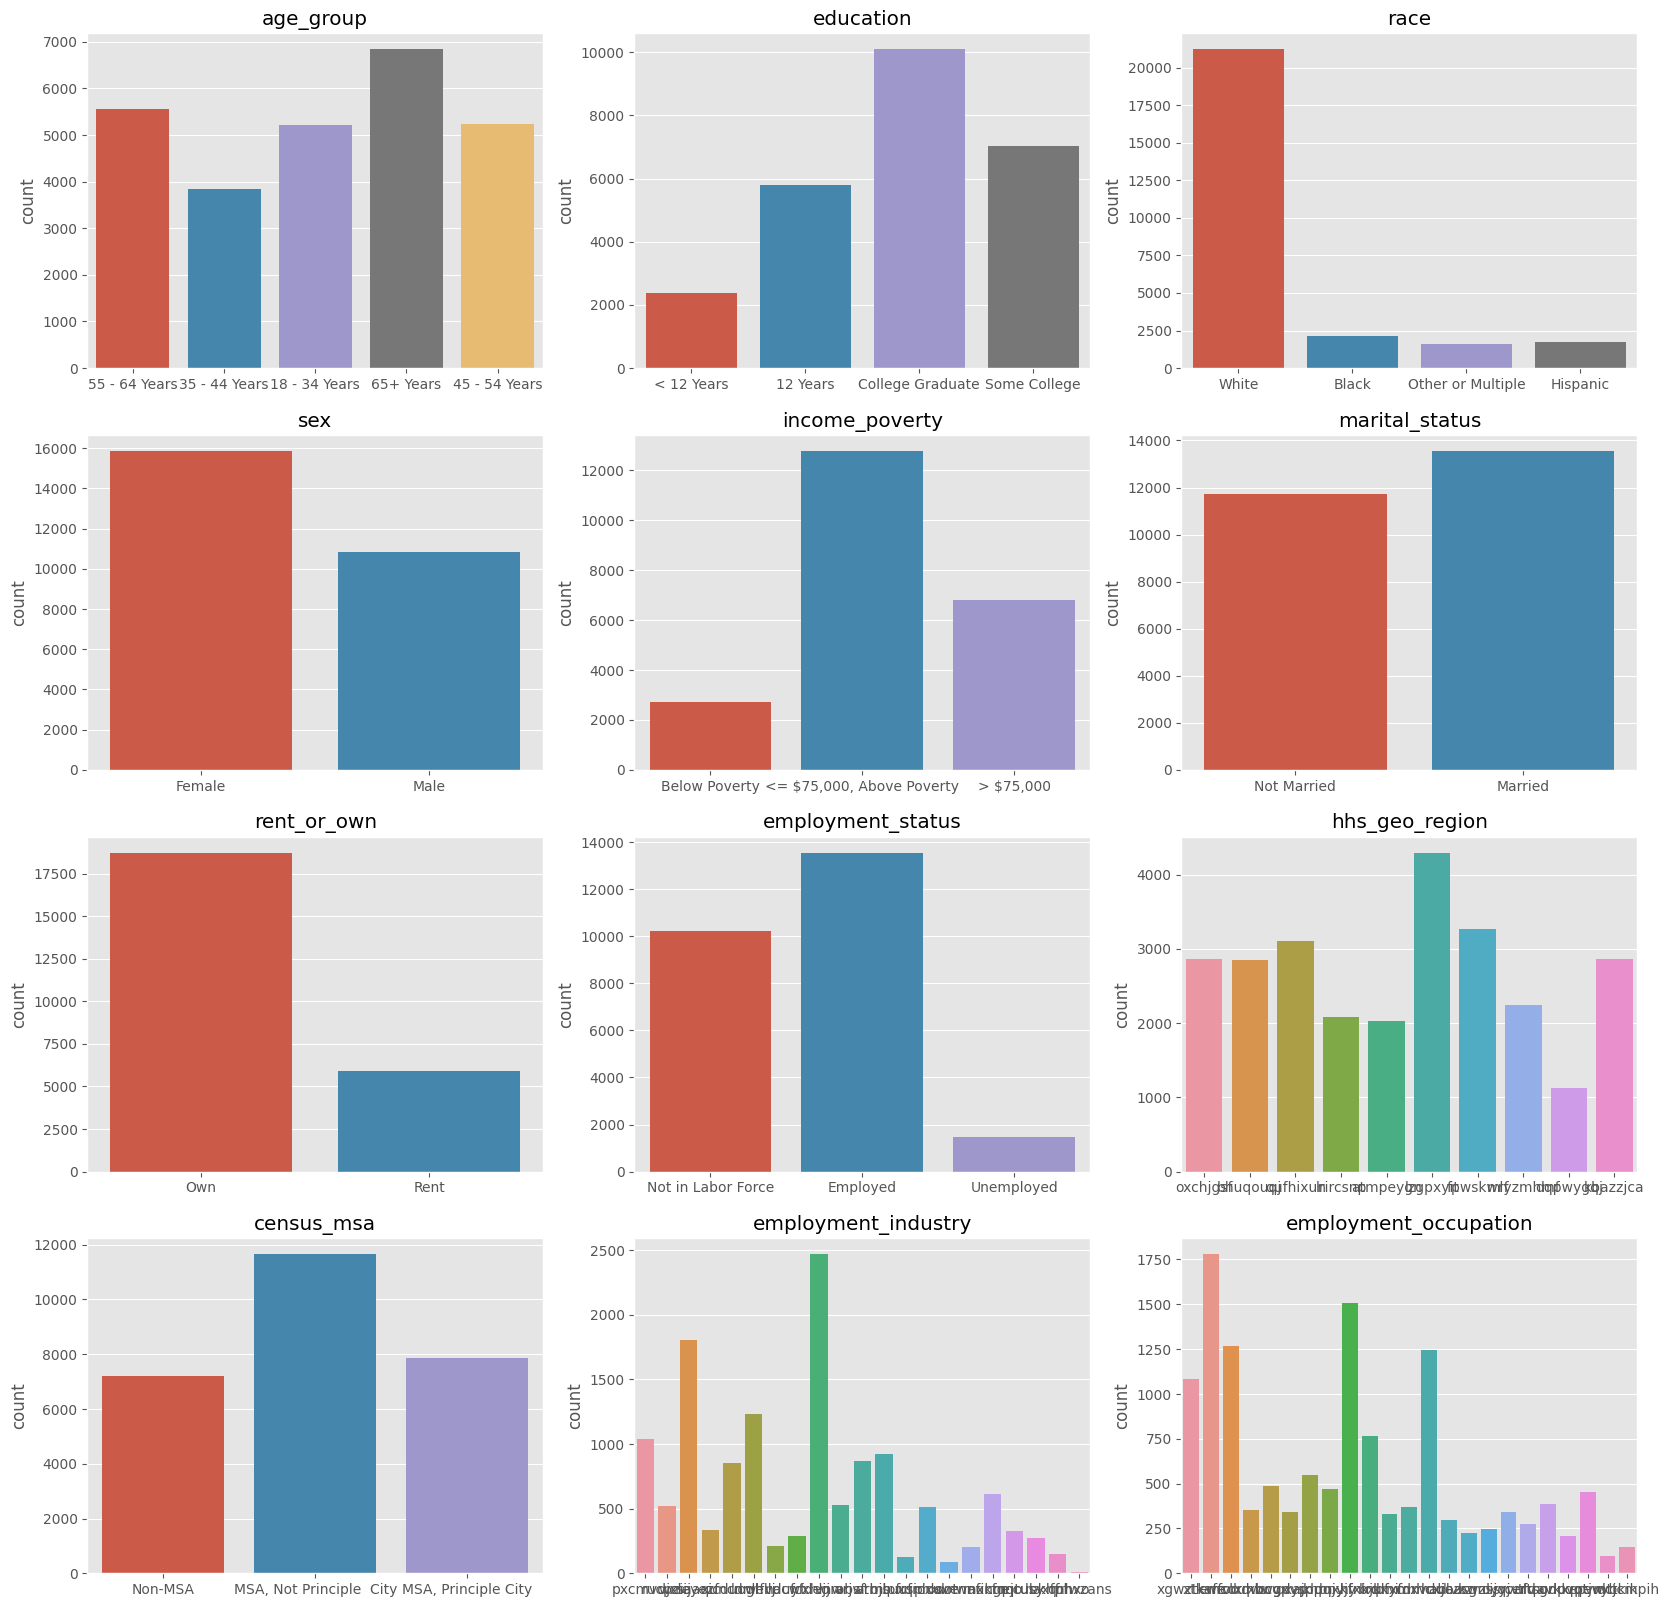

In [ ]:
# Visualisasi features kategorik
categorical = train.select_dtypes(include = "object").columns
fig, ax = plt.subplots(4, 3, figsize = (20, 20))
ax = ax.flatten()
for i, j in enumerate(categorical):
  g = sns.countplot(x = train[j], ax = ax[i])
  g.set_title(j)
  g.set_xlabel("");

Setelah dilakukan univariate analysis pada feature kategorik didapat bahwa,
- Mayoritas responden berumur pada usia diatas 65 tahun.
- Mayoritas responden adalah berpendidikan sarjana.
- Mayoritas responden adalah ras kulit putih.
- Mayoritas responden memiliki rumah sendiri.
- Mayoritas responden adalah wanita.
- Mayoritas pendapatan responden ada pada kelas menengah.
- Mayoritas responden sudah menikah
- Mayoritas responden berasal dari daerah MSA (Metropolitan Statistical Area) bukan kota besar.
- Responden berasal dari tipe industri dan pekerjaan yang beragam yang tidak bisa disebutkan.

## 2. Bivariate Analysis
Pada bivariate analysis kita melakukan analisis terhadap hubungan antar feature terutama feature dengan target yaitu h1n1_vaccine dan seasonal_vaccine untuk mengetahui hubungan serta interaksi antar feature dan target. Selain secara visual, kita juga akan melakukan uji statistik chi2 untuk mengetahui dan menjustifikasi kebenaran dari perbedaan yang terlihat antar kelas dengan hubungannya dengan target.

In [ ]:
# Membuat fungsi plot proporsi
def plot_prop(col, target, data, ax = None):
  counts = data[[col, target]].groupby([col, target]).size().unstack()
  column_counts = counts.sum(axis = "columns")
  props = counts.div(column_counts, axis = "index")
  props.plot(kind = "barh", stacked = True, ax = ax)
  ax.set_title(col)
  ax.set_ylabel("")
  ax.invert_yaxis()
  ax.legend().remove()

In [ ]:
# Membuat fungsi untuk membuat tabel kontingensi dan melakukan uji staistik chi2
def uji_chi2(feature1, feature2, df):
  iya_vaksin = df.groupby(feature1)[feature2].sum()
  tidak_vaksin = (df.groupby(feature1)[feature2].count() - df.groupby(feature1)[feature2].sum())
  data = pd.DataFrame({"iya_vaksin":iya_vaksin, "tidak_vaksin":tidak_vaksin})
  stat, p, dof, expected = chi2_contingency(data)
  alpha = 0.05
  print("p-value adalah " + str(p))
  if p <= alpha:
    print('terdapat perbedaan antar kelas')
  else:
    print('tidak terdapat perbedaan antar kelas')

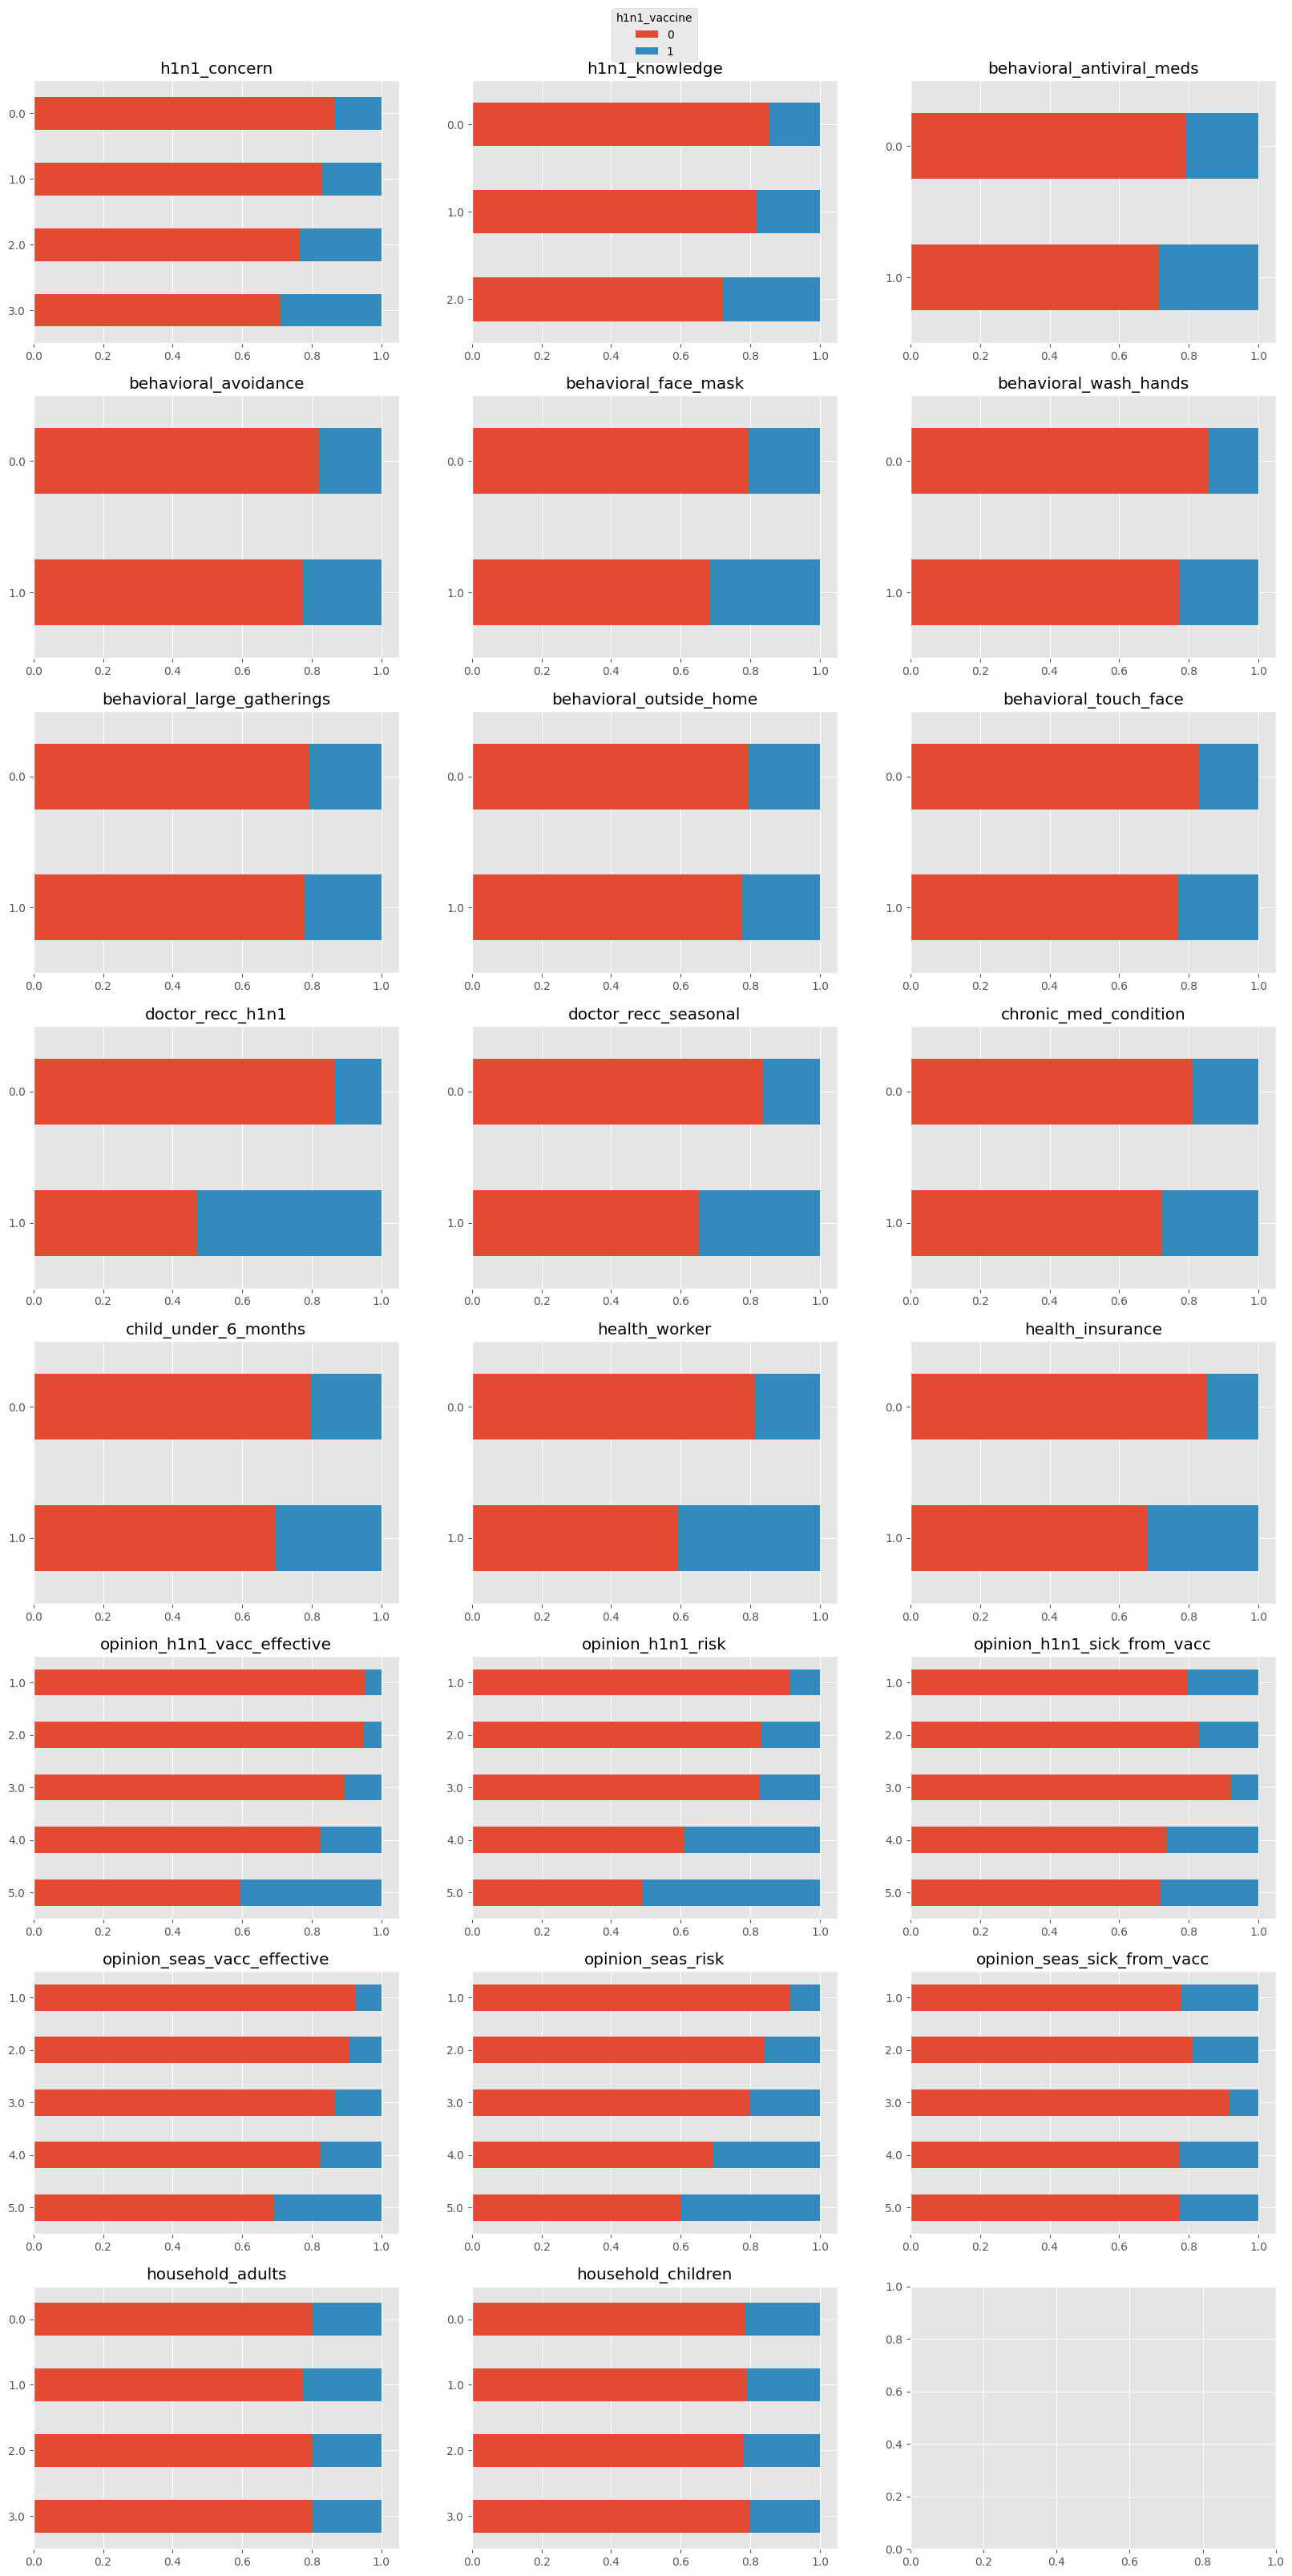

In [ ]:
# Membuat plot proporsi untuk semua features numerik dengan target h1n1_vaccine
fig, ax = plt.subplots(8, 3, figsize = (20, 40))
ax = ax.flatten()
for i, j in enumerate(numerical):
  plot_prop(j, "h1n1_vaccine", train, ax = ax[i])
  ax[1].legend(loc = 'lower center', bbox_to_anchor = (0.5, 1.05), title = 'h1n1_vaccine')

In [ ]:
# Melakukan uji chi2 pada feature numerik dengan h1n1_vaccine
for i in numerical:
  print(str(i))
  uji_chi2(i, "h1n1_vaccine", train)
  print("=========================")

h1n1_concern
p-value adalah 1.091884581401304e-86
terdapat perbedaan antar kelas
h1n1_knowledge
p-value adalah 8.631658183103519e-87
terdapat perbedaan antar kelas
behavioral_antiviral_meds
p-value adalah 4.31999492451175e-11
terdapat perbedaan antar kelas
behavioral_avoidance
p-value adalah 9.454102015406327e-15
terdapat perbedaan antar kelas
behavioral_face_mask
p-value adalah 1.528631890936478e-30
terdapat perbedaan antar kelas
behavioral_wash_hands
p-value adalah 3.954446517160519e-34
terdapat perbedaan antar kelas
behavioral_large_gatherings
p-value adalah 0.0038265118607610023
terdapat perbedaan antar kelas
behavioral_outside_home
p-value adalah 0.0004060957454265892
terdapat perbedaan antar kelas
behavioral_touch_face
p-value adalah 1.9294852156987267e-31
terdapat perbedaan antar kelas
doctor_recc_h1n1
p-value adalah 0.0
terdapat perbedaan antar kelas
doctor_recc_seasonal
p-value adalah 7.176677930421913e-237
terdapat perbedaan antar kelas
chronic_med_condition
p-value adalah 1.

Dari plot proporsi feature numerik dan uji chi2
dengan hubungannya dengan kemungkinan vaksin H1N1 didapatkan bahwa,
- Semakin efektif vaksin H1N1 dan Seasonal menurut pendapat responden maka semakin besar peluang menerima vaksin H1N1.
- Semakin tinggi tingkat resiko virus H1N1 dan Seasonal menurut pendapat responden semakin besar peluang menerima vaksin H1N1.
- Tingkat kekhawatiran akan sakit pasca menerima vaksin H1N1 dan Seasonal sedikit berpengaruh pada peluang menerima vaksin H1N1.
- Responden yang mendapat rekomendasi dari dokter untuk vaksin H1N1 dan Seasonal memiliki peluang besar menerima vaksin H1N1.
- Responden yang memiliki kontak dengan anak berumur dibawah 6 bulan memiliki kemungkinan besar untuk vaksin H1N1 dibandingkan yang tidak
- Responden yang memiliki kebiasaan menghindari kerumunan, memakai masker, tidak bepergian, menjaga jarak, tidak memegang muka, dan rajin mencuci tangan memiliki peluang besar untuk vaksin H1N1
- Responden yang menerima medikasi antiviral memiliki kecendrungan untuk vaksin H1N1.

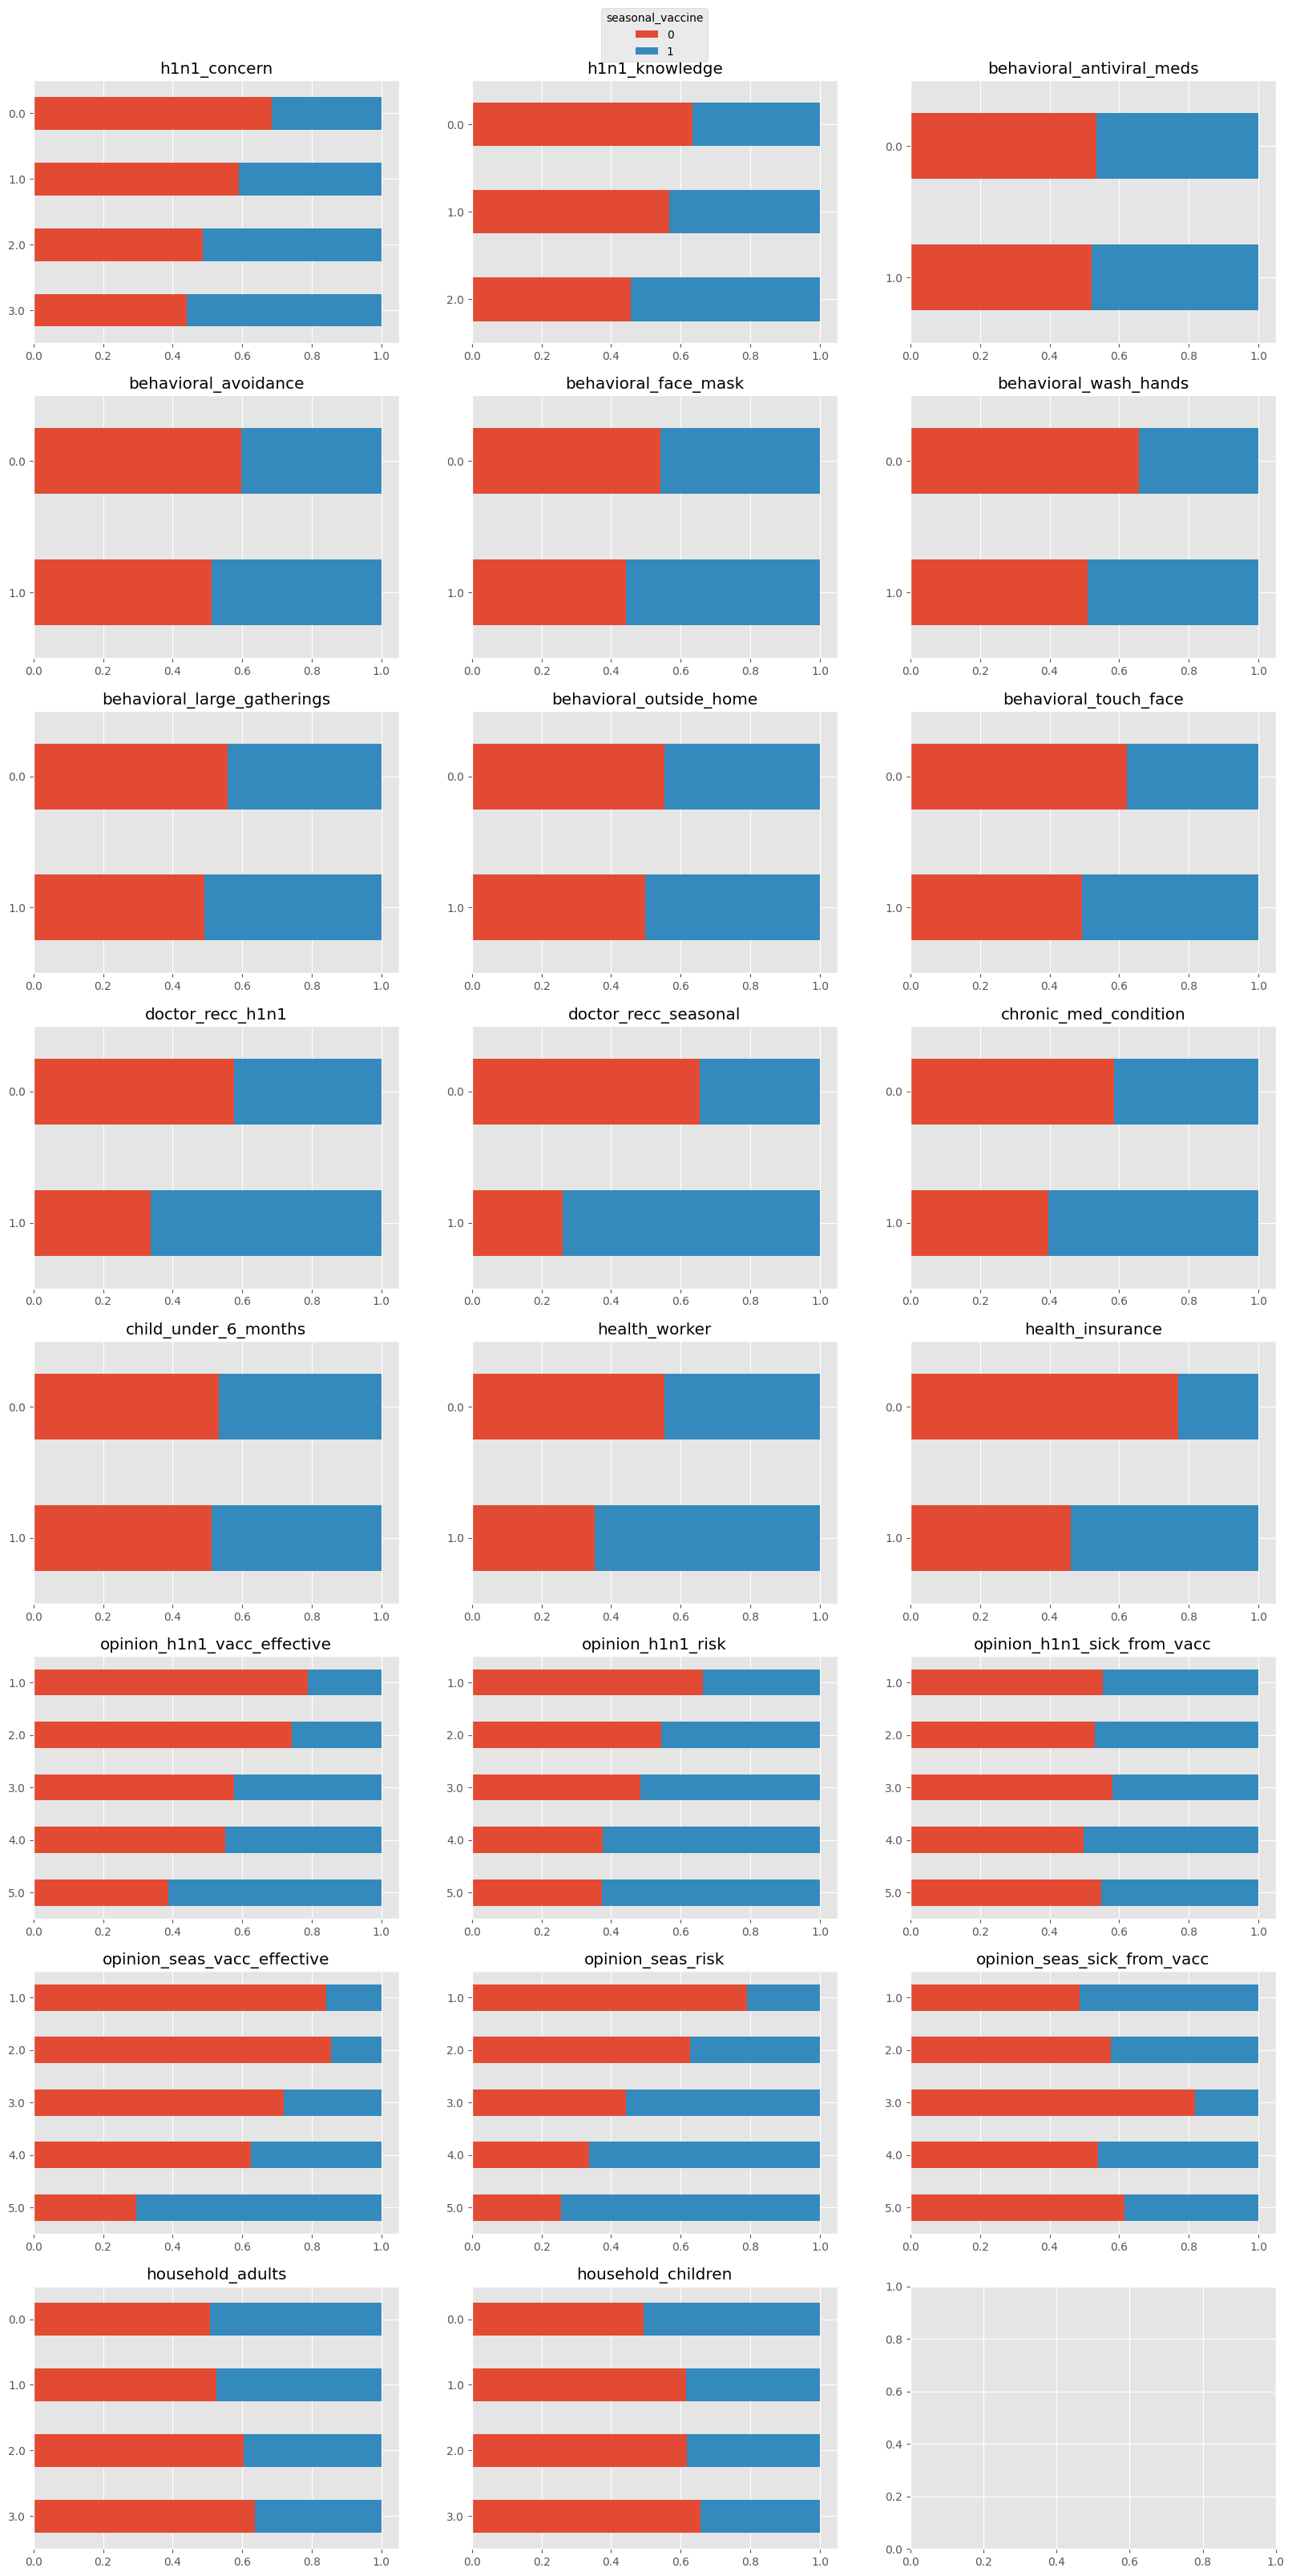

In [ ]:
# Membuat plot proporsi untuk semua features numerik dengan target seasonal_vaccine
fig, ax = plt.subplots(8, 3, figsize = (20, 40))
ax = ax.flatten()
for i, j in enumerate(numerical):
  plot_prop(j, "seasonal_vaccine", train, ax = ax[i])
  ax[1].legend(loc = 'lower center', bbox_to_anchor = (0.5, 1.05), title = 'seasonal_vaccine')

In [ ]:
# Melakukan uji chi2 pada feature numerik dengan seasonal_vaccine
for i in numerical:
  print(str(i))
  uji_chi2(i, "seasonal_vaccine", train)
  print("=========================")

h1n1_concern
p-value adalah 4.102289002153701e-143
terdapat perbedaan antar kelas
h1n1_knowledge
p-value adalah 2.2158145679676294e-86
terdapat perbedaan antar kelas
behavioral_antiviral_meds
p-value adalah 0.31930737413096955
tidak terdapat perbedaan antar kelas
behavioral_avoidance
p-value adalah 1.9793604049624267e-35
terdapat perbedaan antar kelas
behavioral_face_mask
p-value adalah 3.415990952870009e-16
terdapat perbedaan antar kelas
behavioral_wash_hands
p-value adalah 3.937683884830785e-75
terdapat perbedaan antar kelas
behavioral_large_gatherings
p-value adalah 1.7467443061198658e-25
terdapat perbedaan antar kelas
behavioral_outside_home
p-value adalah 2.8288269686990283e-18
terdapat perbedaan antar kelas
behavioral_touch_face
p-value adalah 1.9716795819501424e-85
terdapat perbedaan antar kelas
doctor_recc_h1n1
p-value adalah 2.310440158560717e-212
terdapat perbedaan antar kelas
doctor_recc_seasonal
p-value adalah 0.0
terdapat perbedaan antar kelas
chronic_med_condition
p-value

Dari plot proporsi feature numerik dan uji chi2 dengan hubungannya dengan kemungkinan vaksin Seasonal diperoleh bahwa:
- Semakin efektif vaksin H1N1 dan Seasonal menurut pendapat responden maka semakin besar peluang menerima vaksin Seasonal.
- Semakin tinggi tingkat resiko virus H1N1 dan Seasonal menurut pendapat responden semakin besar peluang menerima vaksin Seasonal.
- Tingkat kekhawatiran akan sakit setelah menerima vaksin H1N1 dan Seasonal memiliki sedikit pengaruh pada peluang menerima vaksin Seasonal.
- Responden yang mendapat rekomendasi dari dokter untuk vaksin H1N1 dan Seasonal memiliki peluang besar menerima vaksin Seasonal.
- Responden yang memiliki kebiasaan menghindari kerumunan, mengenakan masker, tidak bepergian, menjaga jarak, tidak memegang muka, dan rajin mencuci tangan memiliki peluang besar untuk vaksin Seasonal.
- Terdapat sedikit perbedaan peluang vaksinasi Seasonal dengan dan tanpa medikasi antiviral.

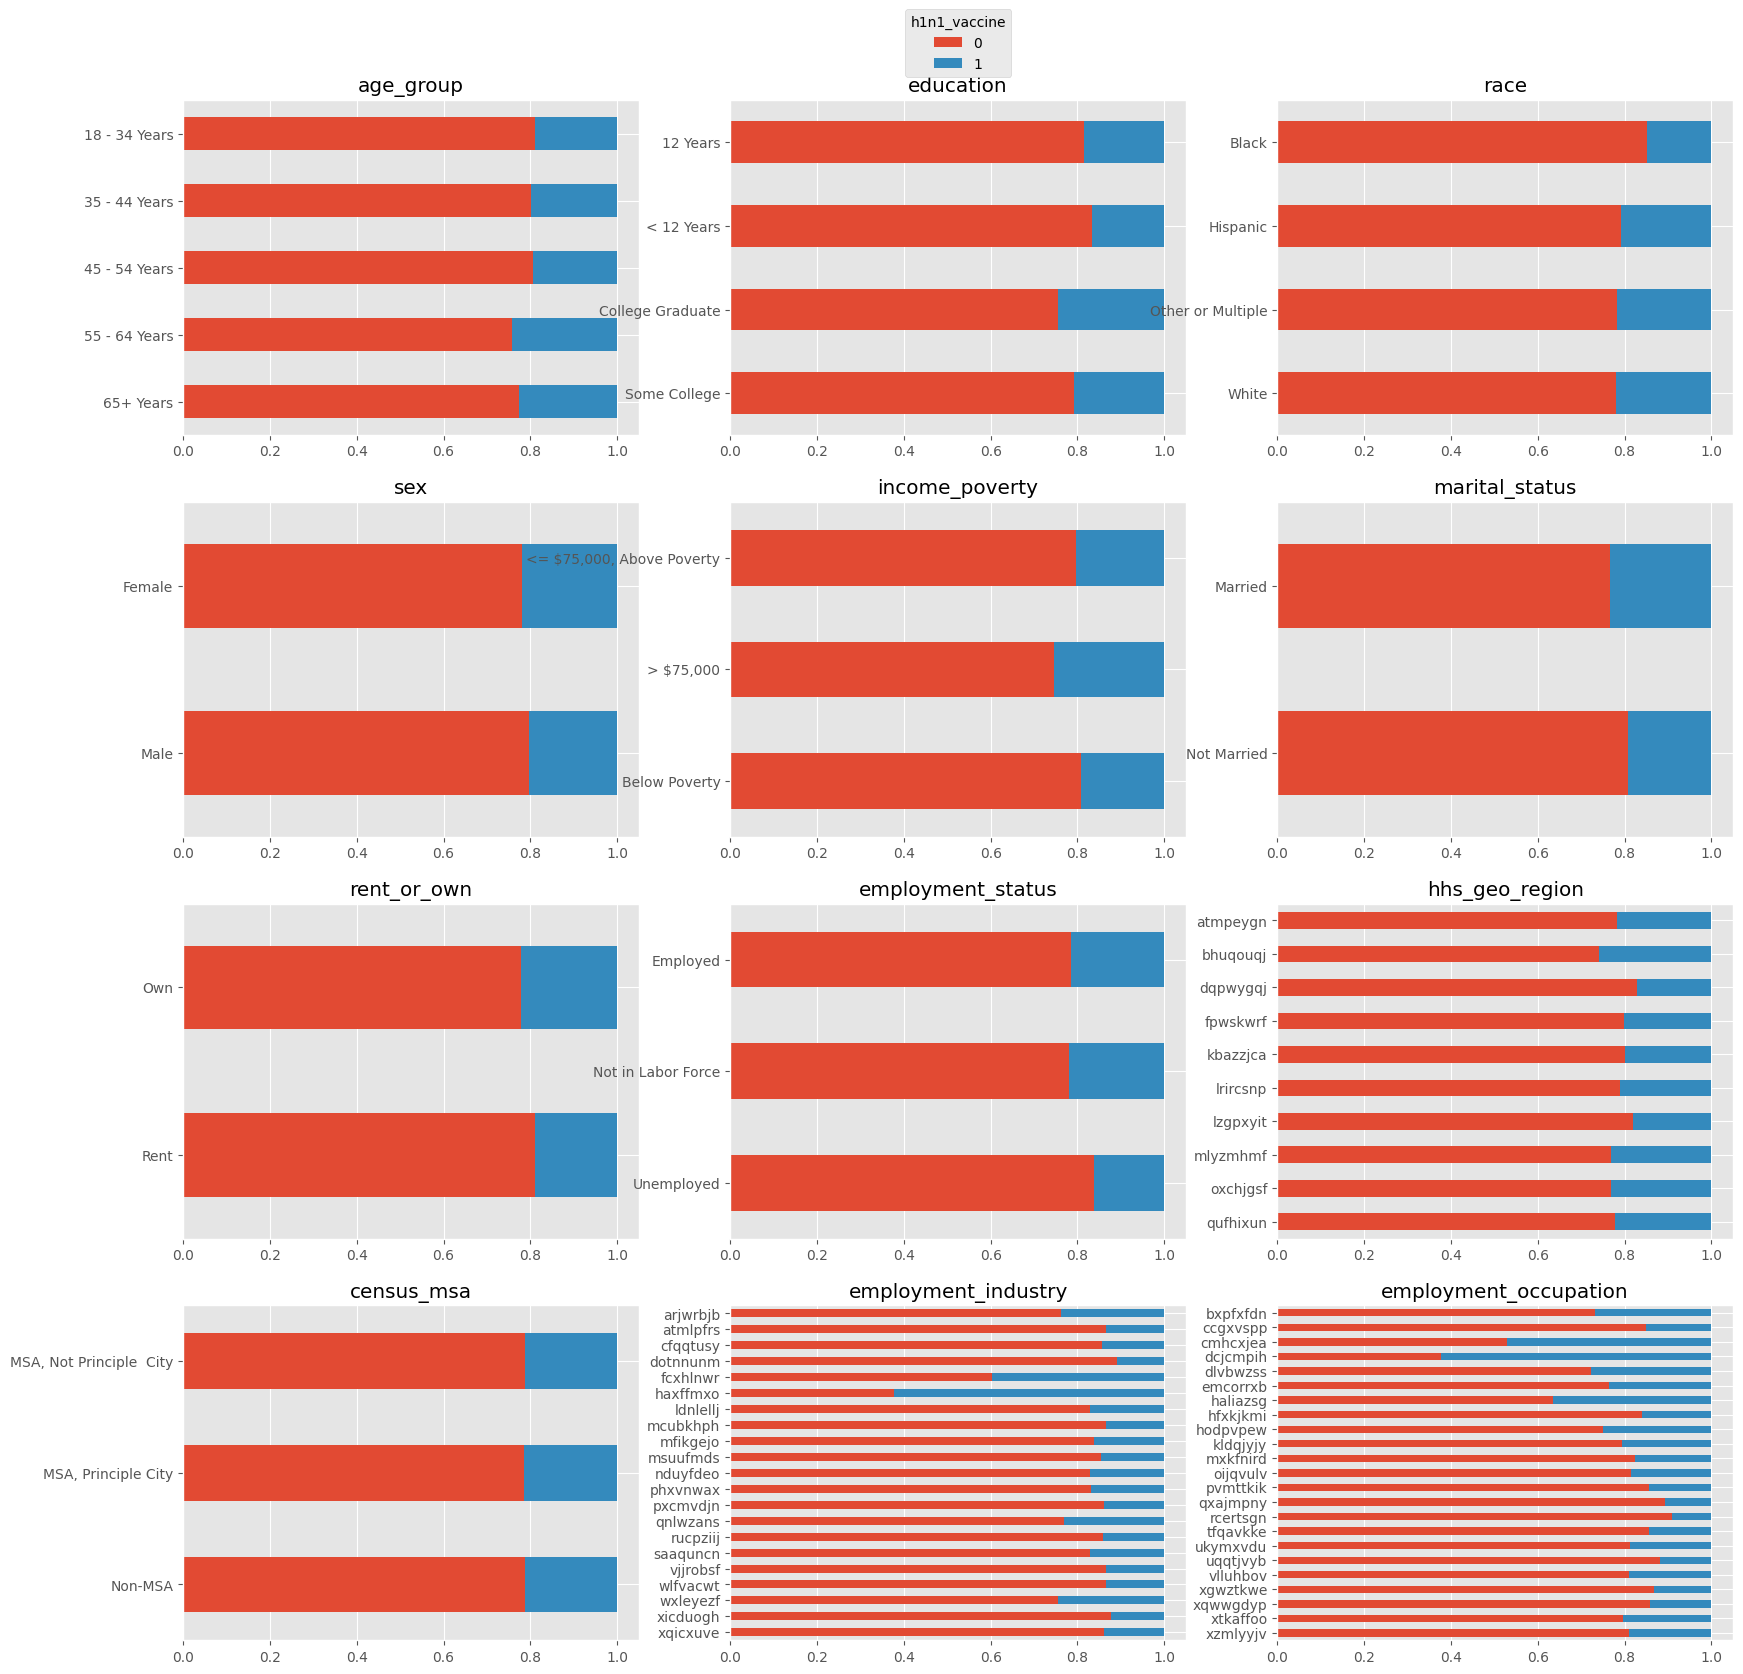

In [ ]:
# Membuat plot proporsi untuk semua features kategorik dengan target h1n1_vaccine
fig, ax = plt.subplots(4, 3, figsize = (20, 20))
ax = ax.flatten()
for i, j in enumerate(categorical):
  plot_prop(j, "h1n1_vaccine", train, ax = ax[i])
  ax[1].legend(loc = 'lower center', bbox_to_anchor = (0.5, 1.05), title = 'h1n1_vaccine')

In [ ]:
# Melakukan uji chi2 pada feature kategorik dengan h1n1_vaccine
for i in categorical:
  print(str(i))
  uji_chi2(i, "h1n1_vaccine", train)
  print("=========================")

age_group
p-value adalah 2.9716028185463074e-14
terdapat perbedaan antar kelas
education
p-value adalah 1.7064066491282076e-26
terdapat perbedaan antar kelas
race
p-value adalah 2.5557770361705444e-12
terdapat perbedaan antar kelas
sex
p-value adalah 0.0007709155489949327
terdapat perbedaan antar kelas
income_poverty
p-value adalah 2.711954833043555e-17
terdapat perbedaan antar kelas
marital_status
p-value adalah 4.2770179149924085e-16
terdapat perbedaan antar kelas
rent_or_own
p-value adalah 5.8921655520476926e-08
terdapat perbedaan antar kelas
employment_status
p-value adalah 5.472123171178154e-06
terdapat perbedaan antar kelas
hhs_geo_region
p-value adalah 5.188915771656634e-16
terdapat perbedaan antar kelas
census_msa
p-value adalah 0.9445419806029446
tidak terdapat perbedaan antar kelas
employment_industry
p-value adalah 5.786809398555022e-175
terdapat perbedaan antar kelas
employment_occupation
p-value adalah 2.0218813117696274e-172
terdapat perbedaan antar kelas


Setelah dilakukan bivariate analysis pada feature kategorik dan uji chi2 dengan hubungannya dengan vaksinasi H1N1 didapatkan bahwa,
- Terdapat sedikit perbedaan kemungkinan vaksinasi H1N1 untuk semua kelas umur.
- Semakin tinggi tingkat pendidikan responden maka semakin besar kemungkinan vaksinasi H1N1 terlihat dari jumlah vaksinasi H1N1 responden yang sudah lulus kuliah ataupun sedang kuliah yang lebih besar dari yang pendidikan hanya 12 tahun ataupun yang lebih kecil.
- Ras selain kulit hitam memiliki peluang vaksinasi H1N1 yang lebih besar
- Terdapat sedikit perbedaan kemungkinan vaksinasi H1N1 baik untuk laki-laki ataupun perempuan.
- Semakin tinggi tingkat pendapatan responden maka semakin besar kemungkinan vaksinasi H1N1.
- Responden yang sudah menikah memiliki kemungkinan vaksinasi H1N1 dari yang belum menikah.
- Responden yang tidak merupakan tenaga kerja dan yang memiliki perkerjaan memiliki kemungkinan lebih besar untuk vaksinasi H1N1 dibandingkan yang tidak memiliki pekerjaan.
- Terdapat sedikit perbedaan untuk jumlah vaksinasi H1N1 antara masing-masing daerah tempat responden berdomisili. Hal ini juga berhubungan dengan census MSA ataupun Metropolitan Statistical Area, dimana yang termasuk daerah MSA dan yang bukan memiliki kemungkinan vaksinasi H1N1 yang sama.
- Industri tempat kerja dan jenis pekerjaan responden secara umum berhubungan dengan kemungkinan vaksinasi H1N1.



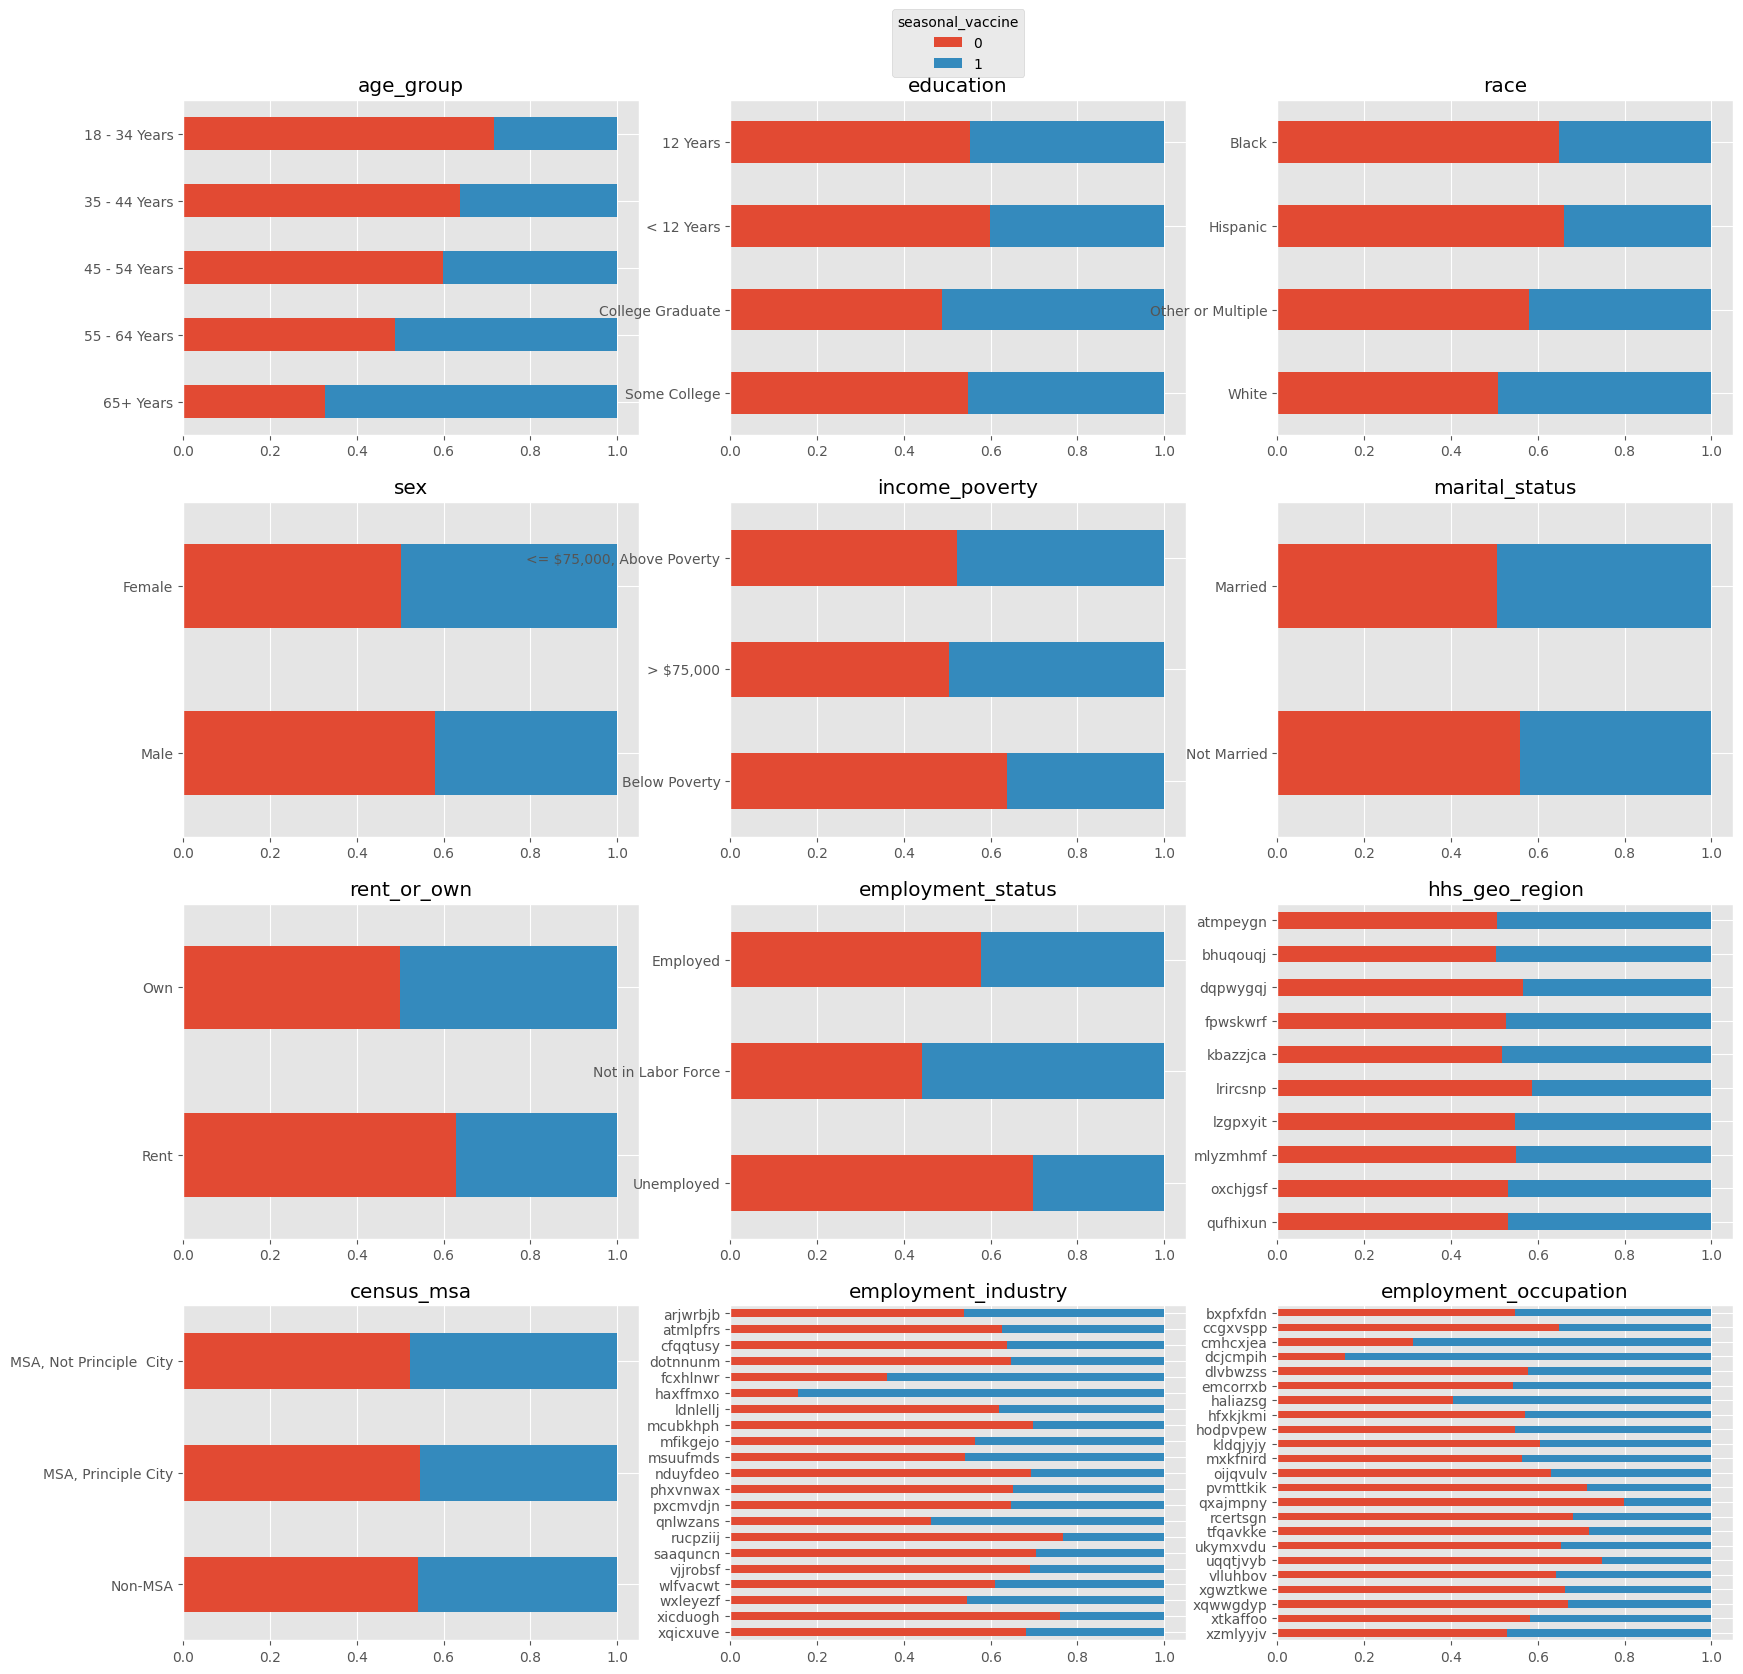

In [ ]:
# Membuat plot proporsi untuk semua features kategorik dengan target seasonal_vaccine
fig, ax = plt.subplots(4, 3, figsize = (20, 20))
ax = ax.flatten()
for i, j in enumerate(categorical):
  plot_prop(j, "seasonal_vaccine", train, ax = ax[i])
  ax[1].legend(loc = 'lower center', bbox_to_anchor = (0.5, 1.05), title = 'seasonal_vaccine')

In [ ]:
# Melakukan uji chi2 pada feature kategorik dengan seasonal_vaccine
for i in categorical:
  print(str(i))
  uji_chi2(i, "seasonal_vaccine", train)
  print("=========================")

age_group
p-value adalah 0.0
terdapat perbedaan antar kelas
education
p-value adalah 4.885885372081626e-29
terdapat perbedaan antar kelas
race
p-value adalah 1.3781023743020242e-63
terdapat perbedaan antar kelas
sex
p-value adalah 2.5248076319253385e-36
terdapat perbedaan antar kelas
income_poverty
p-value adalah 1.4060030757907673e-32
terdapat perbedaan antar kelas
marital_status
p-value adalah 8.515118825013364e-17
terdapat perbedaan antar kelas
rent_or_own
p-value adalah 1.628502794706891e-68
terdapat perbedaan antar kelas
employment_status
p-value adalah 1.0933141469852619e-132
terdapat perbedaan antar kelas
hhs_geo_region
p-value adalah 2.692066467272643e-08
terdapat perbedaan antar kelas
census_msa
p-value adalah 0.001156859675595932
terdapat perbedaan antar kelas
employment_industry
p-value adalah 6.730164852718281e-186
terdapat perbedaan antar kelas
employment_occupation
p-value adalah 6.134493811118927e-157
terdapat perbedaan antar kelas


Setelah dilakukan bivariate analysis pada feature kategorik dan uji chi2 dengan hubungannya dengan vaksinasi Seasonal didapatkan bahwa,
- Semakin tua responden maka kemungkinan vaksinasi Seasonal lebih besar terlihat bahwa responden dengan umur 65+ tahun hampir 70% melakukan vaksinasi Seasonal.
- Terdapat perbedaan antara kemungkinan vaksinasi Seasonal dengan tingkat pendidikan responden dimana responden sarjana dan sedang kuliah lebih besar daripada yang tidak.
- Responden dengan ras kulit putih memiliki kemungkinan vaksinasi Seasonal yang lebih besar daripada yang bukan.
- Responden perempuan memiliki kemungkinan vaksinasi Seasonal yang lebih besar daripada laki-laki.
- Semakin tinggi tingkat pendapatan responden maka semakin besar kemungkinan vaksinasi Seasonal.
- Responden yang sudah menikah memiliki kemungkinan vaksinasi Seasonal yang lebih besar daripada yang belum menikah.
- Responden yang memiliki rumah memiliki kemungkinan vaksinasi Seasonal yang lebih besar daripada yang tidak memiliki atau menyewa.
- Responden yang bukan merupakan tenaga kerja memiliki kemungkinan vaksinasi Seasonal yang lebih besar daripada yang memiliki dan tidak memiliki pekerjaan.
- Terdapat sedikit perbedaan  untuk jumlah vaksinasi Seasonal antara masing-masing daerah tempat responden berdomisili. Hal yang sama untuk census MSA, dimana yang termasuk daerah MSA dan yang bukan memiliki kemungkinan vaksinasi Seasonal yang sedikit berbeda.
- Tipe industri tempat kerja dan jenis pekerjaan responden secara umum berhubungan dengan kemungkinan vaksinasi Seasonal.

Dari bivariate analysis antara feature kategorik dengan masing-masing label yaitu vaksinasi H1N1 dan vaksinasi Seasonal dapat kita bandingkan dan simpulkan sebagai berikut,
- Vaksinasi H1N1 memiliki kemungkinan atau peluang yang sama untuk semua umur terutama lansia atau responden yang berusia 65+ tahun berbeda dengan vaksinasi Seasonal. Berdasarkan CDC, pada umumnya seiring bertambahnya umur sistem imunitas tubuh manusia menurun sehingga kemungkinan komplikasi akibat flu menjadi besar terutama pada lansia. Hal ini yang kemudian menganjurkan lansia melakukan vaksinasi. Vaksinnya pun khusus, berbeda dengan umur grup yang lain. Namun untuk virus H1N1, terdapat perbedaan. Secara natural hampir 1/3 dari total lansia telah memiliki antibodi khusus guna melawan virus H1N1 ini yang tidak dimiliki oleh manusia di age group dibawahnya. Hal ini menarik sehingga virus H1N1 lebih rentan menyerang manusia paruh baya dengan umur 45-64 tahun.
- Tingkat pendidikan seseorang memang berpengaruh pada kemungkinan vaksinasi baik H1N1 maupun Seasonal. Hal ini kemungkinan karena lebih berpengetahuan ataupun berhubungan dengan confounding variabel yang lain seperti jika tingkat pendidikan rendah kemungkinan besar unemployed ataupun employed tetapi dengan pendapatan masih pada kelas poverty.
- Pada kedua vaksinasi, dapat dilihat bahwa ras kulit putih memiliki kemungkinan vaksin yang lebih besar dibandingkan dengan ras yang lain. Hal ini memang benar adanya dimana ras atau etnis minoritas mendapat akses layanan kesehatan yang terbatas, tidak adanya asuransi, misinformasi tentang vaksinasi dan masih banyak lagi. Hal ini kemudia menjadikan orang selain ras kulit putih lebih rentan terhadap flu beberapa kali lipat.
- Jenis kelamin perempuan memiliki kemungkinan yang sedikit besar untuk vaksinasi baik H1N1 ataupun Seasonal sebab terdapat kemungkinan sedang mengandung dimana pada saat itu, perempuan menjadi lebih rentan terhadap komplikasi ketika terkena flu.
- Pendapatan jelas mempengaruhi kemampuan melakukan vaksinasi baik H1N1 ataupun Seasonal karena seperti kita ketahui vaksinasi memang membutuhkan biaya. Hal ini juga menjelaskan mengapa orang yang berasuransi memiliki kemampuan vaksin yang besar pula dibandingkan yang tidak.
- Pasangan yang sudah menikah memiliki kemungkinan besar untuk vaksinasi yang berhubungan dengan kepala keluarga yang memiliki pekerjaan sehingga berpendapatan dan istrinya termasuk dalam non-labour force yang menjadi faktor pendukung.
- Kemungkinan vaksinasi H1N1 dan Seasonal yang tidak cukup merata untuk semua daerah baik yang termasuk MSA dan yang bukan. Hal ini berarti terdapat daerah yang diutamakan atau spesial sehingga tidak semua orang mendapat kesempatan yang sama untuk vaksinasi H1N1 dan seasonal.
- Jenis Industri dan tipe pekerjaan responden memiliki persebaran kemungkinan vaksinasi H1N1 dan Seasonal yang cukup berbeda terlihat terdapat tipe industri dan pekerjaan tertentu yang tingkat vaksinasinya jauh lebih tinggi dari yang lain.

In [ ]:
# Membuat correlation matrix dengan metric pearson correlation untuk menyelidiki hubungan antar features
train.corr().style.background_gradient()

<ipython-input-52-cc46ef2075e0>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train.corr().style.background_gradient()


In [ ]:
# Mengambil 10 feature yang paling berpengaruh terhadap h1n1_vaccine dengan exclude h1n1_vaccine
pd.DataFrame(train.corr().iloc[:, -2].sort_values(ascending = False).nlargest(11))

<ipython-input-53-b4e6ed9e5d59>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  pd.DataFrame(train.corr().iloc[:, -2].sort_values(ascending = False).nlargest(11))


h1n1_vaccine
h1n1_vaccine                     1.000000
doctor_recc_h1n1                 0.393890
seasonal_vaccine                 0.377143
opinion_h1n1_risk                0.323265
opinion_h1n1_vacc_effective      0.269347
opinion_seas_risk                0.258571
doctor_recc_seasonal             0.209864
opinion_seas_vacc_effective      0.179272
health_worker                    0.169768
h1n1_concern                     0.121929
health_insurance                 0.121170

In [ ]:
# Mengambil 10 feature yang paling berpengaruh terhadap seasonal_vaccine dengan exclude seasonal_vaccine
pd.DataFrame(train.corr().iloc[:, -1].sort_values(ascending = False).nlargest(11))

<ipython-input-54-2af9e02ed5cc>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  pd.DataFrame(train.corr().iloc[:, -1].sort_values(ascending = False).nlargest(11))


seasonal_vaccine
seasonal_vaccine                     1.000000
opinion_seas_risk                    0.390106
h1n1_vaccine                         0.377143
doctor_recc_seasonal                 0.369190
opinion_seas_vacc_effective          0.361875
opinion_h1n1_risk                    0.216625
opinion_h1n1_vacc_effective          0.205072
health_insurance                     0.200858
doctor_recc_h1n1                     0.198607
chronic_med_condition                0.170174
h1n1_concern                         0.154828

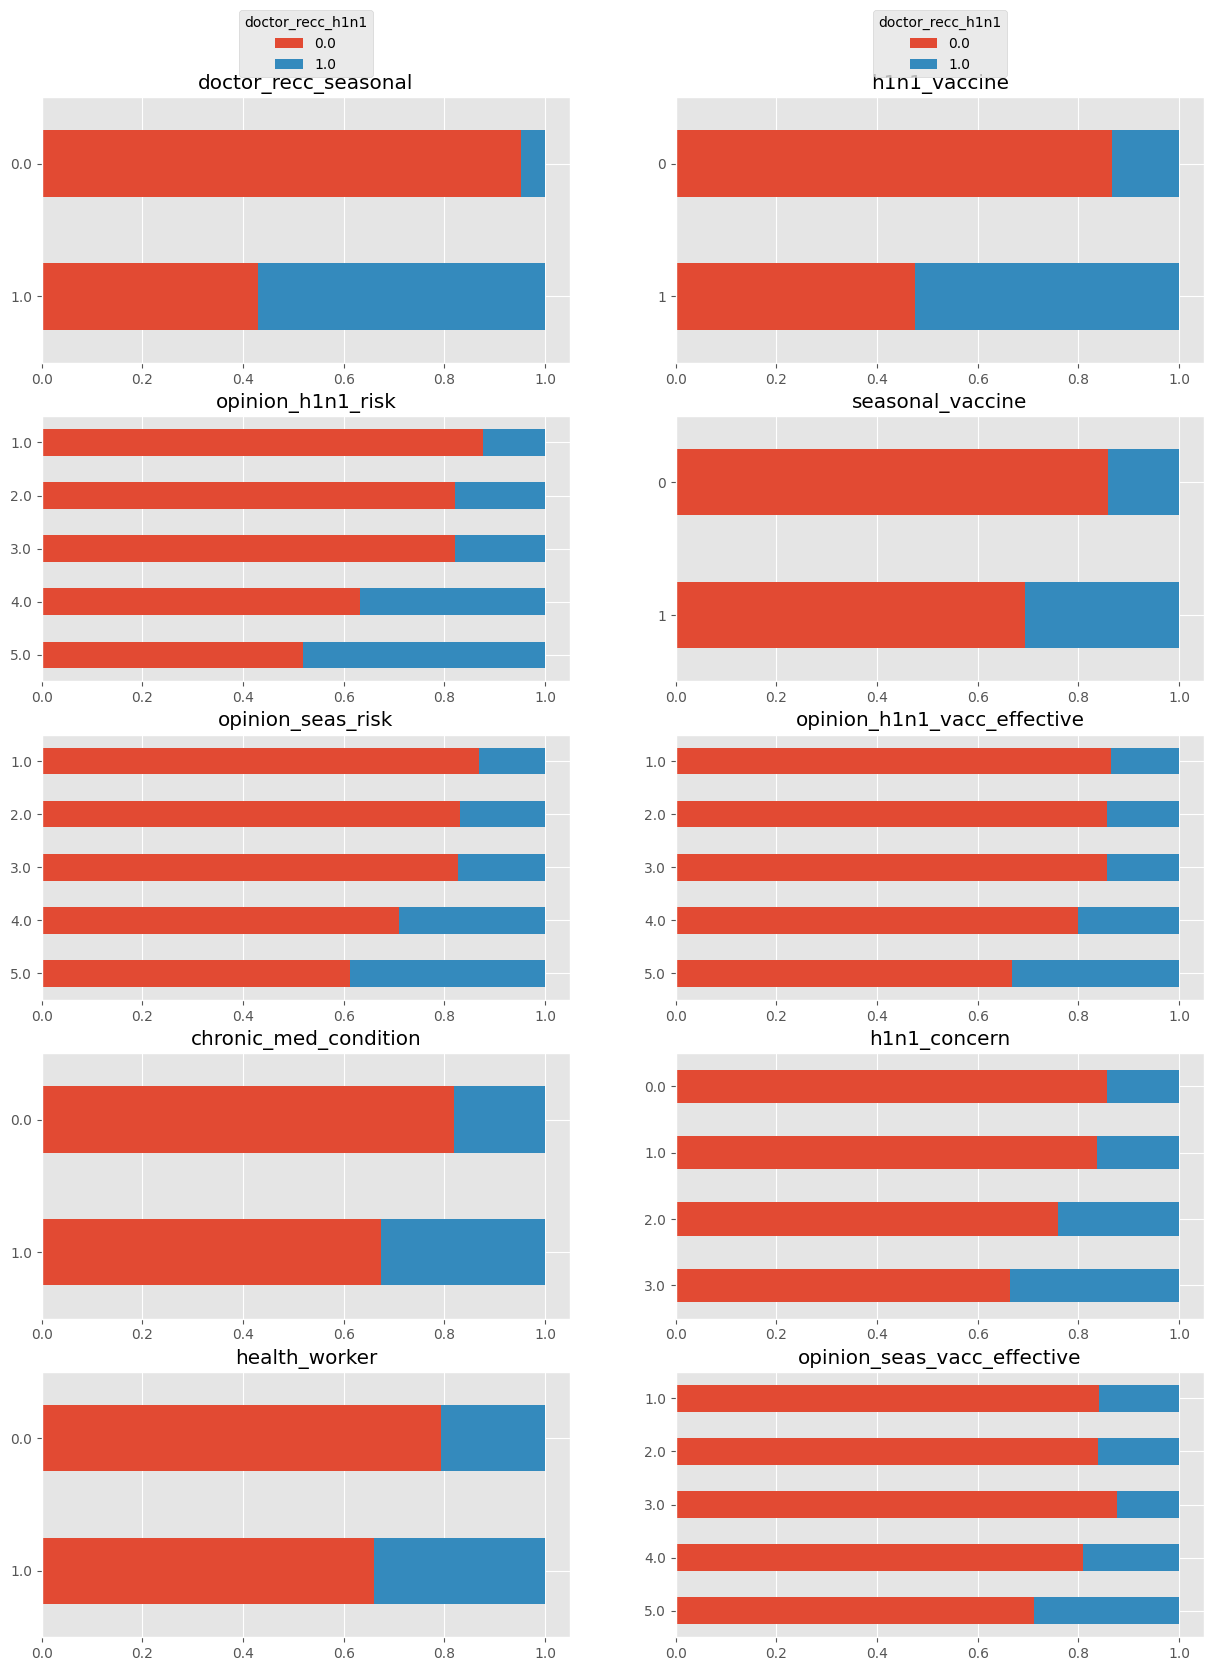

In [ ]:
# Pengaruh rekomendasi dokter untuk vaksin h1n1 dengan features lain
col1 = ['doctor_recc_seasonal', 'h1n1_vaccine',
       'opinion_h1n1_risk', 'seasonal_vaccine', 'opinion_seas_risk',
       'opinion_h1n1_vacc_effective', 'chronic_med_condition', 'h1n1_concern',
       'health_worker', 'opinion_seas_vacc_effective']
fig, ax = plt.subplots(5, 2, figsize = (15, 20))
ax = ax.flatten()
for i, j in enumerate(col1):
  plot_prop(j, "doctor_recc_h1n1", train, ax = ax[i])
  ax[0].legend(loc = 'lower center', bbox_to_anchor = (0.5, 1.05), title = 'doctor_recc_h1n1')
  ax[1].legend(loc = 'lower center', bbox_to_anchor = (0.5, 1.05), title = 'doctor_recc_h1n1')

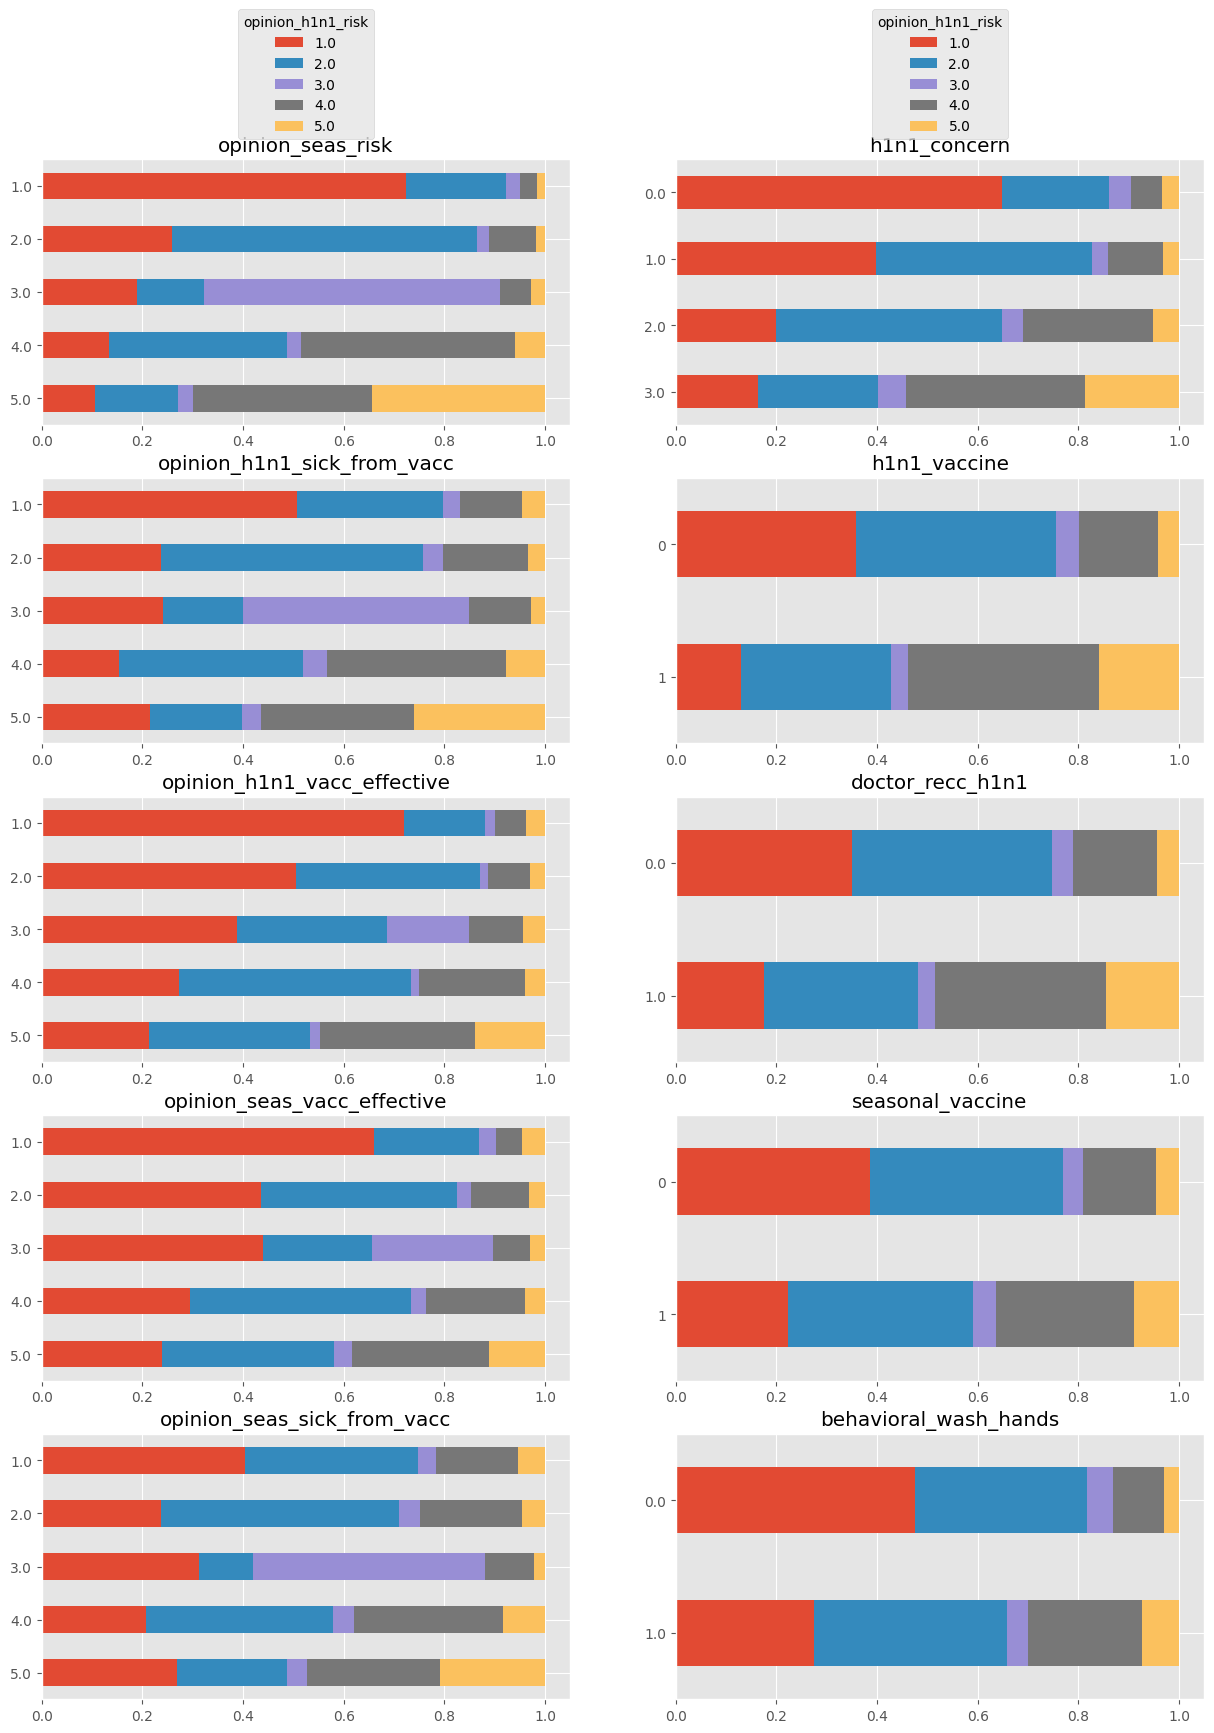

In [ ]:
# Pengaruh pendapat tentang resiko H1N1 tanpa vaccine dengan features lain
col1 = ['opinion_seas_risk', 'h1n1_concern',
       'opinion_h1n1_sick_from_vacc', 'h1n1_vaccine',
       'opinion_h1n1_vacc_effective', 'doctor_recc_h1n1',
       'opinion_seas_vacc_effective', 'seasonal_vaccine',
       'opinion_seas_sick_from_vacc', 'behavioral_wash_hands']
fig, ax = plt.subplots(5, 2, figsize = (15, 20))
ax = ax.flatten()
for i, j in enumerate(col1):
  plot_prop(j, "opinion_h1n1_risk", train, ax = ax[i])
  ax[0].legend(loc = 'lower center', bbox_to_anchor = (0.5, 1.05), title = 'opinion_h1n1_risk')
  ax[1].legend(loc = 'lower center', bbox_to_anchor = (0.5, 1.05), title = 'opinion_h1n1_risk')

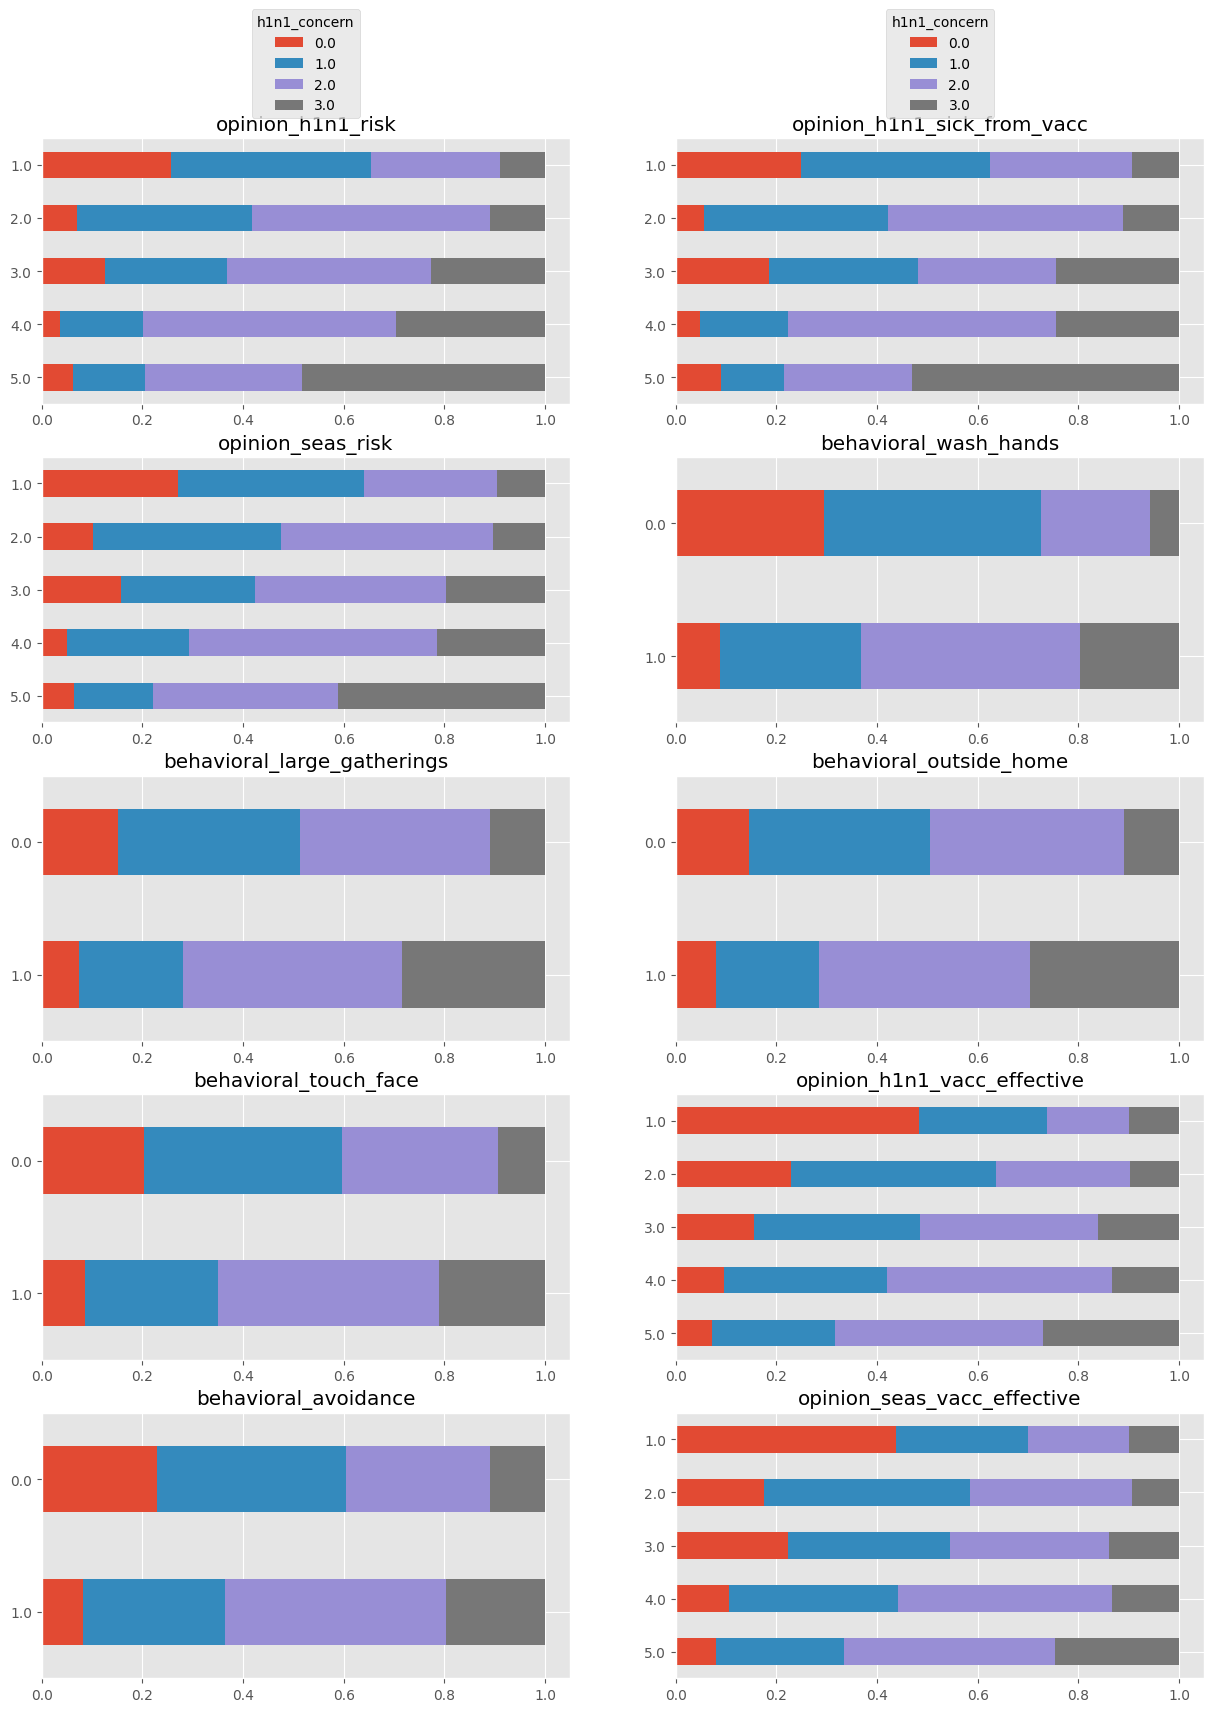

In [ ]:
# Pengaruh tingkat concern h1n1 dengan features lain
col1 = ['opinion_h1n1_risk', 'opinion_h1n1_sick_from_vacc',
       'opinion_seas_risk', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'opinion_h1n1_vacc_effective',
       'behavioral_avoidance', 'opinion_seas_vacc_effective']
fig, ax = plt.subplots(5, 2, figsize = (15, 20))
ax = ax.flatten()
for i, j in enumerate(col1):
  plot_prop(j, "h1n1_concern", train, ax = ax[i])
  ax[0].legend(loc = 'lower center', bbox_to_anchor = (0.5, 1.05), title = 'h1n1_concern')
  ax[1].legend(loc = 'lower center', bbox_to_anchor = (0.5, 1.05), title = 'h1n1_concern')

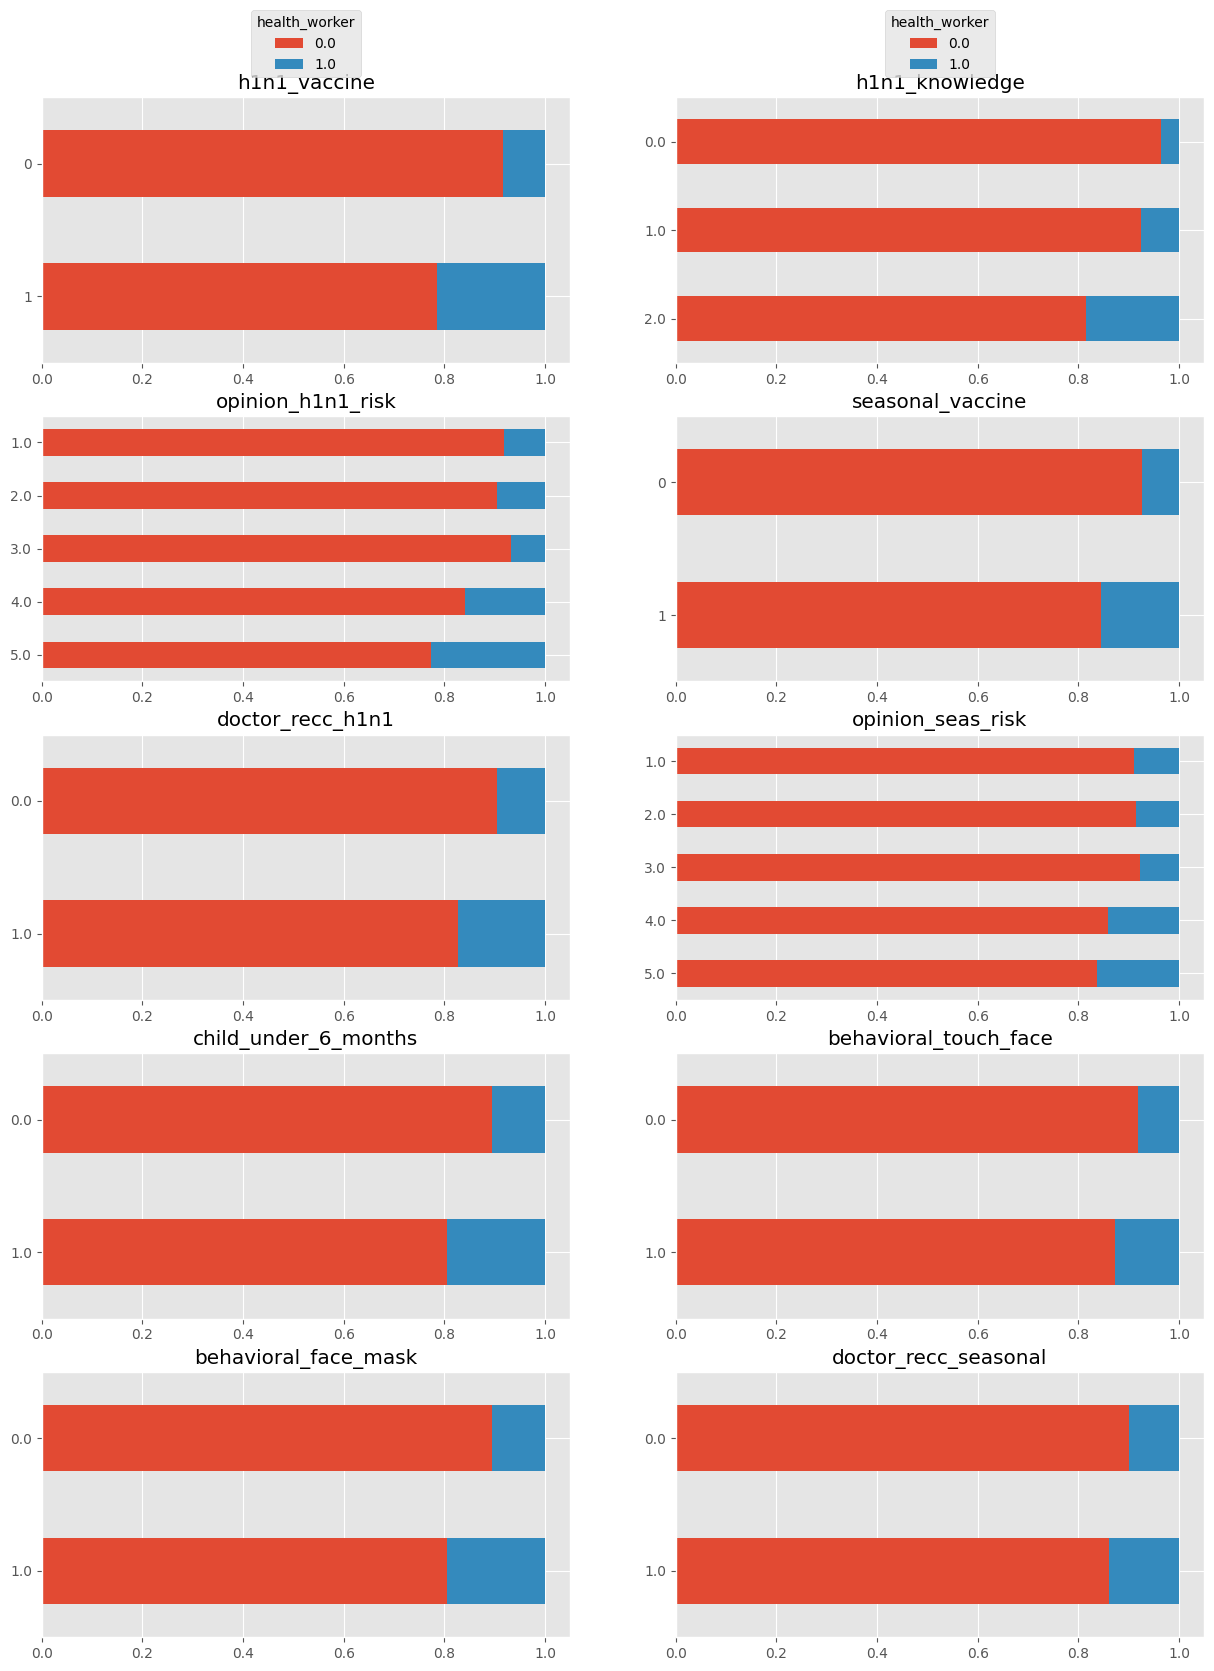

In [ ]:
# Pengaruh health worker dengan features lain
col1 = ['h1n1_vaccine', 'h1n1_knowledge', 'opinion_h1n1_risk',
       'seasonal_vaccine', 'doctor_recc_h1n1', 'opinion_seas_risk',
       'child_under_6_months', 'behavioral_touch_face', 'behavioral_face_mask',
       'doctor_recc_seasonal']
fig, ax = plt.subplots(5, 2, figsize = (15, 20))
ax = ax.flatten()
for i, j in enumerate(col1):
  plot_prop(j, "health_worker", train, ax = ax[i])
  ax[0].legend(loc = 'lower center', bbox_to_anchor = (0.5, 1.05), title = 'health_worker')
  ax[1].legend(loc = 'lower center', bbox_to_anchor = (0.5, 1.05), title = 'health_worker')

## 3. Multivariate Analysis
Pada multivariate analysis ini kita melakukan analisis terhadap keseluruhan feature-feature yang terkait atau berhubungan terutama yang memiliki korelasi yang tinggi. Pada analisis ini juga kita mencoba mencari keterkaitan feature numerik dan feature kategorik yang sebelumnya belum dilakukan. Untuk menjustifikasi perbedaan rata-rata yang terhitung dan terlihat pada masing-masing kelas, maka dilakukan One Way ANOVA.

Bagaimana pendapat masing-masing ras terhadap vaksin, ini mencakup tingkat efektivitasnya, seberapa penting, dan kekhawatiran akan tidak vaksin? Berdasarkan visualisasi lineplot dibawah sangat jelas perbedaan antara masing-masing ras untuk kedua vaksinasi. Jika kita coba bandingkan antara ras kulit hitam dan putih, ras kulit hitam menganggap vaksin sedikit efektif, tingkat khawatir yang rendah akan virus, dan tingkat khawatir yang tinggi pasca vaksinasi. Jelas ras atau etnis selain kulit putih mendapatkan sedikit misinformasi mengenai vaksinasi. Hal ini menyebabkan pada bivariate analysis sebelumnya kemungkinan vaksinasi ras selain kulit putih rendah

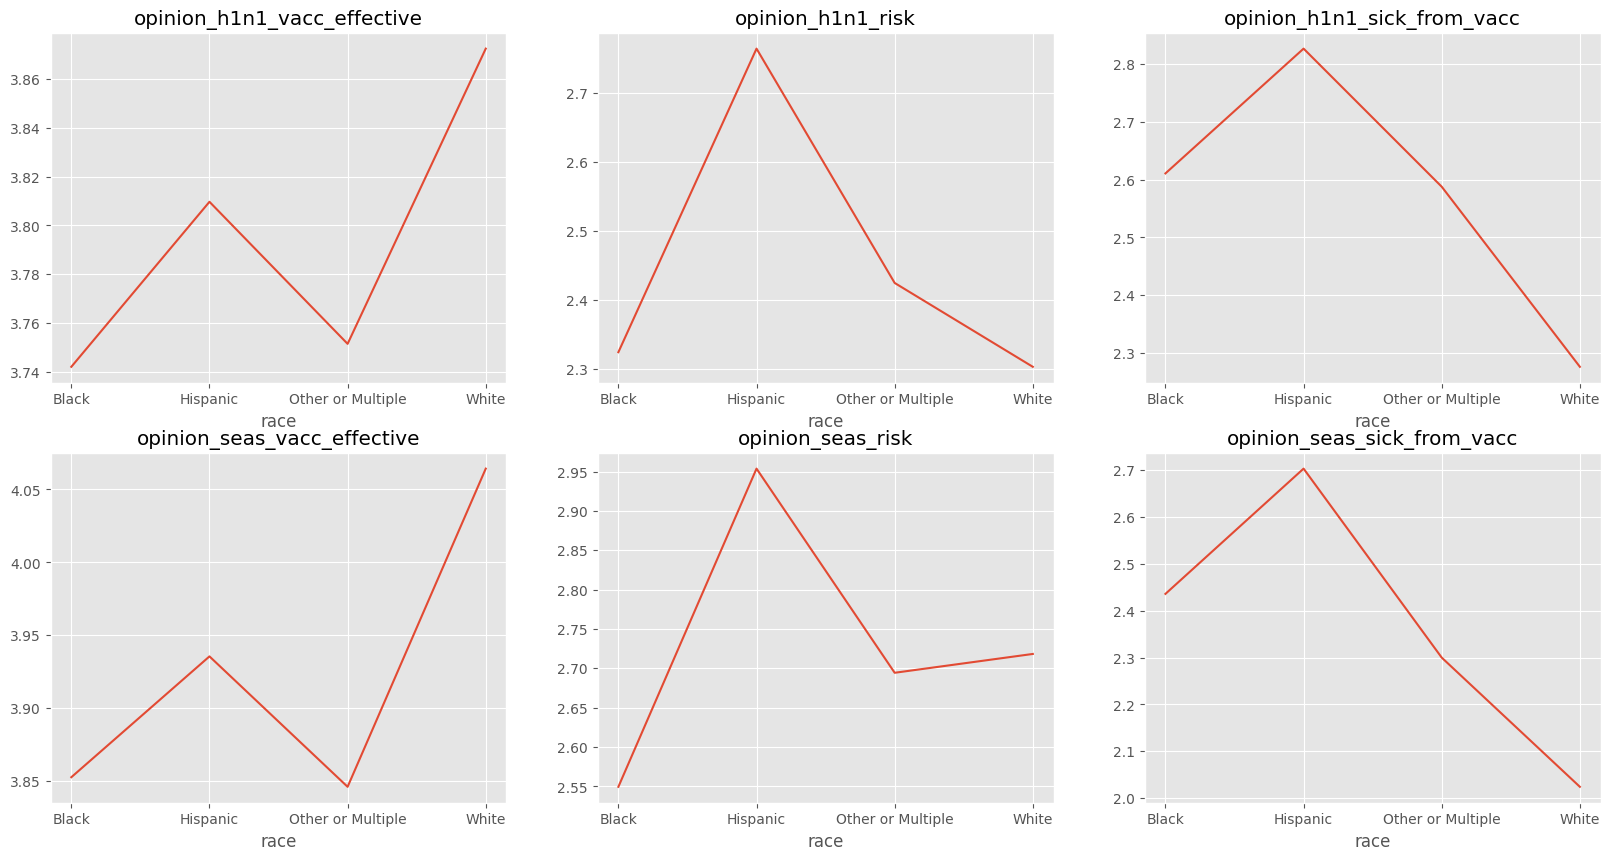

In [ ]:
fig, ax = plt.subplots(2, 3, figsize = (20, 10))
ax = ax.flatten()
opinions = ['opinion_h1n1_vacc_effective', 'opinion_h1n1_risk', 'opinion_h1n1_sick_from_vacc',
            'opinion_seas_vacc_effective', 'opinion_seas_risk', 'opinion_seas_sick_from_vacc']
for i, j in enumerate(opinions):
  sns.lineplot(train.groupby("race")[j].mean(), ax = ax[i])
  ax[i].set_title(j)
  ax[i].set_ylabel("")

In [ ]:
# Melakukan One Way Anova untuk menguji perbedaan mean kelas pada feature race dengan feature opinions
for i in opinions:
  w = np.array(train[train["race"] == "White"][i].dropna())
  b = np.array(train[train["race"] == "Black"][i].dropna())
  h = np.array(train[train["race"] == "Hispanic"][i].dropna())
  o = np.array(train[train["race"] == "Other or Multiple"][i].dropna())
  nilai_f, p_value = f_oneway(w, b, h, o)
  alpha = 0.05
  print(str(i))
  print("p-value adalah " + str(p))
  if p <= alpha:
    print('terdapat perbedaan antar kelas')
  else:
    print('tidak terdapat perbedaan antar kelas')
  print("======================================")

opinion_h1n1_vacc_effective
p-value adalah 1.091884581401304e-86
terdapat perbedaan antar kelas
opinion_h1n1_risk
p-value adalah 1.091884581401304e-86
terdapat perbedaan antar kelas
opinion_h1n1_sick_from_vacc
p-value adalah 1.091884581401304e-86
terdapat perbedaan antar kelas
opinion_seas_vacc_effective
p-value adalah 1.091884581401304e-86
terdapat perbedaan antar kelas
opinion_seas_risk
p-value adalah 1.091884581401304e-86
terdapat perbedaan antar kelas
opinion_seas_sick_from_vacc
p-value adalah 1.091884581401304e-86
terdapat perbedaan antar kelas


Bagaimana akses layanan kesehatan dan asuransi kesehatan untuk masing-masing ras atau etnis, apakah terdapat perbedaan? Anggap layanan kesehatan dapat diukur dengan metrik jumlah pasien dengan ras tertentu yang mendapatkan rekomendasi dokter dimana kita ambil persentasenya terhadap total. Terdapat perbedaan yang sedikit antara masing-masing ras untuk rekomendasi dokter dan asuransi kesehatan dengan mayoritas ras kulit putih paling tinggi walaupun asuransi kesehatan lebih banyak ras kulit hitam.

Text(0, 0.5, '')

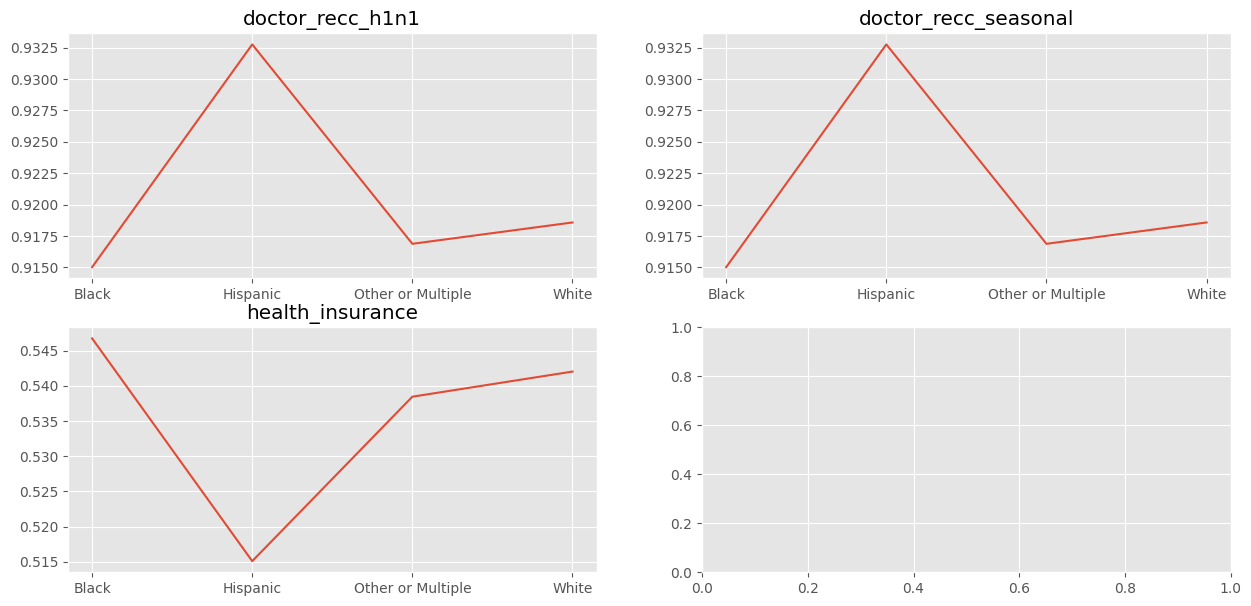

In [ ]:
fig, ax = plt.subplots(2, 2, figsize = (15, 7))
ax = ax.flatten()

sns.lineplot(train.groupby("race")["doctor_recc_h1n1"].count()/train["race"].value_counts(), ax = ax[0])
ax[0].set_title("doctor_recc_h1n1")
ax[0].set_ylabel("")

sns.lineplot(train.groupby("race")["doctor_recc_seasonal"].count()/train["race"].value_counts(), ax = ax[1])
ax[1].set_title("doctor_recc_seasonal")
ax[1].set_ylabel("")

sns.lineplot(train.groupby("race")["health_insurance"].count()/train["race"].value_counts(), ax = ax[2])
ax[2].set_title("health_insurance")
ax[2].set_ylabel("")

In [ ]:
# Melakukan One Way Anova untuk menguji perbedaan mean kelas pada feature race dengan feature opinions
health = ["doctor_recc_h1n1", "doctor_recc_seasonal", "health_insurance"]
for i in health:
  w = np.array(train[train["race"] == "White"][i].dropna())
  b = np.array(train[train["race"] == "Black"][i].dropna())
  h = np.array(train[train["race"] == "Hispanic"][i].dropna())
  o = np.array(train[train["race"] == "Other or Multiple"][i].dropna())
  nilai_f, p_value = f_oneway(w, b, h, o)
  alpha = 0.05
  print(str(i))
  print("p-value adalah " + str(p))
  if p <= alpha:
    print('terdapat perbedaan antar kelas')
  else:
    print('tidak terdapat perbedaan antar kelas')
  print("======================================")

doctor_recc_h1n1
p-value adalah 1.091884581401304e-86
terdapat perbedaan antar kelas
doctor_recc_seasonal
p-value adalah 1.091884581401304e-86
terdapat perbedaan antar kelas
health_insurance
p-value adalah 1.091884581401304e-86
terdapat perbedaan antar kelas


Bagaimana kebiasaan yang dimiliki untuk menghindari virus untuk masing-masing age group? Hasil yang menarik dimana jika kita perhatikan masing-masing feature behavioral semakin bertambah umur terdapat tren menurun dengan umur paruh baya yang mayoritas bernilai paling besar. Memang masuk akal sebab pada umur tersebut, manusia dalam usia produktifnya sehingga banyak beraktivitas diluar dan kebiasaan yang ada bearasal dari jenis industri dan tipe pekerjaan yang mengharuskan kebiasaan tersebut pada lingkungan kerja.

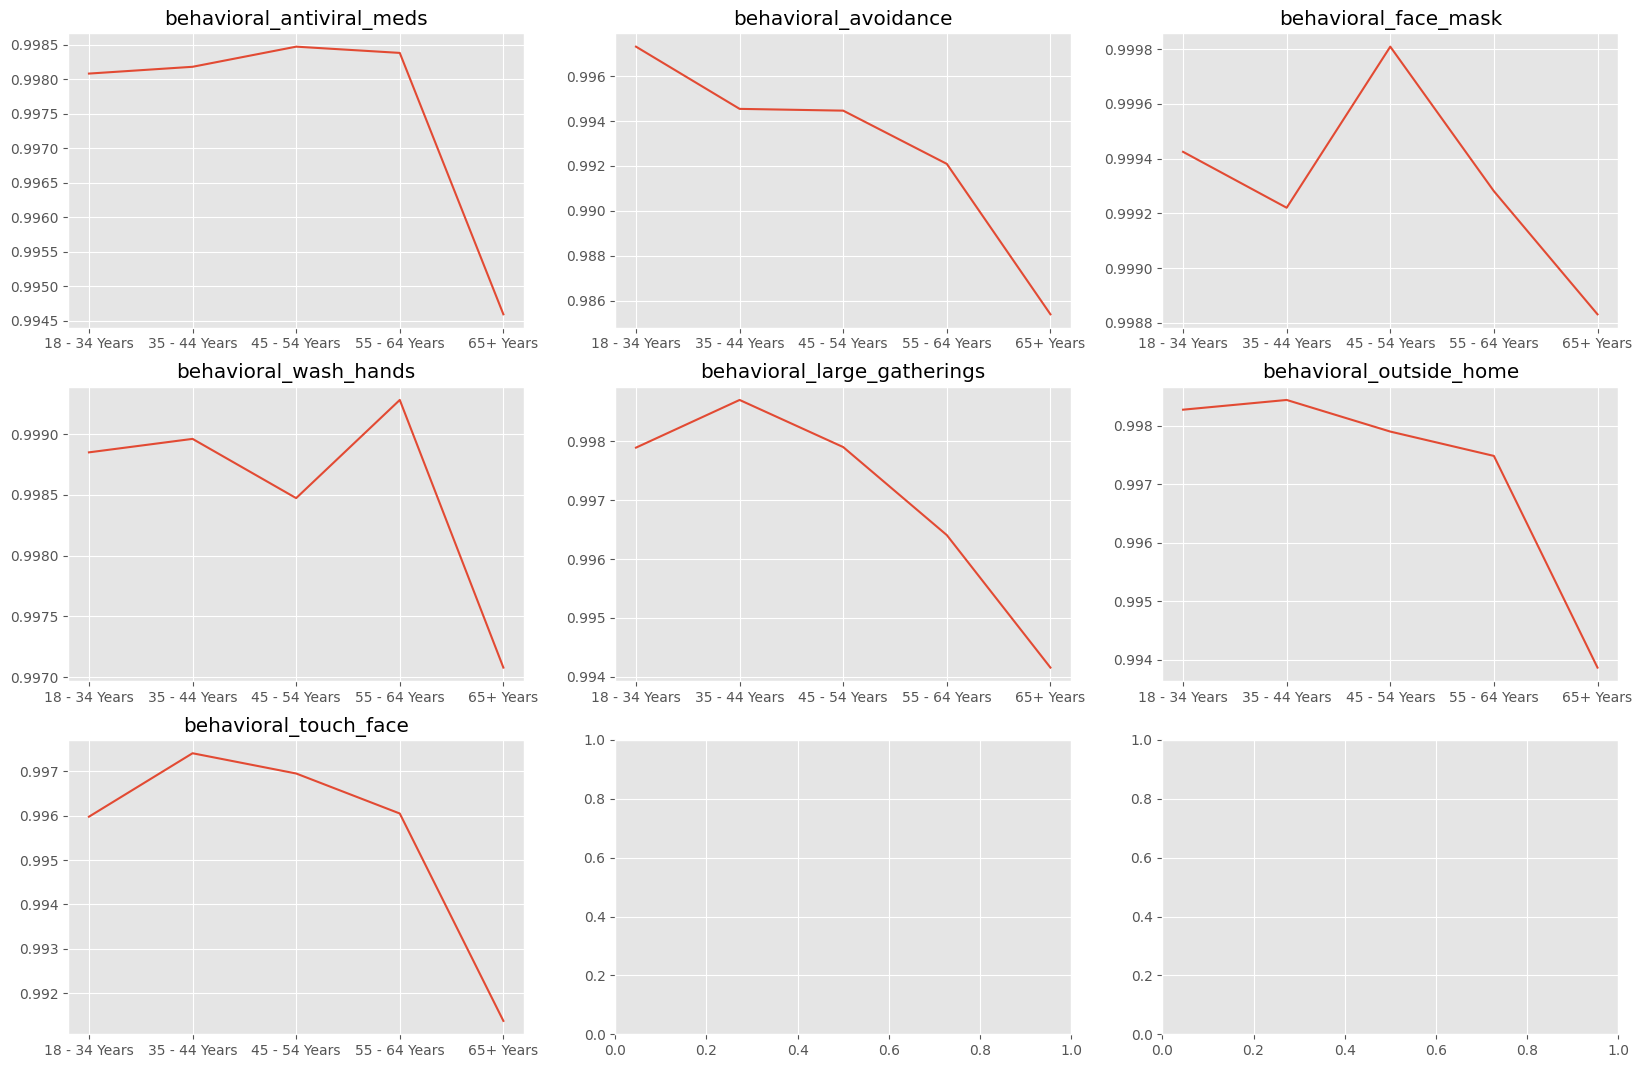

In [ ]:
fig, ax = plt.subplots(3, 3, figsize = (20, 13))
ax = ax.flatten()
behavioral = ['behavioral_antiviral_meds', 'behavioral_avoidance', 'behavioral_face_mask',
              'behavioral_wash_hands', 'behavioral_large_gatherings', 'behavioral_outside_home',
              'behavioral_touch_face']
for i, j in enumerate(behavioral):
  sns.lineplot(train.groupby("age_group")[j].count()/train["age_group"].value_counts(), ax = ax[i])
  ax[i].set_title(j)
  ax[i].set_ylabel("")

In [ ]:
# Melakukan One Way Anova untuk menguji perbedaan mean kelas pada feature age_group dengan feature behavioral
for i in health:
  w = np.array(train[train["age_group"] == "18 - 34 Years"][i].dropna())
  b = np.array(train[train["age_group"] == "35 - 44 Years"][i].dropna())
  h = np.array(train[train["age_group"] == "45 - 54 Years"][i].dropna())
  o = np.array(train[train["age_group"] == "55 - 64 Years"][i].dropna())
  k = np.array(train[train["age_group"] == "65+ Years"][i].dropna())
  nilai_f, p_value = f_oneway(w, b, h, o, k)
  alpha = 0.05
  print(str(i))
  print("p-value adalah " + str(p))
  if p <= alpha:
    print('terdapat perbedaan antar kelas')
  else:
    print('tidak terdapat perbedaan antar kelas')
  print("======================================")

doctor_recc_h1n1
p-value adalah 1.091884581401304e-86
terdapat perbedaan antar kelas
doctor_recc_seasonal
p-value adalah 1.091884581401304e-86
terdapat perbedaan antar kelas
health_insurance
p-value adalah 1.091884581401304e-86
terdapat perbedaan antar kelas


Bagaimana persebaran akses layanan kesehatan dan asuransi kesehatan untuk vaksinasi berdasarkan daerah pada feature hhs_geo_region? Jika kita perhatikan doctor_recc_h1n1, doctor_recc_seasonal, dan health_insurance saling berhubungan. Asumsi layanan kesehatan dan auransi kesehatan bisa dirangkum oleh ketiga feature, ini dapat kita pastikan bahwa akses layanan kesehatan dan asuransi kesehatan tidak tersebar secara merata dimana terdapat daerah yang jauh lebih besar persentasenya dari yang lain atau bisa jadi karena merupakan kota yang besar. Plot ptoporsi hhs_geo_region dan census_msa memberikan insight bahwa memang terdapat daerah yang MSA dan Non-MSA. MSA sendiri merupakan sebutan untuk kota yang memiliki paling sedikit 50000 penduduk.

Text(0, 0.5, '')

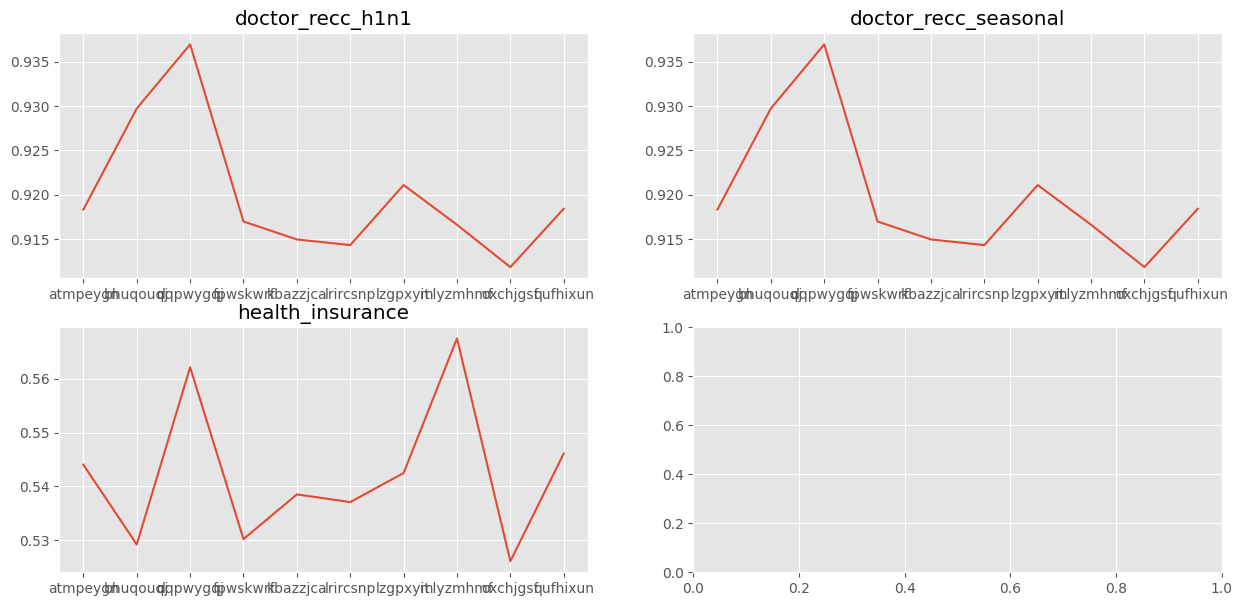

In [ ]:
fig, ax = plt.subplots(2, 2, figsize = (15, 7))
ax = ax.flatten()

sns.lineplot(train.groupby("hhs_geo_region")["doctor_recc_h1n1"].count()/train["hhs_geo_region"].value_counts(), ax = ax[0])
ax[0].set_title("doctor_recc_h1n1")
ax[0].set_ylabel("")

sns.lineplot(train.groupby("hhs_geo_region")["doctor_recc_seasonal"].count()/train["hhs_geo_region"].value_counts(), ax = ax[1])
ax[1].set_title("doctor_recc_seasonal")
ax[1].set_ylabel("")

sns.lineplot(train.groupby("hhs_geo_region")["health_insurance"].count()/train["hhs_geo_region"].value_counts(), ax = ax[2])
ax[2].set_title("health_insurance")
ax[2].set_ylabel("")

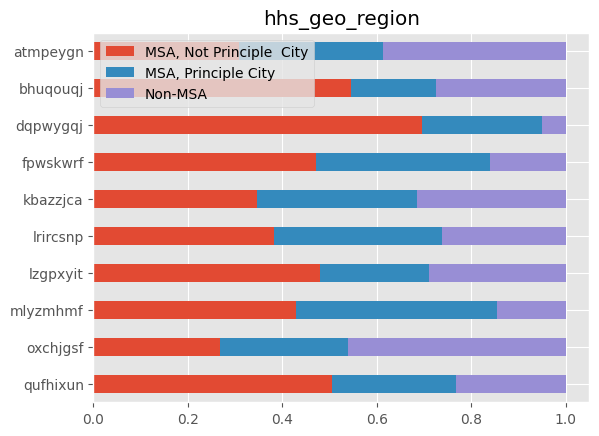

In [ ]:
# Membuat plot proporsi daerah yang masuk ke dalam MSA dan Non-MSA
fig, ax = plt.subplots(1, 1)
plot_prop("hhs_geo_region", "census_msa", train, ax = ax)
plt.legend()

In [ ]:
# hhs_geo_region yang termasuk MSA dan bukan
train.groupby("hhs_geo_region")["census_msa"].value_counts().unstack()

census_msa      MSA, Not Principle  City  MSA, Principle City  Non-MSA
hhs_geo_region                                                        
atmpeygn                             626                  622      785
bhuqouqj                            1552                  514      780
dqpwygqj                             783                  286       57
fpwskwrf                            1541                 1202      522
kbazzjca                             990                  969      899
lrircsnp                             796                  738      544
lzgpxyit                            2060                  991     1246
mlyzmhmf                             961                  956      326
oxchjgsf                             768                  771     1320
qufhixun                            1568                  815      719

# C. Data Preprocessing
Pada bagian ini, kita akan melakukan merging training dan testing set untuk kemudian di preprocess bersamaan. Hal ini dilakukan supaya tidak perlu melakukan step preprocessing kembali pada testing set. Pada dataframe hasil merge, akan dibuat feature baru yaitu "is_train" sebagai indikasi apakah data tersebut berasal dari training set (binary). Tentu feature pembantu ini nantinya akan memudahkan dalam mengambil data training set dan testing set yang kemudian akan di drop sebelum melakukan modeling.

## 1. Handling Missing Values
Jika kita perhatikan dari step data understanding sebelumnya, terdapat banyak missing values terutama pada employment_occupation dan employment_industry yang mencapai 50%. Alasan adanya missing values bisa kita trace back ke metode pengumpulan datanya seperti apa. Tetapi karena pada dataset di kaggle tidak diberitahukan metode pengumpulan datanya, kita asumsikan metode pengumpulan datanya adalah phone survey. Jika demikian maka kemungkinan berasal dari gangguan jaringan ataupun responden yang sudah merasa bosan dan malas melanjutkan survey.

In [ ]:
# Drop respondent_id pada test
test.drop("respondent_id", axis = 1, inplace = True)
# Melakukan pembuatan feature indikator is_train
train["is_train"] = 1
# Melakukan concatenation train dan test
df = pd.concat([train, test], axis = 0).reset_index(drop = True)
train.drop("is_train", axis = 1, inplace = True)
df["is_train"].fillna(0, inplace = True)

In [ ]:
# Membagi data ke dalam tipe datanya
numerical = df.select_dtypes(["float", "int"]).columns
categorical = df.select_dtypes(["object"]).columns
binary = ['behavioral_antiviral_meds', 'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands', 'behavioral_large_gatherings', 'behavioral_outside_home',
         'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal', 'chronic_med_condition', 'child_under_6_months', 'health_worker',
         'health_insurance']

In [ ]:
# Membuat feature transformer yang melakukan imputasi berdasarkan featuresnya
ct = make_column_transformer((SimpleImputer(strategy = "constant", fill_value = "missing"), categorical),
                             (SimpleImputer(strategy = "constant", fill_value = 2), binary),
                             (SimpleImputer(strategy = "constant", fill_value = 4), ["h1n1_concern", "household_children", "household_adults"]),
                             (SimpleImputer(strategy = "constant", fill_value = 3), ["h1n1_knowledge"]),
                             (SimpleImputer(strategy = "constant", fill_value = 6), ['opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
                             'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective', 'opinion_seas_risk', 'opinion_seas_sick_from_vacc']), remainder = "passthrough")
df = pd.DataFrame(ct.fit_transform(df))

In [ ]:
# Melihat jumlah missing values setelah imputasi
missing = pd.DataFrame(df.isnull().sum())
missing["percentage"] = (missing[0]/df.shape[0]) * 100
missing.rename(columns = {0:"counts"}, inplace = True)
missing.sort_values(by = "percentage", ascending = False)

counts  percentage
36   26708   50.000936
35   26708   50.000936
0        0    0.000000
27       0    0.000000
21       0    0.000000
22       0    0.000000
23       0    0.000000
24       0    0.000000
25       0    0.000000
26       0    0.000000
29       0    0.000000
28       0    0.000000
1        0    0.000000
30       0    0.000000
31       0    0.000000
32       0    0.000000
33       0    0.000000
34       0    0.000000
20       0    0.000000
19       0    0.000000
18       0    0.000000
17       0    0.000000
2        0    0.000000
3        0    0.000000
4        0    0.000000
5        0    0.000000
6        0    0.000000
7        0    0.000000
8        0    0.000000
9        0    0.000000
10       0    0.000000
11       0    0.000000
12       0    0.000000
13       0    0.000000
14       0    0.000000
15       0    0.000000
16       0    0.000000
37       0    0.000000

## 2. Feature Encoding
Pada bagian feature encoding kita melakukan transformasi feature kategorik ke numerik. Hal ini karena kebanyakan dari algoritma machine learning tidak dapat memproses input feature kategorik.

In [ ]:
# Melakukan ordinal encoding pada feature kategorik
ordinal = OrdinalEncoder()
df = pd.DataFrame(ordinal.fit_transform(df))
df.rename(columns = {35:"h1n1_vaccine", 36:"seasonal_vaccine", 37:"is_train"}, inplace = True)
df

0    1    2    3    4    5    6    7    8    9  ...   28   29   30  \
0      3.0  1.0  3.0  0.0  2.0  1.0  0.0  1.0  8.0  2.0  ...  0.0  2.0  0.0   
1      1.0  0.0  3.0  1.0  2.0  1.0  1.0  0.0  1.0  0.0  ...  2.0  4.0  3.0   
2      0.0  2.0  3.0  1.0  0.0  1.0  0.0  0.0  9.0  0.0  ...  1.0  2.0  0.0   
3      4.0  0.0  3.0  0.0  2.0  1.0  1.0  1.0  5.0  1.0  ...  1.0  2.0  2.0   
4      2.0  3.0  3.0  0.0  0.0  0.0  0.0  0.0  9.0  0.0  ...  1.0  2.0  2.0   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
53410  1.0  4.0  3.0  0.0  3.0  2.0  2.0  3.0  2.0  1.0  ...  1.0  3.0  1.0   
53411  0.0  0.0  3.0  1.0  2.0  0.0  1.0  0.0  9.0  2.0  ...  1.0  3.0  0.0   
53412  0.0  3.0  3.0  0.0  2.0  1.0  1.0  1.0  9.0  0.0  ...  1.0  3.0  2.0   
53413  3.0  3.0  3.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  ...  1.0  1.0  2.0   
53414  2.0  2.0  3.0  0.0  3.0  1.0  1.0  0.0  5.0  1.0  ...  1.0  4.0  0.0   

        31   32   33   34  h1n1_vaccine  seasonal_vaccine  is_train  
0      1.0  1.0  0.0  1.0           0.0               0.0       1.0  
1      3.0  3.0  1.0  3.0           0.0               1.0       1.0  
2      0.0  3.0  0.0  1.0           0.0               0.0       1.0  
3      4.0  4.0  3.0  0.0           0.0               1.0       1.0  
4      1.0  2.0  0.0  3.0           0.0               0.0       1.0  
...    ...  ...  ...  ...           ...               ...       ...  
53410  1.0  3.0  1.0  0.0           NaN               NaN       0.0  
53411  0.0  4.0  1.0  1.0           NaN               NaN       0.0  
53412  0.0  3.0  2.0  0.0           NaN               NaN       0.0  
53413  3.0  3.0  2.0  1.0           NaN               NaN       0.0  
53414  1.0  4.0  3.0  1.0           NaN               NaN       0.0  

[53415 rows x 38 columns]

## 3. Train and Test Splitting
Pada train and test splitting, kita memisahkan data train dan test dari dataframe hasil preprocessing dengan memanfaatkan feature "is_train" yang digunakan sebagai indikator apakah merupakan data train atau tidak.

In [ ]:
# Mengambil data train dari df hasil preprocessing
train_new = df[df["is_train"] == 1]
# Drop feature "is_train"
train_new.drop("is_train", axis = 1, inplace = True)
# Mengambil data test dari df
test_new = df[df["is_train"] == 0].reset_index(drop = True)
# Drop feature ["h1n1_vaccine", "seasonal_vaccine", "is_train"]
test_new.drop(["h1n1_vaccine", "seasonal_vaccine", "is_train"], axis = 1, inplace = True)

In [ ]:
# Membagi kedalam features dan target
X = train_new.copy()
y1 = X.pop("h1n1_vaccine")
y1 = y1.astype("int")
y2 = X.pop("seasonal_vaccine")
y2 = y2.astype("int")

# D. Modeling and Evaluation
Pada bagian modeling dan evaluation kita akan melakukan pembuatan model yang menghasilkan nilai AUC terbesar dan mengevaluasikannya. Algoritma yang kita pilih adalah LGBM Classifier dan CatBoost Classifier. Setelah itu kita mencoba melakukan ensemble learning dengan melakukan stacking kedua algoritma tadi dengan final classifiernya adalah Logistic Regression. Adapun step-step yang dilakukan adalah hyperparameter tuning, repeated stratified cross validation, dan fitting and predicting.

## 1. Hyperparameter Tuning
Pada bagian hyperparameter tuning kita mencari hyperparameter optimum yang memaksimalkan nilai AUC.

In [ ]:
# Melakukan Hyperparameter Tuning
def objective(trial):

  params = {
        'boosting_type': trial.suggest_categorical('boosting_type', ['gbdt', 'dart', 'goss']),
        'num_leaves': trial.suggest_int('num_leaves', 10, 100),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth': trial.suggest_int('max_depth', 2, 10),
        'min_child_samples': trial.suggest_int('min_child_samples', 20, 200),
        'subsample': trial.suggest_float('subsample', 0.1, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.1, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 1e-9, 1.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-9, 1.0),
        'objective': 'binary',
        'random_state': 42}

  model = LGBMClassifier(**params)
  return evaluate_model(X, y1, model).mean()

study = optuna.create_study(direction = "maximize")
study.optimize(objective, n_trials = 100)

[I 2023-05-06 11:03:59,054] A new study created in memory with name: no-name-b6bd8e3b-fa28-4606-8a5b-f2d2a6dc366b
[I 2023-05-06 11:05:46,882] Trial 0 finished with value: 0.84394653688611 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 94, 'learning_rate': 0.21315929310460996, 'n_estimators': 691, 'max_depth': 10, 'min_child_samples': 53, 'subsample': 0.3517919506459729, 'colsample_bytree': 0.7029722986308261, 'reg_alpha': 0.7799634753518209, 'reg_lambda': 0.036884809511931786}. Best is trial 0 with value: 0.84394653688611.
[I 2023-05-06 11:30:39,992] Trial 1 finished with value: 0.8627079576906592 and parameters: {'boosting_type': 'dart', 'num_leaves': 99, 'learning_rate': 0.09630297298005658, 'n_estimators': 899, 'max_depth': 10, 'min_child_samples': 72, 'subsample': 0.6314505963729472, 'colsample_bytree': 0.10009531469478306, 'reg_alpha': 0.43306483508154264, 'reg_lambda': 0.03936873729261527}. Best is trial 1 with value: 0.8627079576906592.
[I 2023-05-06 11:33:17,792] Trial

In [ ]:
# Melakukan Hyperparameter Tuning
def objective(trial):

  params = {
        'boosting_type': trial.suggest_categorical('boosting_type', ['gbdt', 'dart', 'goss']),
        'num_leaves': trial.suggest_int('num_leaves', 10, 100),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth': trial.suggest_int('max_depth', 2, 10),
        'min_child_samples': trial.suggest_int('min_child_samples', 20, 200),
        'subsample': trial.suggest_float('subsample', 0.1, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.1, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 1e-9, 1.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-9, 1.0),
        'objective': 'binary',
        'random_state': 42}

  model = LGBMClassifier(**params)
  return evaluate_model(X, y2, model).mean()

study = optuna.create_study(direction = "maximize")
study.optimize(objective, n_trials = 100)

[I 2023-05-06 19:13:58,103] A new study created in memory with name: no-name-0b62b4cf-a0ca-4c45-bad0-2904507a4e09
[I 2023-05-06 19:17:53,016] Trial 0 finished with value: 0.863656086837036 and parameters: {'boosting_type': 'dart', 'num_leaves': 95, 'learning_rate': 0.17137880126789737, 'n_estimators': 275, 'max_depth': 5, 'min_child_samples': 159, 'subsample': 0.1327567755473626, 'colsample_bytree': 0.6720538254035382, 'reg_alpha': 0.43534033534328803, 'reg_lambda': 0.32984280254157944}. Best is trial 0 with value: 0.863656086837036.
[I 2023-05-06 19:19:46,148] Trial 1 finished with value: 0.8436551963926228 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 62, 'learning_rate': 0.13405085165162475, 'n_estimators': 805, 'max_depth': 7, 'min_child_samples': 30, 'subsample': 0.18888056001043219, 'colsample_bytree': 0.7811207784835525, 'reg_alpha': 0.5109016351503708, 'reg_lambda': 0.25489701654989433}. Best is trial 0 with value: 0.863656086837036.
[I 2023-05-06 19:21:42,828] Trial 

In [ ]:
# Menyimpan best parameters tuning
paramz = {'boosting_type': 'gbdt', 'num_leaves': 67, 'learning_rate': 0.09223914614679704, 'n_estimators': 276, 'max_depth': 3, 'min_child_samples': 92, 'subsample': 0.14542102141967644, 'colsample_bytree': 0.9024323179017488, 'reg_alpha': 0.40133144441531987, 'reg_lambda': 0.44178008396771773}
paramzz = {'boosting_type': 'gbdt', 'num_leaves': 71, 'learning_rate': 0.059825649793357, 'n_estimators': 508, 'max_depth': 3, 'min_child_samples': 106, 'subsample': 0.19494433242177028, 'colsample_bytree': 0.900135734232716, 'reg_alpha': 0.16579136667825337, 'reg_lambda': 0.5156507750423259}
paramzzz = {'boosting_type': 'dart', 'num_leaves': 16, 'learning_rate': 0.171481495143593, 'n_estimators': 614, 'max_depth': 6, 'min_child_samples': 44, 'subsample': 0.9676759260740924, 'colsample_bytree': 0.5496029208153769, 'reg_alpha': 0.9056499406319973, 'reg_lambda': 0.3134939218872003}

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y1, test_size = 0.3, random_state = 68)

In [ ]:
def objective(trial: optuna.Trial, pool: Pool) -> float:
    params = {
        'iterations': trial.suggest_categorical('iterations', [100, 200, 300, 500, 1000, 1200, 1500]),
        'learning_rate': trial.suggest_float("learning_rate", 0.001, 0.3),
        'random_strength': trial.suggest_int("random_strength", 1, 10),
        'bagging_temperature': trial.suggest_int("bagging_temperature", 0, 10),
        'max_bin': trial.suggest_categorical('max_bin', [4, 5, 6, 8, 10, 20, 30]),
        'grow_policy': trial.suggest_categorical('grow_policy', ['SymmetricTree', 'Depthwise', 'Lossguide']),
        'min_data_in_leaf':trial.suggest_int("min_data_in_leaf", 1,10),
        "depth": trial.suggest_int("max_depth", 2,10),
        "l2_leaf_reg": trial.suggest_float("l2_leaf_reg", 1e-8, 100),
        'one_hot_max_size': trial.suggest_categorical('one_hot_max_size', [5,10,12,100,500,1024]),
        'auto_class_weights': trial.suggest_categorical('auto_class_weights', ['Balanced', 'SqrtBalanced']),
        'custom_metric': ['AUC'],
        'od_type': "Iter",
        'od_wait': 100,
        "loss_function": "Logloss",
    }

    scores = cv(
        pool=pool,
        params=params,
        fold_count=5,
        early_stopping_rounds=10,
        plot=False,
        logging_level='Silent'
    )

    return scores['test-AUC-mean'].max()

In [ ]:
h1n1_vaccine_pool = Pool(data = X_train,
                     label = y_train)

In [ ]:
sampler = optuna.samplers.TPESampler(seed=23)  # Feature scaled
study_h1n1 = optuna.create_study(direction="maximize", sampler=sampler)
study_h1n1.optimize(lambda trial: objective(trial, h1n1_vaccine_pool), n_trials=100)

[I 2023-05-07 09:54:47,882] A new study created in memory with name: no-name-a917a29a-06c0-4316-bc8a-77d748e4978a
[I 2023-05-07 09:55:06,521] Trial 0 finished with value: 0.8375285112238723 and parameters: {'iterations': 200, 'learning_rate': 0.11834029747304417, 'random_strength': 7, 'bagging_temperature': 4, 'max_bin': 20, 'grow_policy': 'Depthwise', 'min_data_in_leaf': 9, 'max_depth': 7, 'l2_leaf_reg': 11.047771400262603, 'one_hot_max_size': 10, 'auto_class_weights': 'SqrtBalanced'}. Best is trial 0 with value: 0.8375285112238723.
[I 2023-05-07 09:56:21,902] Trial 1 finished with value: 0.830689413809836 and parameters: {'iterations': 1200, 'learning_rate': 0.04944173122182194, 'random_strength': 6, 'bagging_temperature': 6, 'max_bin': 4, 'grow_policy': 'Depthwise', 'min_data_in_leaf': 6, 'max_depth': 9, 'l2_leaf_reg': 82.77159260922095, 'one_hot_max_size': 100, 'auto_class_weights': 'Balanced'}. Best is trial 0 with value: 0.8375285112238723.
[I 2023-05-07 09:56:37,382] Trial 2 fin

In [ ]:
sampler = optuna.samplers.TPESampler(seed=68)  # Make the sampler behave in a deterministic way.
study_h1n1 = optuna.create_study(direction="maximize", sampler=sampler)
study_h1n1.optimize(lambda trial: objective(trial, h1n1_vaccine_pool), n_trials=100)

[I 2023-05-07 04:18:34,082] A new study created in memory with name: no-name-6af70b45-3c77-4fb8-9560-54e1ed99356a
[I 2023-05-07 04:18:58,475] Trial 0 finished with value: 0.8650877320266963 and parameters: {'iterations': 1500, 'learning_rate': 0.029356482739949695, 'random_strength': 8, 'bagging_temperature': 10, 'max_bin': 6, 'grow_policy': 'SymmetricTree', 'min_data_in_leaf': 1, 'max_depth': 4, 'l2_leaf_reg': 52.99113765425227, 'one_hot_max_size': 100, 'auto_class_weights': 'SqrtBalanced'}. Best is trial 0 with value: 0.8650877320266963.
[I 2023-05-07 04:19:06,374] Trial 1 finished with value: 0.8647681355620138 and parameters: {'iterations': 200, 'learning_rate': 0.1464067066361795, 'random_strength': 10, 'bagging_temperature': 3, 'max_bin': 10, 'grow_policy': 'Depthwise', 'min_data_in_leaf': 1, 'max_depth': 3, 'l2_leaf_reg': 64.53360776051433, 'one_hot_max_size': 500, 'auto_class_weights': 'SqrtBalanced'}. Best is trial 0 with value: 0.8650877320266963.
[I 2023-05-07 04:19:09,734] 

In [ ]:
params = {'iterations': 1200, 'learning_rate': 0.02312148740825754, 'random_strength': 6, 'bagging_temperature': 9, 'max_bin': 20, 'grow_policy': 'Lossguide', 'min_data_in_leaf': 2, 'max_depth': 7, 'l2_leaf_reg': 91.81845595093853, 'one_hot_max_size': 500, 'auto_class_weights': 'SqrtBalanced'}

In [ ]:
sampler = optuna.samplers.TPESampler(seed=68)  # Make the sampler behave in a deterministic way.
study_h1n1 = optuna.create_study(direction="maximize", sampler=sampler)
study_h1n1.optimize(lambda trial: objective(trial, h1n1_vaccine_pool), n_trials=100)

[I 2023-05-07 06:08:52,594] A new study created in memory with name: no-name-392a8ea2-4e90-4aec-8c3f-8224354aa25b
[I 2023-05-07 06:09:19,689] Trial 0 finished with value: 0.8604736261332949 and parameters: {'iterations': 1500, 'learning_rate': 0.029356482739949695, 'random_strength': 8, 'bagging_temperature': 10, 'max_bin': 6, 'grow_policy': 'SymmetricTree', 'min_data_in_leaf': 1, 'max_depth': 4, 'l2_leaf_reg': 52.99113765425227, 'one_hot_max_size': 100, 'auto_class_weights': 'SqrtBalanced'}. Best is trial 0 with value: 0.8604736261332949.
[I 2023-05-07 06:09:28,123] Trial 1 finished with value: 0.8593123641551598 and parameters: {'iterations': 200, 'learning_rate': 0.1464067066361795, 'random_strength': 10, 'bagging_temperature': 3, 'max_bin': 10, 'grow_policy': 'Depthwise', 'min_data_in_leaf': 1, 'max_depth': 3, 'l2_leaf_reg': 64.53360776051433, 'one_hot_max_size': 500, 'auto_class_weights': 'SqrtBalanced'}. Best is trial 0 with value: 0.8604736261332949.
[I 2023-05-07 06:09:31,940] 

In [ ]:
paramss = {'iterations': 1200, 'learning_rate': 0.03453231830872359, 'random_strength': 2, 'bagging_temperature': 4, 'max_bin': 30, 'grow_policy': 'Depthwise', 'min_data_in_leaf': 3, 'max_depth': 6, 'l2_leaf_reg': 21.16756491261999, 'one_hot_max_size': 5, 'auto_class_weights': 'SqrtBalanced'}

## 2. Repeated Stratified Cross Validation
Step berikutnya adalah melakukan repeated stratified cross validation. Alasan pemilihan teknik cross validation ini adalah karena target dataset yang imbalanced (lebih banyak nilai 0 dari 1) terutama pada label h1n1_vaccine. Harapannya cross validation ini memberikan gambaran performa model dalam kasus ini nilai AUC, ketika melakukan prediksi dari out of sample data.

In [ ]:
# Fungsi untuk melakukan Repeated Stratified K Fold Cross Validation
# Untuk evaluasi model dari out of sample data
def evaluate_model(X, y, model):
	# define evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state = 1)
	# evaluate model
	scores = cross_val_score(model, X, y, scoring = "roc_auc", cv = cv, n_jobs=-1)
	return scores

# Fungsi untuk mengambil model yang akan kita gunakan
def get_models():
  models, names = list(), list()
  # LGBM
  params = {'boosting_type': 'gbdt', 'num_leaves': 50, 'learning_rate': 0.015442697104794116, 'n_estimators': 865, 'max_depth': 8, 'min_child_samples': 84, 'subsample': 0.46782142642977254, 'colsample_bytree': 0.42697397256945196, 'reg_alpha': 0.35769718036599235, 'reg_lambda': 0.4102369255798253}
  #params = {'boosting_type': 'dart', 'num_leaves': 38, 'learning_rate': 0.09622603646234927, 'n_estimators': 211, 'max_depth': 6, 'min_child_samples': 113, 'subsample': 0.34532084212540803, 'colsample_bytree': 0.8426406333020361, 'reg_alpha': 0.17212695739779066, 'reg_lambda': 0.3298906268649008}
  models.append(LGBMClassifier(**params))
  names.append("LGBM")
  # CBC
  params = {'iterations': 1200, 'learning_rate': 0.02312148740825754, 'random_strength': 6, 'bagging_temperature': 9, 'max_bin': 20, 'grow_policy': 'Lossguide', 'min_data_in_leaf': 2, 'max_depth': 7, 'l2_leaf_reg': 91.81845595093853, 'one_hot_max_size': 500, 'auto_class_weights': 'SqrtBalanced'}
  #params = {'iterations': 1200, 'learning_rate': 0.03453231830872359, 'random_strength': 2, 'bagging_temperature': 4, 'max_bin': 30, 'grow_policy': 'Depthwise', 'min_data_in_leaf': 3, 'max_depth': 6, 'l2_leaf_reg': 21.16756491261999, 'one_hot_max_size': 5, 'auto_class_weights': 'SqrtBalanced'}
  models.append(CatBoostClassifier(**params))
  names.append("CBC")
  # STACKING
  estimators = []
  params1 = {'boosting_type': 'gbdt', 'num_leaves': 50, 'learning_rate': 0.015442697104794116, 'n_estimators': 865, 'max_depth': 8, 'min_child_samples': 84, 'subsample': 0.46782142642977254, 'colsample_bytree': 0.42697397256945196, 'reg_alpha': 0.35769718036599235, 'reg_lambda': 0.4102369255798253}
  params2 = {'iterations': 1200, 'learning_rate': 0.02312148740825754, 'random_strength': 6, 'bagging_temperature': 9, 'max_bin': 20, 'grow_policy': 'Lossguide', 'min_data_in_leaf': 2, 'max_depth': 7, 'l2_leaf_reg': 91.81845595093853, 'one_hot_max_size': 500, 'auto_class_weights': 'SqrtBalanced'}
  estimators.append(("LGBM", LGBMClassifier(**params1)))
  estimators.append(("CBC", CatBoostClassifier(**params2)))
  models.append(StackingClassifier(estimators = estimators, final_estimator = LogisticRegression()))
  names.append("STK")
  return models, names

In [ ]:
# Mendefinisikan model
models, names = get_models()
results = list()

# Evaluasi masing-masing model
for i in range(len(models)):
  # Evaluasi dan menyimpan hasil
  scores = evaluate_model(X, y1, models[i])
  results.append(scores)
  # Meringkas perfoma model
  print('>%s %.3f (%.3f)' % (names[i], np.mean(scores), np.std(scores)))

>LGBM 0.872 (0.008)
>CBC 0.871 (0.008)
>STK 0.872 (0.008)


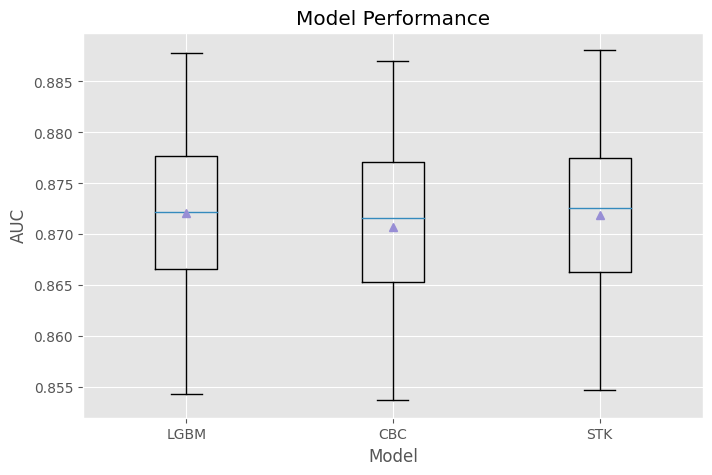

In [ ]:
# Membuat barplot perbandingan performa model
plt.figure(figsize = (8, 5))
plt.boxplot(results, labels=names, showmeans=True)
plt.title("Model Performance")
plt.xlabel("Model")
plt.ylabel("AUC");

In [ ]:
# Mendefinisikan model
models, names = get_models()
results = list()

# Evaluasi masing-masing model
for i in range(len(models)):
 # Evaluasi dan menyimpan hasil
 scores = evaluate_model(X, y2, models[i])
 results.append(scores)
 # Meringkas perfoma model
 print('>%s %.3f (%.3f)' % (names[i], np.mean(scores), np.std(scores)))

In [ ]:
plt.figure(figsize = (8, 5))
plt.boxplot(results, labels=names, showmeans=True)
plt.title("Model Performance")
plt.xlabel("Model")
plt.ylabel("AUC");

## 3. Fitting and Predicticting
Pada bagian ini, kita melakukan fitting dan predicting model Stacking Classifier yang sudah kita ketahui performanya ketika melakukan prediksi ke out of sample data.

In [ ]:
# Melakukan train and test split untuk target h1n1_vaccine
X_train, X_valid, y_train, y_valid = train_test_split(X, y1, test_size = 0.2)

In [ ]:
# Mengambil hyperparameter optimum hasil tuning
paramz = {'boosting_type': 'gbdt', 'num_leaves': 67, 'learning_rate': 0.09223914614679704, 'n_estimators': 276, 'max_depth': 3, 'min_child_samples': 92, 'subsample': 0.14542102141967644, 'colsample_bytree': 0.9024323179017488, 'reg_alpha': 0.40133144441531987, 'reg_lambda': 0.44178008396771773}
params = {'iterations': 1200, 'learning_rate': 0.02312148740825754, 'random_strength': 6, 'bagging_temperature': 9, 'max_bin': 20, 'grow_policy': 'Lossguide', 'min_data_in_leaf': 2, 'max_depth': 7, 'l2_leaf_reg': 91.81845595093853, 'one_hot_max_size': 500, 'auto_class_weights': 'SqrtBalanced'}

In [ ]:
# Melakukan fitting dan predicting Stacking Classifier
estimators = []
estimators.append(["LGBM", LGBMClassifier(**paramz)])
estimators.append(["CBC", CatBoostClassifier(**params)])
model1 = StackingClassifier(estimators = estimators, final_estimator = LogisticRegression())
model1.fit(X_train, y_train)
preds = model1.predict(X_valid)
roc_auc_score(y_valid, preds)

Output streaming akan dipotong hingga 5000 baris terakhir.
1000:	learn: 0.3464716	total: 25s	remaining: 4.96s
1001:	learn: 0.3463519	total: 25s	remaining: 4.93s
1002:	learn: 0.3462575	total: 25s	remaining: 4.91s
1003:	learn: 0.3462172	total: 25s	remaining: 4.88s
1004:	learn: 0.3461448	total: 25s	remaining: 4.86s
1005:	learn: 0.3460597	total: 25.1s	remaining: 4.83s
1006:	learn: 0.3459421	total: 25.1s	remaining: 4.8s
1007:	learn: 0.3458908	total: 25.1s	remaining: 4.78s
1008:	learn: 0.3457496	total: 25.1s	remaining: 4.75s
1009:	learn: 0.3456257	total: 25.1s	remaining: 4.73s
1010:	learn: 0.3455634	total: 25.1s	remaining: 4.7s
1011:	learn: 0.3455450	total: 25.1s	remaining: 4.67s
1012:	learn: 0.3454130	total: 25.2s	remaining: 4.64s
1013:	learn: 0.3453256	total: 25.2s	remaining: 4.62s
1014:	learn: 0.3452063	total: 25.2s	remaining: 4.59s
1015:	learn: 0.3451702	total: 25.2s	remaining: 4.57s
1016:	learn: 0.3450994	total: 25.2s	remaining: 4.54s
1017:	learn: 0.3450551	total: 25.3s	remaining: 4.51s

0.7389939328744002

In [ ]:
# Melakukan fitting ke keseluruhan dataset
model1 = StackingClassifier(estimators = estimators, final_estimator = LogisticRegression())
model1.fit(X, y1)

0:	learn: 0.6852110	total: 27.3ms	remaining: 32.8s
1:	learn: 0.6784737	total: 45.2ms	remaining: 27.1s
2:	learn: 0.6715084	total: 64.5ms	remaining: 25.8s
3:	learn: 0.6652915	total: 86.9ms	remaining: 26s
4:	learn: 0.6599558	total: 106ms	remaining: 25.3s
5:	learn: 0.6528922	total: 129ms	remaining: 25.7s
6:	learn: 0.6468760	total: 152ms	remaining: 25.9s
7:	learn: 0.6415662	total: 176ms	remaining: 26.2s
8:	learn: 0.6350629	total: 195ms	remaining: 25.8s
9:	learn: 0.6307144	total: 217ms	remaining: 25.8s
10:	learn: 0.6250359	total: 246ms	remaining: 26.5s
11:	learn: 0.6183576	total: 268ms	remaining: 26.5s
12:	learn: 0.6121391	total: 292ms	remaining: 26.7s
13:	learn: 0.6064286	total: 317ms	remaining: 26.8s
14:	learn: 0.6012418	total: 339ms	remaining: 26.8s
15:	learn: 0.5973166	total: 364ms	remaining: 26.9s
16:	learn: 0.5922752	total: 388ms	remaining: 27s
17:	learn: 0.5879591	total: 410ms	remaining: 26.9s
18:	learn: 0.5844439	total: 434ms	remaining: 27s
19:	learn: 0.5805814	total: 461ms	remaining

In [ ]:
# Melakukan hal yang sama namun untuk target seasonal_vaccine

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y2, test_size = 0.2)

In [ ]:
model2 = StackingClassifier(estimators = estimators, final_estimator = LogisticRegression())
model1.fit(X_train, y_train)
preds = model1.predict(X_valid)
roc_auc_score(preds, y_valid)

0.7813002139308434

In [ ]:
model2 = StackingClassifier(estimators = estimators, final_estimator = LogisticRegression())
model2.fit(X, y2)

0:	learn: 0.6806370	total: 21.5ms	remaining: 25.8s
1:	learn: 0.6697190	total: 43.8ms	remaining: 26.2s
2:	learn: 0.6601618	total: 63.1ms	remaining: 25.2s
3:	learn: 0.6503541	total: 81.4ms	remaining: 24.3s
4:	learn: 0.6419761	total: 99.6ms	remaining: 23.8s
5:	learn: 0.6326284	total: 118ms	remaining: 23.5s
6:	learn: 0.6253232	total: 136ms	remaining: 23.3s
7:	learn: 0.6179216	total: 157ms	remaining: 23.3s
8:	learn: 0.6112761	total: 177ms	remaining: 23.4s
9:	learn: 0.6052500	total: 196ms	remaining: 23.3s
10:	learn: 0.5986104	total: 214ms	remaining: 23.2s
11:	learn: 0.5933919	total: 240ms	remaining: 23.7s
12:	learn: 0.5881953	total: 259ms	remaining: 23.7s
13:	learn: 0.5825867	total: 278ms	remaining: 23.5s
14:	learn: 0.5775708	total: 296ms	remaining: 23.4s
15:	learn: 0.5730905	total: 315ms	remaining: 23.3s
16:	learn: 0.5685653	total: 334ms	remaining: 23.3s
17:	learn: 0.5644412	total: 353ms	remaining: 23.2s
18:	learn: 0.5605051	total: 373ms	remaining: 23.2s
19:	learn: 0.5571079	total: 391ms	re

In [ ]:
# Melakukan prediction pada test set dan disimpan dalam dataframe submisi
preds1 = pd.DataFrame(model1.predict_proba(test_new))[1]
preds2 = pd.DataFrame(model2.predict_proba(test_new))[1]
sub["h1n1_vaccine"] = preds1
sub["seasonal_vaccine"] = preds2

In [ ]:
# Menjadikan dataframe kedalam format csv
sub.to_csv("CATBOOSTV2.csv", index = False)

# Conclusion and Suggestions

Dari hasil EDA yang dilakukan dan performa model yang dibuat dapat disimpulkan bahwa,
*   Missing values yang banyak pada dataset kemungkinan karena faktor-faktor yang menghambat pengambilan data. Dimana sebelumnya kita asumsikan metodenya menggunakan phone survey sehingga bisa jadi data missing karena memang responden tidak ingin memberitahu ataupun kendala seperti masalah jaringan.
*   Vaksinasi H1N1 dan Seasonal sangat dipengaruhi oleh rekomendasi dokter untuk vaksinasi H1N1 dan Seasonal, apakah melakukan vaksinasi H1N1 dan Seasonal, pendapat tentang terserang virus H1N1 dan Seasonal jika tidak vaksin, pendapat tentang efektivitas vaksin H1N1 dan Seasonal, apakah merupakan tenaga kesehatan, tingkat kekhawatiran akan virus H1N1, dan ada tidaknya asuransi kesehatan.
*   Virus H1N1 rentan menyerang responden dewasa paruh baya atau middle-aged adults bukan responden diatas 65 tahun seperti virus Seasonal. Hal itu karena ditemukan bahwa manusia diatas 65 tahun secara natural membentuk antibodi yang dapat melawan virus H1N1.
*   Terdapat perbedaan kesempatan vaksinasi atau tidak adanya ekuitas kesehatan karena akses layanan kesehatan yang kurang, tidak adanya asuransi kesehatan, dan faktor lain pada ras atau etnis minoritas.
*   Terdapat perbedaan kesempatan vaksinasi atau ketidakmerataan akses layanan kesehatan dan asuransi kesehatan jika kita asumsikan metriknya adalah rangkuman feature doctor_recc_h1n1, doctor_recc_seasonal, dan health_insurance.
*   Jenis task machine learning adalah multiclass classification dimana kita membuat dua model terpisah yang sama-sama merupakan Stacking Classifier gabungan LGBM Classifier dan CatBoost Classifier yang sudah di tune dengan final classifier berupa Logistic Regression dimana performanya mencapai nilai AUC 0.872 pada out of fold data.








Saran yang dapat diberikan pada CDC sebagai pihak yang akan menggunakan hasil kegiatan analisis data ini yaitu:
*   Melakukan pengumpulan features yang penting saja yang berhubungan dengan target seperti pada analisis sehingga meminimalisir resiko terjadinya gangguan seperti gangguan jaringan ataupun responden yang sudah bosan dan malas melanjutkan survey yang berpotensi sebagai sumber missing values.
*   Memastikan adanya pemerataan dan ekuitas kesehatan sehingga semua orang dapat merasakan manfaatnya.
*   Konsisten mengumpulkan data setelah model digunakan untuk evaluasi secara berkala.
*   Memverifikasi kesesuaian dan kebenaran dari prediksi model dengan yang sebenarnya terjadi di lapangan.




# Sources

- https://www.cdc.gov/flu/highrisk/65over.htm
- https://www.cdc.gov/flu/highrisk/index.htm
- https://www.cdc.gov/flu/pandemic-resources/2009-h1n1-pandemic.html
- https://www.cdc.gov/flu/highrisk/disparities-racial-ethnic-minority-groups.html
- https://www.nhs.uk/pregnancy/keeping-well/flu-jab/